### Installation des librairies

In [9]:
import pandas                      as pd
import numpy                       as np
pd.set_option('display.max_columns', 50) # Afficher toutes les colonnes du dataset
# Affichage graphique
import matplotlib.pyplot as plt
import seaborn as sns
# Modèles
from sklearn.linear_model          import LogisticRegression
from sklearn.tree                  import DecisionTreeClassifier
from sklearn.neighbors             import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes           import GaussianNB
from sklearn.svm                   import SVC
from sklearn.ensemble              import RandomForestClassifier
from sklearn.model_selection       import StratifiedKFold, cross_val_score, RepeatedStratifiedKFold, train_test_split
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from xgboost                       import XGBClassifier
from catboost                      import CatBoostClassifier
from sklearn.neural_network        import MLPClassifier
# Supprimer les warnings dans jupyter
import warnings
warnings.filterwarnings("ignore")
# Preprocessing
from sklearn.preprocessing         import MinMaxScaler, StandardScaler, RobustScaler
from sklearn.feature_selection     import SelectKBest, f_classif, RFE
from sklearn.model_selection       import train_test_split, GridSearchCV
# Mesures
from sklearn.metrics               import accuracy_score, confusion_matrix, precision_recall_fscore_support, roc_curve, auc
# Exportation
import pickle
# Constantes
seed = 6

### chargement du dataset

Attribute Information:<br><br>

41 molecular descriptors and 1 experimental class:<br>
1) SpMax_L: Leading eigenvalue from Laplace matrix<br>
2) J_Dz(e): Balaban-like index from Barysz matrix weighted by Sanderson electronegativity<br>
3) nHM: Number of heavy atoms<br>
4) F01[N-N]: Frequency of N-N at topological distance 1<br>
5) F04[C-N]: Frequency of C-N at topological distance 4<br>
6) NssssC: Number of atoms of type ssssC<br>
7) nCb-: Number of substituted benzene C(sp2)<br>
8) C%: Percentage of C atoms<br>
9) nCp: Number of terminal primary C(sp3)<br>
10) nO: Number of oxygen atoms<br>
11) F03[C-N]: Frequency of C-N at topological distance 3<br>
12) SdssC: Sum of dssC E-states<br>
13) HyWi_B(m): Hyper-Wiener-like index (log function) from Burden matrix weighted by mass<br>
14) LOC: Lopping centric index<br>
15) SM6_L: Spectral moment of order 6 from Laplace matrix<br>
16) F03[C-O]: Frequency of C - O at topological distance 3<br>
17) Me: Mean atomic Sanderson electronegativity (scaled on Carbon atom)<br>
18) Mi: Mean first ionization potential (scaled on Carbon atom)<br>
19) nN-N: Number of N hydrazines<br>
20) nArNO2: Number of nitro groups (aromatic)<br>
21) nCRX3: Number of CRX3<br>
22) SpPosA_B(p): Normalized spectral positive sum from Burden matrix weighted by polarizability<br>
23) nCIR: Number of circuits<br>
24) B01[C-Br]: Presence/absence of C - Br at topological distance 1<br>
25) B03[C-Cl]: Presence/absence of C - Cl at topological distance 3<br>
26) N-073: Ar2NH / Ar3N / Ar2N-Al / R..N..R<br>
27) SpMax_A: Leading eigenvalue from adjacency matrix (Lovasz-Pelikan index)<br>
28) Psi_i_1d: Intrinsic state pseudoconnectivity index - type 1d<br>
29) B04[C-Br]: Presence/absence of C - Br at topological distance 4<br>
30) SdO: Sum of dO E-states<br>
31) TI2_L: Second Mohar index from Laplace matrix<br>
32) nCrt: Number of ring tertiary C(sp3)<br>
33) C-026: R--CX--R<br>
34) F02[C-N]: Frequency of C - N at topological distance 2<br>
35) nHDon: Number of donor atoms for H-bonds (N and O)<br>
36) SpMax_B(m): Leading eigenvalue from Burden matrix weighted by mass<br>
37) Psi_i_A: Intrinsic state pseudoconnectivity index - type S average<br>
38) nN: Number of Nitrogen atoms<br>
39) SM6_B(m): Spectral moment of order 6 from Burden matrix weighted by mass<br>
40) nArCOOR: Number of esters (aromatic)<br>
41) nX: Number of halogen atoms<br>
42) experimental class: ready biodegradable (RB) and not ready biodegradable (NRB)<br>

In [2]:
# On modifie le nom des colonnes d'origines pour éviter des erreurs.
names = ["SpMaxL", "JDze", "nHM", "F01NN", "F04CN", "NssssC", "nCb", "C%", "nCp", "nO", "F03CN", "SdssC", 
         "HyWiBm", "LOC", "SM6L", "F03CO", "Me", "Mi", "nNN", "nArNO2", "nCRX3", "SpPosABp", "nCIR", "B01CBr",
         "B03CCl", "N073", "SpMaxA", "Psii1d", "B04CBr", "SdO", "TI2L", "nCrt", "C026", "F02CN", "nHDon",
         "SpMaxBm", "PsiiA", "nN", "SM6Bm", "nArCOOR", "nX", "experimentalclass"]

df = pd.read_csv("biodeg.csv", sep= ";", names = names)

### Exploration du dataset
L'objectif de ce dataset est de dire si oui ou non une molécule est biodégradable en fonction de paramètres.

In [328]:
df.head()

,SpMaxL,JDze,nHM,F01NN,F04CN,NssssC,nCb,C%,nCp,nO,F03CN,SdssC,HyWiBm,LOC,SM6L,F03CO,Me,Mi,nNN,nArNO2,nCRX3,SpPosABp,nCIR,B01CBr,B03CCl,N073,SpMaxA,Psii1d,B04CBr,SdO,TI2L,nCrt,C026,F02CN,nHDon,SpMaxBm,PsiiA,nN,SM6Bm,nArCOOR,nX,experimentalclass
0,3.919,2.6909,0,0,0,0,0,31.4,2,0,0,0.000,3.106,2.550,9.002,0,0.960,1.142,0,0,0,1.201,0,0,0,0,1.932,0.011,0,0.000,4.489,0,0,0,0,2.949,1.591,0,7.253,0,0,1
1,4.170,2.1144,0,0,0,0,0,30.8,1,1,0,0.000,2.461,1.393,8.723,1,0.989,1.144,0,0,0,1.104,1,0,0,0,2.214,-0.204,0,0.000,1.542,0,0,0,0,3.315,1.967,0,7.257,0,0,1
2,3.932,3.2512,0,0,0,0,0,26.7,2,4,0,0.000,3.279,2.585,9.110,0,1.009,1.152,0,0,0,1.092,0,0,0,0,1.942,-0.008,0,0.000,4.891,0,0,0,1,3.076,2.417,0,7.601,0,0,1
3,3.000,2.7098,0,0,0,0,0,20.0,0,2,0,0.000,2.100,0.918,6.594,0,1.108,1.167,0,0,0,1.024,0,0,0,0,1.414,1.073,0,8.361,1.333,0,0,0,1,3.046,5.000,0,6.690,0,0,1
4,4.236,3.3944,0,0,0,0,0,29.4,2,4,0,-0.271,3.449,2.753,9.528,2,1.004,1.147,0,0,0,1.137,0,0,0,0,1.985,-0.002,0,10.348,5.588,0,0,0,0,3.351,2.405,0,8.003,0,0,1


In [321]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1055 entries, 0 to 1054
Data columns (total 42 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   SpMaxL             1055 non-null   float64
 1   JDze               1055 non-null   float64
 2   nHM                1055 non-null   int64  
 3   F01NN              1055 non-null   int64  
 4   F04CN              1055 non-null   int64  
 5   NssssC             1055 non-null   int64  
 6   nCb                1055 non-null   int64  
 7   C%                 1055 non-null   float64
 8   nCp                1055 non-null   int64  
 9   nO                 1055 non-null   int64  
 10  F03CN              1055 non-null   int64  
 11  SdssC              1055 non-null   float64
 12  HyWiBm             1055 non-null   float64
 13  LOC                1055 non-null   float64
 14  SM6L               1055 non-null   float64
 15  F03CO              1055 non-null   int64  
 16  Me                 1055 

In [322]:
df.describe()

,SpMaxL,JDze,nHM,F01NN,F04CN,NssssC,nCb,C%,nCp,nO,F03CN,SdssC,HyWiBm,LOC,SM6L,F03CO,Me,Mi,nNN,nArNO2,nCRX3,SpPosABp,nCIR,B01CBr,B03CCl,N073,SpMaxA,Psii1d,B04CBr,SdO,TI2L,nCrt,C026,F02CN,nHDon,SpMaxBm,PsiiA,nN,SM6Bm,nArCOOR,nX
count,1055.000000,1055.000000,1055.000000,1055.000000,1055.000000,1055.000000,1055.000000,1055.000000,1055.000000,1055.000000,1055.000000,1055.000000,1055.000000,1055.000000,1055.000000,1055.000000,1055.000000,1055.000000,1055.000000,1055.000000,1055.000000,1055.000000,1055.000000,1055.000000,1055.000000,1055.000000,1055.000000,1055.000000,1055.000000,1055.000000,1055.000000,1055.000000,1055.000000,1055.000000,1055.000000,1055.000000,1055.000000,1055.000000,1055.000000,1055.000000,1055.000000
mean,4.782644,3.069508,0.716588,0.042654,0.980095,0.290047,1.646445,37.055640,1.376303,1.803791,1.436967,-0.197129,3.476844,1.350716,9.937381,3.630332,1.013302,1.131106,0.008531,0.073934,0.029384,1.238727,1.405687,0.039810,0.147867,0.031280,2.215641,-0.001206,0.026540,8.780510,2.668344,0.129858,0.883412,1.274882,0.961137,3.918240,2.558417,0.686256,8.629492,0.051185,0.723223
std,0.546916,0.831308,1.462452,0.256010,2.332955,1.073771,2.224822,9.144466,1.963521,1.775435,3.116577,0.769662,0.584150,0.786166,0.928678,4.457243,0.046494,0.030143,0.101802,0.317475,0.217997,0.096466,4.788542,0.195606,0.355137,0.199544,0.226131,0.158928,0.160812,11.895889,2.096607,0.644057,1.520467,2.273994,1.257013,0.999602,0.642765,1.090389,1.241986,0.318970,2.239286
min,2.000000,0.803900,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-5.256000,1.544000,0.000000,4.174000,0.000000,0.957000,1.022000,0.000000,0.000000,0.000000,0.863000,0.000000,0.000000,0.000000,0.000000,1.000000,-1.099000,0.000000,0.000000,0.444000,0.000000,0.000000,0.000000,0.000000,2.267000,1.467000,0.000000,4.917000,0.000000,0.000000
25%,4.481000,2.502750,0.000000,0.000000,0.000000,0.000000,0.000000,30.450000,0.000000,0.000000,0.000000,-0.191000,3.105000,0.875000,9.533000,0.000000,0.983000,1.116000,0.000000,0.000000,0.000000,1.182000,0.000000,0.000000,0.000000,0.000000,2.101000,-0.008000,0.000000,0.000000,1.446500,0.000000,0.000000,0.000000,0.000000,3.487500,2.103000,0.000000,7.991000,0.000000,0.000000
50%,4.828000,3.046300,0.000000,0.000000,0.000000,0.000000,1.000000,37.500000,1.000000,2.000000,0.000000,0.000000,3.442000,1.187000,10.039000,2.000000,1.003000,1.130000,0.000000,0.000000,0.000000,1.243000,1.000000,0.000000,0.000000,0.000000,2.247000,0.000000,0.000000,0.000000,2.052000,0.000000,0.000000,0.000000,1.000000,3.726000,2.458000,0.000000,8.499000,0.000000,0.000000
75%,5.125000,3.437650,1.000000,0.000000,1.000000,0.000000,3.000000,43.400000,2.000000,3.000000,2.000000,0.000000,3.825500,1.705000,10.514500,6.000000,1.029000,1.143000,0.000000,0.000000,0.000000,1.296000,2.000000,0.000000,0.000000,0.000000,2.358000,0.005000,0.000000,12.465000,3.146000,0.000000,1.000000,2.000000,2.000000,3.987000,2.870500,1.000000,9.020500,0.000000,0.000000
max,6.496000,9.177500,12.000000,3.000000,36.000000,13.000000,18.000000,60.700000,24.000000,12.000000,44.000000,4.722000,5.701000,4.491000,12.609000,40.000000,1.311000,1.377000,2.000000,3.000000,3.000000,1.641000,147.000000,1.000000,1.000000,3.000000,2.859000,1.073000,1.000000,71.167000,17.537000,8.000000,12.000000,18.000000,7.000000,10.695000,5.825000,8.000000,14.700000,4.000000,27.000000


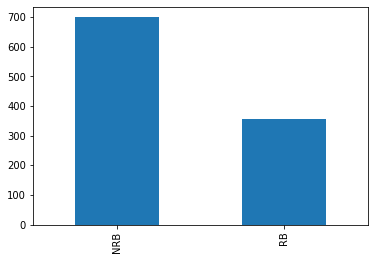

In [8]:
df["experimentalclass"].value_counts().plot(kind='bar')
plt.show()

On remarque que le dataset n'est pas équilibré. On s'attend donc à avoir des modèles qui feront plus de prédictions sur NRB. 

### Prepocessing

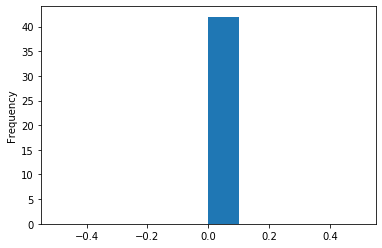

In [324]:
df.isnull().sum().plot.hist()
plt.show()

Il n'y a pas de valeurs manquantes dans le dataset, cela confirme la commande df.info().

In [325]:
# On encode la colonne cible.
df.replace({"experimentalclass": {"RB": 1, "NRB": 0}}, inplace=True)

On n'applique pas la normalisation et la standardisation à ce niveau. De plus, le dataset nous offre pas l'opportunité de faire du feature engineering.

### Visualisation

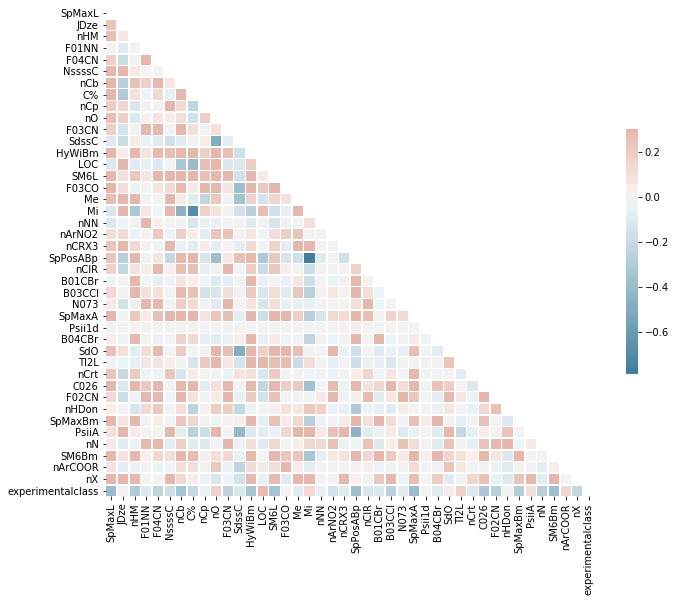

In [327]:
# On affiche la matrice de corrélation pour voir les relations.

corr = df.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
f, ax = plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.show()

On remarque qu'il n'y a pas pas de forte corrélation avec la target.

### Sélection de modèles

In [172]:
def select_model(X, y, seed):
    
    models = []
    models.append(("LR", LogisticRegression(solver="lbfgs", multi_class="auto")))
    models.append(("LDA", LinearDiscriminantAnalysis()))
    models.append(("QDA", QuadraticDiscriminantAnalysis()))
    models.append(("KNN", KNeighborsClassifier()))
    models.append(("CART", DecisionTreeClassifier()))
    models.append(("NB", GaussianNB()))
    models.append(("SVM", SVC(gamma="auto")))
    models.append(("RFC", RandomForestClassifier()))
    models.append(("XGB", XGBClassifier()))
    models.append(("CAT", CatBoostClassifier()))
    models.append(("MLP", MLPClassifier()))
    
    results = []
    names = []
    for name, model in models:
        kfold = StratifiedKFold(n_splits=10, random_state=1, shuffle=True)
        #rskf = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=seed)
        cv_results = cross_val_score(model, X, y, cv=kfold, scoring='accuracy')
        results.append(cv_results)
        names.append(name)
        #print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std()))
    for i in range(len(results)):
        print('%s: %f (%f)' % (names[i], results[i].mean(), results[i].std()))
    
    
    plt.boxplot(results, labels=names)
    plt.title('Algorithm Comparison')
    plt.show()
    
    return results

In [173]:
results_to_plot = []

Learning rate set to 0.010075
0:	learn: 0.6861217	total: 7.76ms	remaining: 7.75s
1:	learn: 0.6786137	total: 11.1ms	remaining: 5.52s
2:	learn: 0.6713243	total: 14.4ms	remaining: 4.78s
3:	learn: 0.6653835	total: 17.5ms	remaining: 4.35s
4:	learn: 0.6594080	total: 20.7ms	remaining: 4.12s
5:	learn: 0.6535037	total: 24.2ms	remaining: 4.01s
6:	learn: 0.6480607	total: 27.7ms	remaining: 3.93s
7:	learn: 0.6412731	total: 30.9ms	remaining: 3.83s
8:	learn: 0.6357433	total: 34.4ms	remaining: 3.79s
9:	learn: 0.6313888	total: 38.7ms	remaining: 3.83s
10:	learn: 0.6242730	total: 41.8ms	remaining: 3.76s
11:	learn: 0.6182727	total: 45.2ms	remaining: 3.72s
12:	learn: 0.6126391	total: 48.5ms	remaining: 3.69s
13:	learn: 0.6066519	total: 51.5ms	remaining: 3.63s
14:	learn: 0.6015619	total: 54.2ms	remaining: 3.56s
15:	learn: 0.5957689	total: 57.2ms	remaining: 3.52s
16:	learn: 0.5895960	total: 59.9ms	remaining: 3.46s
17:	learn: 0.5840484	total: 63ms	remaining: 3.44s
18:	learn: 0.5799883	total: 66.5ms	remaining: 

201:	learn: 0.2868935	total: 494ms	remaining: 1.95s
202:	learn: 0.2863281	total: 496ms	remaining: 1.95s
203:	learn: 0.2858227	total: 498ms	remaining: 1.95s
204:	learn: 0.2852635	total: 501ms	remaining: 1.94s
205:	learn: 0.2847328	total: 504ms	remaining: 1.94s
206:	learn: 0.2842590	total: 507ms	remaining: 1.94s
207:	learn: 0.2837225	total: 510ms	remaining: 1.94s
208:	learn: 0.2834538	total: 513ms	remaining: 1.94s
209:	learn: 0.2827060	total: 515ms	remaining: 1.94s
210:	learn: 0.2821334	total: 517ms	remaining: 1.93s
211:	learn: 0.2818197	total: 519ms	remaining: 1.93s
212:	learn: 0.2813575	total: 521ms	remaining: 1.93s
213:	learn: 0.2809093	total: 524ms	remaining: 1.92s
214:	learn: 0.2805440	total: 526ms	remaining: 1.92s
215:	learn: 0.2800959	total: 528ms	remaining: 1.92s
216:	learn: 0.2797936	total: 530ms	remaining: 1.91s
217:	learn: 0.2793745	total: 532ms	remaining: 1.91s
218:	learn: 0.2788880	total: 534ms	remaining: 1.9s
219:	learn: 0.2780861	total: 536ms	remaining: 1.9s
220:	learn: 0.

423:	learn: 0.2140312	total: 995ms	remaining: 1.35s
424:	learn: 0.2139815	total: 998ms	remaining: 1.35s
425:	learn: 0.2138167	total: 1s	remaining: 1.35s
426:	learn: 0.2136782	total: 1s	remaining: 1.35s
427:	learn: 0.2134882	total: 1s	remaining: 1.34s
428:	learn: 0.2132687	total: 1.01s	remaining: 1.34s
429:	learn: 0.2129761	total: 1.01s	remaining: 1.34s
430:	learn: 0.2127710	total: 1.01s	remaining: 1.34s
431:	learn: 0.2124567	total: 1.01s	remaining: 1.33s
432:	learn: 0.2121984	total: 1.02s	remaining: 1.33s
433:	learn: 0.2120246	total: 1.02s	remaining: 1.33s
434:	learn: 0.2118105	total: 1.02s	remaining: 1.33s
435:	learn: 0.2115765	total: 1.02s	remaining: 1.33s
436:	learn: 0.2112393	total: 1.03s	remaining: 1.32s
437:	learn: 0.2110055	total: 1.03s	remaining: 1.32s
438:	learn: 0.2107904	total: 1.03s	remaining: 1.32s
439:	learn: 0.2106281	total: 1.04s	remaining: 1.32s
440:	learn: 0.2102040	total: 1.04s	remaining: 1.32s
441:	learn: 0.2100322	total: 1.04s	remaining: 1.31s
442:	learn: 0.2098074

639:	learn: 0.1725505	total: 1.49s	remaining: 841ms
640:	learn: 0.1724137	total: 1.5s	remaining: 838ms
641:	learn: 0.1723384	total: 1.5s	remaining: 836ms
642:	learn: 0.1721547	total: 1.5s	remaining: 834ms
643:	learn: 0.1719881	total: 1.5s	remaining: 832ms
644:	learn: 0.1719006	total: 1.51s	remaining: 830ms
645:	learn: 0.1716866	total: 1.51s	remaining: 828ms
646:	learn: 0.1714452	total: 1.51s	remaining: 825ms
647:	learn: 0.1714345	total: 1.51s	remaining: 822ms
648:	learn: 0.1712487	total: 1.52s	remaining: 820ms
649:	learn: 0.1710777	total: 1.52s	remaining: 818ms
650:	learn: 0.1709778	total: 1.52s	remaining: 815ms
651:	learn: 0.1707382	total: 1.52s	remaining: 813ms
652:	learn: 0.1705175	total: 1.52s	remaining: 810ms
653:	learn: 0.1703174	total: 1.53s	remaining: 808ms
654:	learn: 0.1701766	total: 1.53s	remaining: 805ms
655:	learn: 0.1699385	total: 1.53s	remaining: 803ms
656:	learn: 0.1697925	total: 1.53s	remaining: 801ms
657:	learn: 0.1696700	total: 1.53s	remaining: 798ms
658:	learn: 0.16

852:	learn: 0.1377331	total: 2s	remaining: 344ms
853:	learn: 0.1374302	total: 2s	remaining: 342ms
854:	learn: 0.1372918	total: 2s	remaining: 340ms
855:	learn: 0.1371518	total: 2s	remaining: 337ms
856:	learn: 0.1369270	total: 2.01s	remaining: 335ms
857:	learn: 0.1367519	total: 2.01s	remaining: 333ms
858:	learn: 0.1366379	total: 2.01s	remaining: 331ms
859:	learn: 0.1365245	total: 2.02s	remaining: 328ms
860:	learn: 0.1362838	total: 2.02s	remaining: 326ms
861:	learn: 0.1361412	total: 2.02s	remaining: 324ms
862:	learn: 0.1360233	total: 2.03s	remaining: 322ms
863:	learn: 0.1358981	total: 2.03s	remaining: 319ms
864:	learn: 0.1358710	total: 2.03s	remaining: 317ms
865:	learn: 0.1356979	total: 2.04s	remaining: 315ms
866:	learn: 0.1356872	total: 2.04s	remaining: 313ms
867:	learn: 0.1354489	total: 2.04s	remaining: 310ms
868:	learn: 0.1352480	total: 2.04s	remaining: 308ms
869:	learn: 0.1351115	total: 2.04s	remaining: 306ms
870:	learn: 0.1349156	total: 2.05s	remaining: 303ms
871:	learn: 0.1347760	to

32:	learn: 0.5139653	total: 84.9ms	remaining: 2.49s
33:	learn: 0.5100908	total: 87.5ms	remaining: 2.49s
34:	learn: 0.5072662	total: 90.3ms	remaining: 2.49s
35:	learn: 0.5038575	total: 93.1ms	remaining: 2.49s
36:	learn: 0.5002114	total: 96.5ms	remaining: 2.51s
37:	learn: 0.4973043	total: 100ms	remaining: 2.53s
38:	learn: 0.4937143	total: 102ms	remaining: 2.52s
39:	learn: 0.4901057	total: 104ms	remaining: 2.5s
40:	learn: 0.4875813	total: 107ms	remaining: 2.51s
41:	learn: 0.4848600	total: 111ms	remaining: 2.52s
42:	learn: 0.4816778	total: 116ms	remaining: 2.58s
43:	learn: 0.4788326	total: 119ms	remaining: 2.59s
44:	learn: 0.4762989	total: 121ms	remaining: 2.58s
45:	learn: 0.4740385	total: 124ms	remaining: 2.58s
46:	learn: 0.4716573	total: 128ms	remaining: 2.59s
47:	learn: 0.4689134	total: 130ms	remaining: 2.59s
48:	learn: 0.4657541	total: 133ms	remaining: 2.58s
49:	learn: 0.4630818	total: 135ms	remaining: 2.57s
50:	learn: 0.4601769	total: 138ms	remaining: 2.56s
51:	learn: 0.4579112	total:

235:	learn: 0.2713788	total: 584ms	remaining: 1.89s
236:	learn: 0.2710516	total: 588ms	remaining: 1.89s
237:	learn: 0.2706287	total: 590ms	remaining: 1.89s
238:	learn: 0.2700259	total: 593ms	remaining: 1.89s
239:	learn: 0.2695555	total: 596ms	remaining: 1.89s
240:	learn: 0.2691732	total: 598ms	remaining: 1.88s
241:	learn: 0.2687180	total: 603ms	remaining: 1.89s
242:	learn: 0.2681979	total: 606ms	remaining: 1.89s
243:	learn: 0.2679076	total: 608ms	remaining: 1.88s
244:	learn: 0.2674725	total: 610ms	remaining: 1.88s
245:	learn: 0.2671516	total: 612ms	remaining: 1.88s
246:	learn: 0.2666766	total: 614ms	remaining: 1.87s
247:	learn: 0.2664654	total: 617ms	remaining: 1.87s
248:	learn: 0.2659455	total: 619ms	remaining: 1.87s
249:	learn: 0.2655812	total: 621ms	remaining: 1.86s
250:	learn: 0.2653464	total: 624ms	remaining: 1.86s
251:	learn: 0.2650423	total: 626ms	remaining: 1.86s
252:	learn: 0.2643342	total: 628ms	remaining: 1.85s
253:	learn: 0.2638633	total: 631ms	remaining: 1.85s
254:	learn: 

417:	learn: 0.2141652	total: 1.08s	remaining: 1.51s
418:	learn: 0.2140677	total: 1.09s	remaining: 1.51s
419:	learn: 0.2138301	total: 1.09s	remaining: 1.5s
420:	learn: 0.2136077	total: 1.09s	remaining: 1.5s
421:	learn: 0.2134484	total: 1.09s	remaining: 1.5s
422:	learn: 0.2133344	total: 1.1s	remaining: 1.5s
423:	learn: 0.2131830	total: 1.1s	remaining: 1.49s
424:	learn: 0.2129539	total: 1.1s	remaining: 1.49s
425:	learn: 0.2126594	total: 1.1s	remaining: 1.49s
426:	learn: 0.2123776	total: 1.11s	remaining: 1.49s
427:	learn: 0.2121224	total: 1.11s	remaining: 1.48s
428:	learn: 0.2119920	total: 1.11s	remaining: 1.48s
429:	learn: 0.2117724	total: 1.11s	remaining: 1.48s
430:	learn: 0.2115056	total: 1.12s	remaining: 1.47s
431:	learn: 0.2112230	total: 1.12s	remaining: 1.47s
432:	learn: 0.2109752	total: 1.12s	remaining: 1.47s
433:	learn: 0.2107269	total: 1.12s	remaining: 1.47s
434:	learn: 0.2104883	total: 1.13s	remaining: 1.46s
435:	learn: 0.2103222	total: 1.13s	remaining: 1.46s
436:	learn: 0.210178

620:	learn: 0.1746998	total: 1.58s	remaining: 965ms
621:	learn: 0.1745295	total: 1.58s	remaining: 963ms
622:	learn: 0.1742775	total: 1.59s	remaining: 960ms
623:	learn: 0.1741680	total: 1.59s	remaining: 958ms
624:	learn: 0.1739759	total: 1.59s	remaining: 956ms
625:	learn: 0.1736853	total: 1.59s	remaining: 953ms
626:	learn: 0.1735609	total: 1.6s	remaining: 950ms
627:	learn: 0.1734138	total: 1.6s	remaining: 947ms
628:	learn: 0.1732277	total: 1.6s	remaining: 945ms
629:	learn: 0.1729528	total: 1.6s	remaining: 942ms
630:	learn: 0.1728436	total: 1.61s	remaining: 940ms
631:	learn: 0.1726805	total: 1.61s	remaining: 937ms
632:	learn: 0.1724790	total: 1.61s	remaining: 934ms
633:	learn: 0.1723591	total: 1.61s	remaining: 932ms
634:	learn: 0.1721975	total: 1.62s	remaining: 929ms
635:	learn: 0.1720613	total: 1.62s	remaining: 926ms
636:	learn: 0.1718778	total: 1.62s	remaining: 924ms
637:	learn: 0.1716334	total: 1.62s	remaining: 921ms
638:	learn: 0.1714000	total: 1.63s	remaining: 918ms
639:	learn: 0.17

820:	learn: 0.1421697	total: 2.08s	remaining: 454ms
821:	learn: 0.1420461	total: 2.08s	remaining: 451ms
822:	learn: 0.1418056	total: 2.09s	remaining: 449ms
823:	learn: 0.1417831	total: 2.09s	remaining: 446ms
824:	learn: 0.1416401	total: 2.09s	remaining: 444ms
825:	learn: 0.1414750	total: 2.1s	remaining: 442ms
826:	learn: 0.1413563	total: 2.1s	remaining: 439ms
827:	learn: 0.1412664	total: 2.1s	remaining: 437ms
828:	learn: 0.1410805	total: 2.1s	remaining: 434ms
829:	learn: 0.1407870	total: 2.1s	remaining: 431ms
830:	learn: 0.1405782	total: 2.11s	remaining: 429ms
831:	learn: 0.1405640	total: 2.11s	remaining: 426ms
832:	learn: 0.1404979	total: 2.11s	remaining: 424ms
833:	learn: 0.1403369	total: 2.12s	remaining: 421ms
834:	learn: 0.1401238	total: 2.12s	remaining: 419ms
835:	learn: 0.1399947	total: 2.12s	remaining: 416ms
836:	learn: 0.1398469	total: 2.12s	remaining: 413ms
837:	learn: 0.1396523	total: 2.13s	remaining: 411ms
838:	learn: 0.1394337	total: 2.13s	remaining: 408ms
839:	learn: 0.139

11:	learn: 0.6184340	total: 28.3ms	remaining: 2.33s
12:	learn: 0.6119276	total: 31.1ms	remaining: 2.36s
13:	learn: 0.6057853	total: 33.6ms	remaining: 2.37s
14:	learn: 0.6009892	total: 36.2ms	remaining: 2.38s
15:	learn: 0.5957552	total: 39.9ms	remaining: 2.45s
16:	learn: 0.5900877	total: 43.7ms	remaining: 2.53s
17:	learn: 0.5840382	total: 47.2ms	remaining: 2.58s
18:	learn: 0.5799698	total: 49.9ms	remaining: 2.58s
19:	learn: 0.5749477	total: 52.8ms	remaining: 2.59s
20:	learn: 0.5700573	total: 56.1ms	remaining: 2.62s
21:	learn: 0.5653209	total: 59.5ms	remaining: 2.64s
22:	learn: 0.5611616	total: 62ms	remaining: 2.63s
23:	learn: 0.5562246	total: 64.5ms	remaining: 2.62s
24:	learn: 0.5521164	total: 67.3ms	remaining: 2.62s
25:	learn: 0.5472965	total: 70.5ms	remaining: 2.64s
26:	learn: 0.5431884	total: 73.6ms	remaining: 2.65s
27:	learn: 0.5384200	total: 76.4ms	remaining: 2.65s
28:	learn: 0.5338661	total: 78.5ms	remaining: 2.63s
29:	learn: 0.5299448	total: 80.8ms	remaining: 2.61s
30:	learn: 0.5

199:	learn: 0.2845403	total: 528ms	remaining: 2.11s
200:	learn: 0.2841651	total: 531ms	remaining: 2.11s
201:	learn: 0.2837206	total: 534ms	remaining: 2.11s
202:	learn: 0.2832849	total: 537ms	remaining: 2.11s
203:	learn: 0.2829072	total: 539ms	remaining: 2.1s
204:	learn: 0.2821726	total: 542ms	remaining: 2.1s
205:	learn: 0.2815213	total: 546ms	remaining: 2.1s
206:	learn: 0.2810500	total: 549ms	remaining: 2.1s
207:	learn: 0.2804948	total: 552ms	remaining: 2.1s
208:	learn: 0.2800560	total: 554ms	remaining: 2.1s
209:	learn: 0.2795235	total: 556ms	remaining: 2.09s
210:	learn: 0.2791114	total: 560ms	remaining: 2.09s
211:	learn: 0.2786301	total: 563ms	remaining: 2.09s
212:	learn: 0.2780243	total: 572ms	remaining: 2.12s
213:	learn: 0.2776153	total: 578ms	remaining: 2.12s
214:	learn: 0.2771503	total: 583ms	remaining: 2.13s
215:	learn: 0.2766544	total: 591ms	remaining: 2.14s
216:	learn: 0.2763196	total: 595ms	remaining: 2.15s
217:	learn: 0.2758140	total: 604ms	remaining: 2.17s
218:	learn: 0.2753

365:	learn: 0.2258006	total: 1.02s	remaining: 1.77s
366:	learn: 0.2255143	total: 1.02s	remaining: 1.77s
367:	learn: 0.2252155	total: 1.03s	remaining: 1.77s
368:	learn: 0.2250059	total: 1.03s	remaining: 1.77s
369:	learn: 0.2247515	total: 1.04s	remaining: 1.76s
370:	learn: 0.2244863	total: 1.04s	remaining: 1.76s
371:	learn: 0.2243108	total: 1.04s	remaining: 1.76s
372:	learn: 0.2238834	total: 1.05s	remaining: 1.76s
373:	learn: 0.2236958	total: 1.05s	remaining: 1.76s
374:	learn: 0.2234769	total: 1.05s	remaining: 1.75s
375:	learn: 0.2232882	total: 1.05s	remaining: 1.75s
376:	learn: 0.2229151	total: 1.06s	remaining: 1.75s
377:	learn: 0.2228063	total: 1.06s	remaining: 1.75s
378:	learn: 0.2224716	total: 1.06s	remaining: 1.74s
379:	learn: 0.2223004	total: 1.06s	remaining: 1.74s
380:	learn: 0.2219712	total: 1.07s	remaining: 1.73s
381:	learn: 0.2217293	total: 1.07s	remaining: 1.73s
382:	learn: 0.2214630	total: 1.07s	remaining: 1.73s
383:	learn: 0.2212307	total: 1.08s	remaining: 1.73s
384:	learn: 

549:	learn: 0.1875726	total: 1.52s	remaining: 1.24s
550:	learn: 0.1873298	total: 1.52s	remaining: 1.24s
551:	learn: 0.1870473	total: 1.52s	remaining: 1.24s
552:	learn: 0.1869465	total: 1.52s	remaining: 1.23s
553:	learn: 0.1865916	total: 1.53s	remaining: 1.23s
554:	learn: 0.1863100	total: 1.53s	remaining: 1.23s
555:	learn: 0.1861840	total: 1.53s	remaining: 1.23s
556:	learn: 0.1859707	total: 1.54s	remaining: 1.22s
557:	learn: 0.1857249	total: 1.54s	remaining: 1.22s
558:	learn: 0.1856008	total: 1.54s	remaining: 1.22s
559:	learn: 0.1854649	total: 1.54s	remaining: 1.21s
560:	learn: 0.1853573	total: 1.55s	remaining: 1.21s
561:	learn: 0.1851643	total: 1.55s	remaining: 1.21s
562:	learn: 0.1850099	total: 1.55s	remaining: 1.2s
563:	learn: 0.1847466	total: 1.55s	remaining: 1.2s
564:	learn: 0.1845417	total: 1.55s	remaining: 1.2s
565:	learn: 0.1843063	total: 1.56s	remaining: 1.19s
566:	learn: 0.1841805	total: 1.56s	remaining: 1.19s
567:	learn: 0.1840816	total: 1.56s	remaining: 1.19s
568:	learn: 0.1

746:	learn: 0.1529868	total: 2.02s	remaining: 684ms
747:	learn: 0.1529584	total: 2.02s	remaining: 681ms
748:	learn: 0.1527938	total: 2.02s	remaining: 679ms
749:	learn: 0.1525449	total: 2.03s	remaining: 676ms
750:	learn: 0.1523190	total: 2.03s	remaining: 674ms
751:	learn: 0.1521844	total: 2.04s	remaining: 671ms
752:	learn: 0.1519045	total: 2.04s	remaining: 668ms
753:	learn: 0.1517108	total: 2.04s	remaining: 666ms
754:	learn: 0.1515400	total: 2.04s	remaining: 663ms
755:	learn: 0.1513739	total: 2.04s	remaining: 660ms
756:	learn: 0.1512294	total: 2.05s	remaining: 658ms
757:	learn: 0.1511339	total: 2.05s	remaining: 655ms
758:	learn: 0.1508980	total: 2.05s	remaining: 652ms
759:	learn: 0.1508876	total: 2.06s	remaining: 649ms
760:	learn: 0.1506800	total: 2.06s	remaining: 646ms
761:	learn: 0.1505348	total: 2.06s	remaining: 644ms
762:	learn: 0.1502476	total: 2.06s	remaining: 641ms
763:	learn: 0.1500875	total: 2.06s	remaining: 638ms
764:	learn: 0.1500334	total: 2.07s	remaining: 636ms
765:	learn: 

944:	learn: 0.1244199	total: 2.51s	remaining: 146ms
945:	learn: 0.1242453	total: 2.52s	remaining: 144ms
946:	learn: 0.1241703	total: 2.52s	remaining: 141ms
947:	learn: 0.1240956	total: 2.52s	remaining: 138ms
948:	learn: 0.1239497	total: 2.52s	remaining: 136ms
949:	learn: 0.1238585	total: 2.53s	remaining: 133ms
950:	learn: 0.1237614	total: 2.53s	remaining: 130ms
951:	learn: 0.1235444	total: 2.53s	remaining: 128ms
952:	learn: 0.1233925	total: 2.54s	remaining: 125ms
953:	learn: 0.1232209	total: 2.54s	remaining: 122ms
954:	learn: 0.1230400	total: 2.54s	remaining: 120ms
955:	learn: 0.1229164	total: 2.54s	remaining: 117ms
956:	learn: 0.1228813	total: 2.54s	remaining: 114ms
957:	learn: 0.1227047	total: 2.55s	remaining: 112ms
958:	learn: 0.1225332	total: 2.55s	remaining: 109ms
959:	learn: 0.1223414	total: 2.55s	remaining: 106ms
960:	learn: 0.1221987	total: 2.55s	remaining: 104ms
961:	learn: 0.1220683	total: 2.56s	remaining: 101ms
962:	learn: 0.1218943	total: 2.56s	remaining: 98.3ms
963:	learn:

142:	learn: 0.3160465	total: 337ms	remaining: 2.02s
143:	learn: 0.3147759	total: 339ms	remaining: 2.02s
144:	learn: 0.3139345	total: 342ms	remaining: 2.02s
145:	learn: 0.3133362	total: 345ms	remaining: 2.02s
146:	learn: 0.3126902	total: 347ms	remaining: 2.02s
147:	learn: 0.3122746	total: 351ms	remaining: 2.02s
148:	learn: 0.3114776	total: 353ms	remaining: 2.02s
149:	learn: 0.3110139	total: 357ms	remaining: 2.02s
150:	learn: 0.3099239	total: 359ms	remaining: 2.02s
151:	learn: 0.3091687	total: 362ms	remaining: 2.02s
152:	learn: 0.3084218	total: 364ms	remaining: 2.02s
153:	learn: 0.3076146	total: 367ms	remaining: 2.02s
154:	learn: 0.3067400	total: 370ms	remaining: 2.02s
155:	learn: 0.3062067	total: 372ms	remaining: 2.01s
156:	learn: 0.3053655	total: 375ms	remaining: 2.01s
157:	learn: 0.3046403	total: 377ms	remaining: 2.01s
158:	learn: 0.3041602	total: 379ms	remaining: 2s
159:	learn: 0.3035843	total: 382ms	remaining: 2s
160:	learn: 0.3029111	total: 384ms	remaining: 2s
161:	learn: 0.3021046

350:	learn: 0.2234167	total: 842ms	remaining: 1.56s
351:	learn: 0.2231709	total: 844ms	remaining: 1.55s
352:	learn: 0.2228247	total: 848ms	remaining: 1.55s
353:	learn: 0.2224796	total: 851ms	remaining: 1.55s
354:	learn: 0.2221673	total: 853ms	remaining: 1.55s
355:	learn: 0.2220308	total: 856ms	remaining: 1.55s
356:	learn: 0.2215195	total: 859ms	remaining: 1.55s
357:	learn: 0.2213698	total: 861ms	remaining: 1.54s
358:	learn: 0.2209954	total: 866ms	remaining: 1.55s
359:	learn: 0.2205922	total: 869ms	remaining: 1.54s
360:	learn: 0.2203794	total: 871ms	remaining: 1.54s
361:	learn: 0.2201364	total: 874ms	remaining: 1.54s
362:	learn: 0.2199216	total: 878ms	remaining: 1.54s
363:	learn: 0.2197117	total: 880ms	remaining: 1.54s
364:	learn: 0.2194909	total: 883ms	remaining: 1.54s
365:	learn: 0.2191487	total: 885ms	remaining: 1.53s
366:	learn: 0.2189046	total: 888ms	remaining: 1.53s
367:	learn: 0.2186314	total: 891ms	remaining: 1.53s
368:	learn: 0.2183992	total: 893ms	remaining: 1.53s
369:	learn: 

560:	learn: 0.1798019	total: 1.5s	remaining: 1.17s
561:	learn: 0.1795279	total: 1.5s	remaining: 1.17s
562:	learn: 0.1795129	total: 1.51s	remaining: 1.17s
563:	learn: 0.1793037	total: 1.51s	remaining: 1.17s
564:	learn: 0.1789630	total: 1.51s	remaining: 1.16s
565:	learn: 0.1788545	total: 1.51s	remaining: 1.16s
566:	learn: 0.1786227	total: 1.52s	remaining: 1.16s
567:	learn: 0.1783542	total: 1.52s	remaining: 1.16s
568:	learn: 0.1781613	total: 1.52s	remaining: 1.16s
569:	learn: 0.1779788	total: 1.53s	remaining: 1.15s
570:	learn: 0.1778182	total: 1.53s	remaining: 1.15s
571:	learn: 0.1776125	total: 1.53s	remaining: 1.15s
572:	learn: 0.1773437	total: 1.53s	remaining: 1.14s
573:	learn: 0.1771515	total: 1.54s	remaining: 1.14s
574:	learn: 0.1768004	total: 1.54s	remaining: 1.14s
575:	learn: 0.1764904	total: 1.54s	remaining: 1.14s
576:	learn: 0.1760325	total: 1.54s	remaining: 1.13s
577:	learn: 0.1757370	total: 1.55s	remaining: 1.13s
578:	learn: 0.1754368	total: 1.55s	remaining: 1.13s
579:	learn: 0.

742:	learn: 0.1488736	total: 2s	remaining: 692ms
743:	learn: 0.1487086	total: 2s	remaining: 690ms
744:	learn: 0.1484685	total: 2.01s	remaining: 688ms
745:	learn: 0.1483415	total: 2.01s	remaining: 686ms
746:	learn: 0.1481924	total: 2.02s	remaining: 685ms
747:	learn: 0.1480746	total: 2.03s	remaining: 684ms
748:	learn: 0.1480023	total: 2.04s	remaining: 683ms
749:	learn: 0.1477513	total: 2.04s	remaining: 681ms
750:	learn: 0.1475670	total: 2.05s	remaining: 679ms
751:	learn: 0.1473701	total: 2.05s	remaining: 677ms
752:	learn: 0.1472114	total: 2.06s	remaining: 675ms
753:	learn: 0.1471114	total: 2.06s	remaining: 673ms
754:	learn: 0.1470719	total: 2.07s	remaining: 671ms
755:	learn: 0.1469577	total: 2.07s	remaining: 669ms
756:	learn: 0.1467232	total: 2.08s	remaining: 666ms
757:	learn: 0.1465352	total: 2.08s	remaining: 664ms
758:	learn: 0.1464609	total: 2.08s	remaining: 662ms
759:	learn: 0.1462333	total: 2.09s	remaining: 659ms
760:	learn: 0.1461025	total: 2.09s	remaining: 656ms
761:	learn: 0.1460

905:	learn: 0.1254774	total: 2.67s	remaining: 277ms
906:	learn: 0.1253744	total: 2.67s	remaining: 274ms
907:	learn: 0.1252386	total: 2.67s	remaining: 271ms
908:	learn: 0.1251531	total: 2.68s	remaining: 268ms
909:	learn: 0.1251273	total: 2.68s	remaining: 265ms
910:	learn: 0.1251137	total: 2.68s	remaining: 262ms
911:	learn: 0.1249092	total: 2.68s	remaining: 259ms
912:	learn: 0.1248004	total: 2.69s	remaining: 256ms
913:	learn: 0.1246376	total: 2.69s	remaining: 253ms
914:	learn: 0.1245657	total: 2.69s	remaining: 250ms
915:	learn: 0.1243674	total: 2.7s	remaining: 247ms
916:	learn: 0.1243375	total: 2.7s	remaining: 244ms
917:	learn: 0.1242277	total: 2.7s	remaining: 241ms
918:	learn: 0.1241577	total: 2.71s	remaining: 239ms
919:	learn: 0.1239856	total: 2.71s	remaining: 236ms
920:	learn: 0.1238978	total: 2.71s	remaining: 233ms
921:	learn: 0.1236578	total: 2.71s	remaining: 230ms
922:	learn: 0.1235436	total: 2.72s	remaining: 227ms
923:	learn: 0.1235387	total: 2.72s	remaining: 224ms
924:	learn: 0.1

123:	learn: 0.3478556	total: 332ms	remaining: 2.34s
124:	learn: 0.3467127	total: 334ms	remaining: 2.34s
125:	learn: 0.3457770	total: 337ms	remaining: 2.34s
126:	learn: 0.3449062	total: 340ms	remaining: 2.33s
127:	learn: 0.3440785	total: 342ms	remaining: 2.33s
128:	learn: 0.3427011	total: 345ms	remaining: 2.33s
129:	learn: 0.3416838	total: 348ms	remaining: 2.33s
130:	learn: 0.3407821	total: 350ms	remaining: 2.32s
131:	learn: 0.3397819	total: 352ms	remaining: 2.31s
132:	learn: 0.3388997	total: 354ms	remaining: 2.31s
133:	learn: 0.3380397	total: 357ms	remaining: 2.31s
134:	learn: 0.3371285	total: 359ms	remaining: 2.3s
135:	learn: 0.3365936	total: 362ms	remaining: 2.3s
136:	learn: 0.3355309	total: 364ms	remaining: 2.29s
137:	learn: 0.3344259	total: 366ms	remaining: 2.29s
138:	learn: 0.3336188	total: 369ms	remaining: 2.28s
139:	learn: 0.3328915	total: 371ms	remaining: 2.28s
140:	learn: 0.3316665	total: 374ms	remaining: 2.28s
141:	learn: 0.3307353	total: 376ms	remaining: 2.27s
142:	learn: 0.

324:	learn: 0.2429077	total: 835ms	remaining: 1.73s
325:	learn: 0.2426518	total: 838ms	remaining: 1.73s
326:	learn: 0.2423166	total: 841ms	remaining: 1.73s
327:	learn: 0.2418925	total: 844ms	remaining: 1.73s
328:	learn: 0.2415267	total: 847ms	remaining: 1.73s
329:	learn: 0.2413050	total: 851ms	remaining: 1.73s
330:	learn: 0.2410625	total: 854ms	remaining: 1.73s
331:	learn: 0.2407845	total: 856ms	remaining: 1.72s
332:	learn: 0.2406134	total: 859ms	remaining: 1.72s
333:	learn: 0.2401905	total: 862ms	remaining: 1.72s
334:	learn: 0.2398884	total: 866ms	remaining: 1.72s
335:	learn: 0.2396806	total: 868ms	remaining: 1.72s
336:	learn: 0.2394091	total: 870ms	remaining: 1.71s
337:	learn: 0.2391894	total: 873ms	remaining: 1.71s
338:	learn: 0.2389367	total: 875ms	remaining: 1.71s
339:	learn: 0.2387661	total: 878ms	remaining: 1.7s
340:	learn: 0.2383978	total: 880ms	remaining: 1.7s
341:	learn: 0.2381854	total: 883ms	remaining: 1.7s
342:	learn: 0.2380321	total: 886ms	remaining: 1.7s
343:	learn: 0.23

499:	learn: 0.2028664	total: 1.34s	remaining: 1.34s
500:	learn: 0.2027326	total: 1.34s	remaining: 1.34s
501:	learn: 0.2025822	total: 1.35s	remaining: 1.34s
502:	learn: 0.2024205	total: 1.35s	remaining: 1.34s
503:	learn: 0.2022215	total: 1.36s	remaining: 1.34s
504:	learn: 0.2019097	total: 1.36s	remaining: 1.34s
505:	learn: 0.2018060	total: 1.37s	remaining: 1.34s
506:	learn: 0.2017527	total: 1.38s	remaining: 1.34s
507:	learn: 0.2017387	total: 1.38s	remaining: 1.34s
508:	learn: 0.2015144	total: 1.39s	remaining: 1.34s
509:	learn: 0.2013822	total: 1.39s	remaining: 1.33s
510:	learn: 0.2013094	total: 1.39s	remaining: 1.33s
511:	learn: 0.2009890	total: 1.4s	remaining: 1.33s
512:	learn: 0.2008245	total: 1.4s	remaining: 1.33s
513:	learn: 0.2006432	total: 1.4s	remaining: 1.33s
514:	learn: 0.2002595	total: 1.41s	remaining: 1.32s
515:	learn: 0.2000538	total: 1.41s	remaining: 1.32s
516:	learn: 0.1998230	total: 1.41s	remaining: 1.32s
517:	learn: 0.1997183	total: 1.42s	remaining: 1.32s
518:	learn: 0.1

699:	learn: 0.1665514	total: 2s	remaining: 859ms
700:	learn: 0.1664040	total: 2.01s	remaining: 856ms
701:	learn: 0.1662114	total: 2.01s	remaining: 854ms
702:	learn: 0.1659969	total: 2.02s	remaining: 853ms
703:	learn: 0.1658461	total: 2.02s	remaining: 851ms
704:	learn: 0.1656327	total: 2.03s	remaining: 848ms
705:	learn: 0.1655640	total: 2.03s	remaining: 846ms
706:	learn: 0.1653754	total: 2.04s	remaining: 843ms
707:	learn: 0.1652748	total: 2.04s	remaining: 841ms
708:	learn: 0.1650380	total: 2.04s	remaining: 838ms
709:	learn: 0.1646148	total: 2.04s	remaining: 835ms
710:	learn: 0.1644252	total: 2.05s	remaining: 832ms
711:	learn: 0.1642308	total: 2.05s	remaining: 830ms
712:	learn: 0.1640920	total: 2.05s	remaining: 827ms
713:	learn: 0.1639886	total: 2.06s	remaining: 824ms
714:	learn: 0.1638527	total: 2.06s	remaining: 822ms
715:	learn: 0.1637412	total: 2.06s	remaining: 819ms
716:	learn: 0.1636953	total: 2.07s	remaining: 816ms
717:	learn: 0.1634994	total: 2.07s	remaining: 813ms
718:	learn: 0.1

876:	learn: 0.1385024	total: 2.5s	remaining: 351ms
877:	learn: 0.1383442	total: 2.51s	remaining: 348ms
878:	learn: 0.1383324	total: 2.51s	remaining: 345ms
879:	learn: 0.1382458	total: 2.51s	remaining: 343ms
880:	learn: 0.1380897	total: 2.52s	remaining: 340ms
881:	learn: 0.1378309	total: 2.52s	remaining: 337ms
882:	learn: 0.1376731	total: 2.52s	remaining: 334ms
883:	learn: 0.1376450	total: 2.52s	remaining: 331ms
884:	learn: 0.1375413	total: 2.53s	remaining: 328ms
885:	learn: 0.1372484	total: 2.53s	remaining: 325ms
886:	learn: 0.1371053	total: 2.53s	remaining: 323ms
887:	learn: 0.1369162	total: 2.54s	remaining: 320ms
888:	learn: 0.1369022	total: 2.54s	remaining: 317ms
889:	learn: 0.1367256	total: 2.54s	remaining: 314ms
890:	learn: 0.1366294	total: 2.54s	remaining: 311ms
891:	learn: 0.1365078	total: 2.54s	remaining: 308ms
892:	learn: 0.1363477	total: 2.55s	remaining: 305ms
893:	learn: 0.1362269	total: 2.55s	remaining: 302ms
894:	learn: 0.1361230	total: 2.55s	remaining: 299ms
895:	learn: 0

49:	learn: 0.4627156	total: 125ms	remaining: 2.37s
50:	learn: 0.4591690	total: 128ms	remaining: 2.38s
51:	learn: 0.4563779	total: 132ms	remaining: 2.41s
52:	learn: 0.4538270	total: 136ms	remaining: 2.43s
53:	learn: 0.4506791	total: 140ms	remaining: 2.45s
54:	learn: 0.4483561	total: 143ms	remaining: 2.46s
55:	learn: 0.4457514	total: 148ms	remaining: 2.49s
56:	learn: 0.4429384	total: 152ms	remaining: 2.51s
57:	learn: 0.4400225	total: 156ms	remaining: 2.53s
58:	learn: 0.4377397	total: 159ms	remaining: 2.54s
59:	learn: 0.4353994	total: 163ms	remaining: 2.55s
60:	learn: 0.4333116	total: 166ms	remaining: 2.55s
61:	learn: 0.4309782	total: 169ms	remaining: 2.55s
62:	learn: 0.4284530	total: 172ms	remaining: 2.55s
63:	learn: 0.4261173	total: 174ms	remaining: 2.55s
64:	learn: 0.4234854	total: 177ms	remaining: 2.55s
65:	learn: 0.4221916	total: 180ms	remaining: 2.55s
66:	learn: 0.4202639	total: 183ms	remaining: 2.55s
67:	learn: 0.4180067	total: 186ms	remaining: 2.55s
68:	learn: 0.4161296	total: 191

214:	learn: 0.2749442	total: 625ms	remaining: 2.28s
215:	learn: 0.2745324	total: 628ms	remaining: 2.28s
216:	learn: 0.2741182	total: 631ms	remaining: 2.28s
217:	learn: 0.2736504	total: 634ms	remaining: 2.28s
218:	learn: 0.2731685	total: 638ms	remaining: 2.27s
219:	learn: 0.2726918	total: 641ms	remaining: 2.27s
220:	learn: 0.2722983	total: 644ms	remaining: 2.27s
221:	learn: 0.2720546	total: 647ms	remaining: 2.27s
222:	learn: 0.2715583	total: 650ms	remaining: 2.26s
223:	learn: 0.2710496	total: 653ms	remaining: 2.26s
224:	learn: 0.2705880	total: 655ms	remaining: 2.26s
225:	learn: 0.2700413	total: 658ms	remaining: 2.25s
226:	learn: 0.2694828	total: 661ms	remaining: 2.25s
227:	learn: 0.2692049	total: 663ms	remaining: 2.25s
228:	learn: 0.2687421	total: 666ms	remaining: 2.24s
229:	learn: 0.2684326	total: 668ms	remaining: 2.24s
230:	learn: 0.2680304	total: 671ms	remaining: 2.23s
231:	learn: 0.2675011	total: 674ms	remaining: 2.23s
232:	learn: 0.2672415	total: 677ms	remaining: 2.23s
233:	learn: 

403:	learn: 0.2117599	total: 1.13s	remaining: 1.66s
404:	learn: 0.2115328	total: 1.13s	remaining: 1.66s
405:	learn: 0.2110257	total: 1.13s	remaining: 1.66s
406:	learn: 0.2108773	total: 1.14s	remaining: 1.65s
407:	learn: 0.2106381	total: 1.14s	remaining: 1.65s
408:	learn: 0.2103459	total: 1.14s	remaining: 1.65s
409:	learn: 0.2102315	total: 1.14s	remaining: 1.65s
410:	learn: 0.2099186	total: 1.15s	remaining: 1.64s
411:	learn: 0.2097324	total: 1.15s	remaining: 1.64s
412:	learn: 0.2096081	total: 1.15s	remaining: 1.64s
413:	learn: 0.2094717	total: 1.15s	remaining: 1.63s
414:	learn: 0.2093324	total: 1.16s	remaining: 1.63s
415:	learn: 0.2088851	total: 1.16s	remaining: 1.63s
416:	learn: 0.2086931	total: 1.16s	remaining: 1.62s
417:	learn: 0.2084450	total: 1.16s	remaining: 1.62s
418:	learn: 0.2081794	total: 1.17s	remaining: 1.61s
419:	learn: 0.2079158	total: 1.17s	remaining: 1.61s
420:	learn: 0.2076534	total: 1.17s	remaining: 1.61s
421:	learn: 0.2074069	total: 1.17s	remaining: 1.61s
422:	learn: 

611:	learn: 0.1692416	total: 1.63s	remaining: 1.03s
612:	learn: 0.1691034	total: 1.63s	remaining: 1.03s
613:	learn: 0.1689468	total: 1.64s	remaining: 1.03s
614:	learn: 0.1687103	total: 1.64s	remaining: 1.02s
615:	learn: 0.1684696	total: 1.64s	remaining: 1.02s
616:	learn: 0.1682726	total: 1.64s	remaining: 1.02s
617:	learn: 0.1681178	total: 1.65s	remaining: 1.02s
618:	learn: 0.1680485	total: 1.65s	remaining: 1.01s
619:	learn: 0.1677418	total: 1.65s	remaining: 1.01s
620:	learn: 0.1675481	total: 1.65s	remaining: 1.01s
621:	learn: 0.1673903	total: 1.66s	remaining: 1.01s
622:	learn: 0.1671271	total: 1.66s	remaining: 1s
623:	learn: 0.1668970	total: 1.66s	remaining: 1s
624:	learn: 0.1665699	total: 1.66s	remaining: 998ms
625:	learn: 0.1662450	total: 1.67s	remaining: 995ms
626:	learn: 0.1659905	total: 1.67s	remaining: 992ms
627:	learn: 0.1659219	total: 1.67s	remaining: 989ms
628:	learn: 0.1658117	total: 1.67s	remaining: 986ms
629:	learn: 0.1657168	total: 1.67s	remaining: 984ms
630:	learn: 0.1655

818:	learn: 0.1341021	total: 2.14s	remaining: 473ms
819:	learn: 0.1339987	total: 2.14s	remaining: 470ms
820:	learn: 0.1338300	total: 2.15s	remaining: 468ms
821:	learn: 0.1336149	total: 2.15s	remaining: 465ms
822:	learn: 0.1335376	total: 2.15s	remaining: 463ms
823:	learn: 0.1333531	total: 2.15s	remaining: 460ms
824:	learn: 0.1332162	total: 2.15s	remaining: 457ms
825:	learn: 0.1330980	total: 2.16s	remaining: 455ms
826:	learn: 0.1329710	total: 2.16s	remaining: 452ms
827:	learn: 0.1328236	total: 2.16s	remaining: 449ms
828:	learn: 0.1326385	total: 2.17s	remaining: 447ms
829:	learn: 0.1325035	total: 2.17s	remaining: 444ms
830:	learn: 0.1322887	total: 2.17s	remaining: 441ms
831:	learn: 0.1319881	total: 2.17s	remaining: 439ms
832:	learn: 0.1318937	total: 2.17s	remaining: 436ms
833:	learn: 0.1317793	total: 2.18s	remaining: 433ms
834:	learn: 0.1316563	total: 2.18s	remaining: 431ms
835:	learn: 0.1315069	total: 2.18s	remaining: 428ms
836:	learn: 0.1313436	total: 2.18s	remaining: 426ms
837:	learn: 

13:	learn: 0.6091927	total: 34.9ms	remaining: 2.46s
14:	learn: 0.6040696	total: 37.8ms	remaining: 2.48s
15:	learn: 0.5990253	total: 40.4ms	remaining: 2.48s
16:	learn: 0.5938762	total: 43.2ms	remaining: 2.5s
17:	learn: 0.5884418	total: 45.9ms	remaining: 2.5s
18:	learn: 0.5844425	total: 49.1ms	remaining: 2.54s
19:	learn: 0.5794586	total: 51.3ms	remaining: 2.51s
20:	learn: 0.5751271	total: 53.7ms	remaining: 2.5s
21:	learn: 0.5701857	total: 56ms	remaining: 2.49s
22:	learn: 0.5657598	total: 58.5ms	remaining: 2.49s
23:	learn: 0.5608583	total: 60.9ms	remaining: 2.48s
24:	learn: 0.5565784	total: 63.2ms	remaining: 2.46s
25:	learn: 0.5521070	total: 65.5ms	remaining: 2.45s
26:	learn: 0.5475426	total: 67.8ms	remaining: 2.44s
27:	learn: 0.5435348	total: 70.2ms	remaining: 2.44s
28:	learn: 0.5394178	total: 72.7ms	remaining: 2.43s
29:	learn: 0.5349815	total: 74.9ms	remaining: 2.42s
30:	learn: 0.5305216	total: 77.2ms	remaining: 2.41s
31:	learn: 0.5259702	total: 79.5ms	remaining: 2.4s
32:	learn: 0.52173

223:	learn: 0.2824574	total: 542ms	remaining: 1.88s
224:	learn: 0.2819818	total: 545ms	remaining: 1.88s
225:	learn: 0.2812062	total: 548ms	remaining: 1.88s
226:	learn: 0.2808025	total: 550ms	remaining: 1.87s
227:	learn: 0.2804023	total: 553ms	remaining: 1.87s
228:	learn: 0.2799431	total: 556ms	remaining: 1.87s
229:	learn: 0.2794740	total: 559ms	remaining: 1.87s
230:	learn: 0.2791235	total: 561ms	remaining: 1.87s
231:	learn: 0.2786298	total: 563ms	remaining: 1.86s
232:	learn: 0.2783668	total: 566ms	remaining: 1.86s
233:	learn: 0.2778122	total: 569ms	remaining: 1.86s
234:	learn: 0.2774630	total: 571ms	remaining: 1.86s
235:	learn: 0.2770355	total: 573ms	remaining: 1.85s
236:	learn: 0.2766921	total: 576ms	remaining: 1.85s
237:	learn: 0.2762007	total: 578ms	remaining: 1.85s
238:	learn: 0.2756625	total: 580ms	remaining: 1.85s
239:	learn: 0.2753903	total: 583ms	remaining: 1.84s
240:	learn: 0.2749152	total: 585ms	remaining: 1.84s
241:	learn: 0.2744644	total: 587ms	remaining: 1.84s
242:	learn: 

432:	learn: 0.2193761	total: 1.05s	remaining: 1.37s
433:	learn: 0.2190883	total: 1.05s	remaining: 1.37s
434:	learn: 0.2188611	total: 1.05s	remaining: 1.37s
435:	learn: 0.2187921	total: 1.05s	remaining: 1.36s
436:	learn: 0.2186788	total: 1.06s	remaining: 1.36s
437:	learn: 0.2184000	total: 1.06s	remaining: 1.36s
438:	learn: 0.2182286	total: 1.06s	remaining: 1.36s
439:	learn: 0.2179889	total: 1.06s	remaining: 1.36s
440:	learn: 0.2178042	total: 1.07s	remaining: 1.35s
441:	learn: 0.2173982	total: 1.07s	remaining: 1.35s
442:	learn: 0.2172327	total: 1.07s	remaining: 1.35s
443:	learn: 0.2168514	total: 1.07s	remaining: 1.35s
444:	learn: 0.2164558	total: 1.08s	remaining: 1.34s
445:	learn: 0.2161932	total: 1.08s	remaining: 1.34s
446:	learn: 0.2159311	total: 1.08s	remaining: 1.34s
447:	learn: 0.2157200	total: 1.08s	remaining: 1.34s
448:	learn: 0.2154504	total: 1.09s	remaining: 1.33s
449:	learn: 0.2150719	total: 1.09s	remaining: 1.33s
450:	learn: 0.2148985	total: 1.09s	remaining: 1.33s
451:	learn: 

609:	learn: 0.1866826	total: 1.55s	remaining: 992ms
610:	learn: 0.1864292	total: 1.55s	remaining: 990ms
611:	learn: 0.1862422	total: 1.56s	remaining: 987ms
612:	learn: 0.1861755	total: 1.56s	remaining: 985ms
613:	learn: 0.1860846	total: 1.56s	remaining: 982ms
614:	learn: 0.1859428	total: 1.56s	remaining: 979ms
615:	learn: 0.1857442	total: 1.57s	remaining: 977ms
616:	learn: 0.1856713	total: 1.57s	remaining: 974ms
617:	learn: 0.1855374	total: 1.57s	remaining: 972ms
618:	learn: 0.1854273	total: 1.57s	remaining: 969ms
619:	learn: 0.1851956	total: 1.58s	remaining: 967ms
620:	learn: 0.1851322	total: 1.58s	remaining: 965ms
621:	learn: 0.1850439	total: 1.58s	remaining: 962ms
622:	learn: 0.1849163	total: 1.59s	remaining: 960ms
623:	learn: 0.1846920	total: 1.59s	remaining: 958ms
624:	learn: 0.1845908	total: 1.59s	remaining: 955ms
625:	learn: 0.1844968	total: 1.59s	remaining: 953ms
626:	learn: 0.1843370	total: 1.6s	remaining: 951ms
627:	learn: 0.1840978	total: 1.6s	remaining: 948ms
628:	learn: 0.

786:	learn: 0.1572596	total: 2.06s	remaining: 557ms
787:	learn: 0.1570603	total: 2.06s	remaining: 555ms
788:	learn: 0.1567681	total: 2.06s	remaining: 552ms
789:	learn: 0.1567595	total: 2.07s	remaining: 549ms
790:	learn: 0.1565836	total: 2.07s	remaining: 547ms
791:	learn: 0.1563729	total: 2.07s	remaining: 544ms
792:	learn: 0.1561394	total: 2.07s	remaining: 542ms
793:	learn: 0.1560466	total: 2.08s	remaining: 539ms
794:	learn: 0.1558698	total: 2.08s	remaining: 536ms
795:	learn: 0.1558438	total: 2.08s	remaining: 534ms
796:	learn: 0.1556921	total: 2.08s	remaining: 531ms
797:	learn: 0.1555722	total: 2.09s	remaining: 529ms
798:	learn: 0.1554372	total: 2.09s	remaining: 526ms
799:	learn: 0.1552516	total: 2.09s	remaining: 523ms
800:	learn: 0.1551234	total: 2.1s	remaining: 521ms
801:	learn: 0.1550994	total: 2.1s	remaining: 518ms
802:	learn: 0.1548850	total: 2.1s	remaining: 516ms
803:	learn: 0.1547677	total: 2.1s	remaining: 513ms
804:	learn: 0.1545562	total: 2.11s	remaining: 510ms
805:	learn: 0.15

974:	learn: 0.1312581	total: 2.56s	remaining: 65.6ms
975:	learn: 0.1311208	total: 2.56s	remaining: 63ms
976:	learn: 0.1309600	total: 2.56s	remaining: 60.4ms
977:	learn: 0.1308467	total: 2.57s	remaining: 57.7ms
978:	learn: 0.1306747	total: 2.57s	remaining: 55.1ms
979:	learn: 0.1304369	total: 2.57s	remaining: 52.5ms
980:	learn: 0.1304262	total: 2.58s	remaining: 49.9ms
981:	learn: 0.1304077	total: 2.58s	remaining: 47.2ms
982:	learn: 0.1303090	total: 2.58s	remaining: 44.6ms
983:	learn: 0.1301741	total: 2.58s	remaining: 42ms
984:	learn: 0.1299561	total: 2.58s	remaining: 39.4ms
985:	learn: 0.1298424	total: 2.59s	remaining: 36.7ms
986:	learn: 0.1298274	total: 2.59s	remaining: 34.1ms
987:	learn: 0.1297349	total: 2.59s	remaining: 31.5ms
988:	learn: 0.1295475	total: 2.59s	remaining: 28.9ms
989:	learn: 0.1293293	total: 2.6s	remaining: 26.2ms
990:	learn: 0.1292547	total: 2.6s	remaining: 23.6ms
991:	learn: 0.1291441	total: 2.6s	remaining: 21ms
992:	learn: 0.1290255	total: 2.6s	remaining: 18.4ms
993

163:	learn: 0.3154248	total: 402ms	remaining: 2.05s
164:	learn: 0.3145875	total: 405ms	remaining: 2.05s
165:	learn: 0.3140488	total: 408ms	remaining: 2.05s
166:	learn: 0.3131802	total: 411ms	remaining: 2.05s
167:	learn: 0.3125265	total: 414ms	remaining: 2.05s
168:	learn: 0.3116055	total: 417ms	remaining: 2.05s
169:	learn: 0.3107865	total: 420ms	remaining: 2.05s
170:	learn: 0.3100646	total: 422ms	remaining: 2.05s
171:	learn: 0.3096183	total: 425ms	remaining: 2.04s
172:	learn: 0.3091127	total: 427ms	remaining: 2.04s
173:	learn: 0.3085537	total: 430ms	remaining: 2.04s
174:	learn: 0.3075946	total: 432ms	remaining: 2.04s
175:	learn: 0.3070850	total: 435ms	remaining: 2.04s
176:	learn: 0.3065189	total: 438ms	remaining: 2.03s
177:	learn: 0.3059321	total: 440ms	remaining: 2.03s
178:	learn: 0.3051257	total: 442ms	remaining: 2.03s
179:	learn: 0.3043957	total: 445ms	remaining: 2.02s
180:	learn: 0.3038781	total: 447ms	remaining: 2.02s
181:	learn: 0.3033221	total: 449ms	remaining: 2.02s
182:	learn: 

370:	learn: 0.2348061	total: 907ms	remaining: 1.54s
371:	learn: 0.2346105	total: 910ms	remaining: 1.54s
372:	learn: 0.2343222	total: 913ms	remaining: 1.53s
373:	learn: 0.2341987	total: 916ms	remaining: 1.53s
374:	learn: 0.2340404	total: 919ms	remaining: 1.53s
375:	learn: 0.2338091	total: 922ms	remaining: 1.53s
376:	learn: 0.2334993	total: 925ms	remaining: 1.53s
377:	learn: 0.2332350	total: 927ms	remaining: 1.53s
378:	learn: 0.2329741	total: 930ms	remaining: 1.52s
379:	learn: 0.2327668	total: 932ms	remaining: 1.52s
380:	learn: 0.2325280	total: 935ms	remaining: 1.52s
381:	learn: 0.2323661	total: 937ms	remaining: 1.52s
382:	learn: 0.2322217	total: 941ms	remaining: 1.51s
383:	learn: 0.2317002	total: 944ms	remaining: 1.51s
384:	learn: 0.2314947	total: 947ms	remaining: 1.51s
385:	learn: 0.2312790	total: 950ms	remaining: 1.51s
386:	learn: 0.2308592	total: 953ms	remaining: 1.51s
387:	learn: 0.2307582	total: 955ms	remaining: 1.51s
388:	learn: 0.2302957	total: 958ms	remaining: 1.5s
389:	learn: 0

578:	learn: 0.1881756	total: 1.42s	remaining: 1.03s
579:	learn: 0.1879741	total: 1.42s	remaining: 1.03s
580:	learn: 0.1878729	total: 1.42s	remaining: 1.02s
581:	learn: 0.1876166	total: 1.42s	remaining: 1.02s
582:	learn: 0.1875216	total: 1.43s	remaining: 1.02s
583:	learn: 0.1872486	total: 1.43s	remaining: 1.02s
584:	learn: 0.1871718	total: 1.43s	remaining: 1.02s
585:	learn: 0.1871556	total: 1.44s	remaining: 1.01s
586:	learn: 0.1869757	total: 1.44s	remaining: 1.01s
587:	learn: 0.1867825	total: 1.44s	remaining: 1.01s
588:	learn: 0.1866016	total: 1.44s	remaining: 1.01s
589:	learn: 0.1863138	total: 1.45s	remaining: 1s
590:	learn: 0.1861403	total: 1.45s	remaining: 1s
591:	learn: 0.1859146	total: 1.45s	remaining: 1s
592:	learn: 0.1857727	total: 1.46s	remaining: 999ms
593:	learn: 0.1856148	total: 1.46s	remaining: 997ms
594:	learn: 0.1854260	total: 1.46s	remaining: 994ms
595:	learn: 0.1853219	total: 1.46s	remaining: 992ms
596:	learn: 0.1850344	total: 1.47s	remaining: 990ms
597:	learn: 0.1848678

781:	learn: 0.1528226	total: 1.92s	remaining: 535ms
782:	learn: 0.1527016	total: 1.92s	remaining: 533ms
783:	learn: 0.1524203	total: 1.93s	remaining: 531ms
784:	learn: 0.1522312	total: 1.93s	remaining: 528ms
785:	learn: 0.1520863	total: 1.93s	remaining: 526ms
786:	learn: 0.1519166	total: 1.93s	remaining: 524ms
787:	learn: 0.1517404	total: 1.94s	remaining: 521ms
788:	learn: 0.1515615	total: 1.94s	remaining: 519ms
789:	learn: 0.1515100	total: 1.94s	remaining: 516ms
790:	learn: 0.1511849	total: 1.95s	remaining: 514ms
791:	learn: 0.1510432	total: 1.95s	remaining: 511ms
792:	learn: 0.1508381	total: 1.95s	remaining: 509ms
793:	learn: 0.1506710	total: 1.95s	remaining: 506ms
794:	learn: 0.1505636	total: 1.95s	remaining: 504ms
795:	learn: 0.1505220	total: 1.96s	remaining: 502ms
796:	learn: 0.1503433	total: 1.96s	remaining: 499ms
797:	learn: 0.1502827	total: 1.96s	remaining: 497ms
798:	learn: 0.1500425	total: 1.96s	remaining: 494ms
799:	learn: 0.1498513	total: 1.97s	remaining: 492ms
800:	learn: 

989:	learn: 0.1228649	total: 2.43s	remaining: 24.5ms
990:	learn: 0.1228509	total: 2.43s	remaining: 22.1ms
991:	learn: 0.1226695	total: 2.43s	remaining: 19.6ms
992:	learn: 0.1225566	total: 2.43s	remaining: 17.2ms
993:	learn: 0.1223492	total: 2.44s	remaining: 14.7ms
994:	learn: 0.1222856	total: 2.44s	remaining: 12.3ms
995:	learn: 0.1221341	total: 2.44s	remaining: 9.81ms
996:	learn: 0.1220248	total: 2.44s	remaining: 7.36ms
997:	learn: 0.1218946	total: 2.45s	remaining: 4.91ms
998:	learn: 0.1217179	total: 2.45s	remaining: 2.45ms
999:	learn: 0.1215187	total: 2.45s	remaining: 0us
Learning rate set to 0.010079
0:	learn: 0.6858816	total: 2.6ms	remaining: 2.6s
1:	learn: 0.6783310	total: 4.67ms	remaining: 2.33s
2:	learn: 0.6713279	total: 6.84ms	remaining: 2.27s
3:	learn: 0.6640333	total: 9.02ms	remaining: 2.25s
4:	learn: 0.6572628	total: 11.3ms	remaining: 2.24s
5:	learn: 0.6494440	total: 13.6ms	remaining: 2.25s
6:	learn: 0.6426042	total: 15.9ms	remaining: 2.26s
7:	learn: 0.6359773	total: 18.3ms	r

176:	learn: 0.2986731	total: 438ms	remaining: 2.04s
177:	learn: 0.2982772	total: 441ms	remaining: 2.04s
178:	learn: 0.2974412	total: 444ms	remaining: 2.04s
179:	learn: 0.2969117	total: 447ms	remaining: 2.04s
180:	learn: 0.2964829	total: 450ms	remaining: 2.04s
181:	learn: 0.2957823	total: 453ms	remaining: 2.04s
182:	learn: 0.2952065	total: 458ms	remaining: 2.04s
183:	learn: 0.2946143	total: 460ms	remaining: 2.04s
184:	learn: 0.2941812	total: 463ms	remaining: 2.04s
185:	learn: 0.2937816	total: 466ms	remaining: 2.04s
186:	learn: 0.2930315	total: 469ms	remaining: 2.04s
187:	learn: 0.2924139	total: 472ms	remaining: 2.04s
188:	learn: 0.2917386	total: 475ms	remaining: 2.04s
189:	learn: 0.2910544	total: 477ms	remaining: 2.04s
190:	learn: 0.2902800	total: 480ms	remaining: 2.03s
191:	learn: 0.2895777	total: 483ms	remaining: 2.03s
192:	learn: 0.2889339	total: 486ms	remaining: 2.03s
193:	learn: 0.2882815	total: 489ms	remaining: 2.03s
194:	learn: 0.2878264	total: 492ms	remaining: 2.03s
195:	learn: 

371:	learn: 0.2266823	total: 945ms	remaining: 1.59s
372:	learn: 0.2265530	total: 948ms	remaining: 1.59s
373:	learn: 0.2263125	total: 951ms	remaining: 1.59s
374:	learn: 0.2259889	total: 954ms	remaining: 1.59s
375:	learn: 0.2256991	total: 956ms	remaining: 1.59s
376:	learn: 0.2254516	total: 959ms	remaining: 1.58s
377:	learn: 0.2251876	total: 962ms	remaining: 1.58s
378:	learn: 0.2248458	total: 965ms	remaining: 1.58s
379:	learn: 0.2245089	total: 967ms	remaining: 1.58s
380:	learn: 0.2244260	total: 969ms	remaining: 1.57s
381:	learn: 0.2242247	total: 972ms	remaining: 1.57s
382:	learn: 0.2239768	total: 974ms	remaining: 1.57s
383:	learn: 0.2237178	total: 977ms	remaining: 1.57s
384:	learn: 0.2234575	total: 979ms	remaining: 1.56s
385:	learn: 0.2232896	total: 982ms	remaining: 1.56s
386:	learn: 0.2230708	total: 984ms	remaining: 1.56s
387:	learn: 0.2228372	total: 986ms	remaining: 1.55s
388:	learn: 0.2226816	total: 989ms	remaining: 1.55s
389:	learn: 0.2226403	total: 991ms	remaining: 1.55s
390:	learn: 

579:	learn: 0.1815910	total: 1.45s	remaining: 1.05s
580:	learn: 0.1814513	total: 1.46s	remaining: 1.05s
581:	learn: 0.1811779	total: 1.46s	remaining: 1.05s
582:	learn: 0.1809635	total: 1.46s	remaining: 1.04s
583:	learn: 0.1806131	total: 1.46s	remaining: 1.04s
584:	learn: 0.1802813	total: 1.47s	remaining: 1.04s
585:	learn: 0.1801575	total: 1.47s	remaining: 1.04s
586:	learn: 0.1800085	total: 1.47s	remaining: 1.03s
587:	learn: 0.1799483	total: 1.47s	remaining: 1.03s
588:	learn: 0.1798477	total: 1.48s	remaining: 1.03s
589:	learn: 0.1795877	total: 1.48s	remaining: 1.03s
590:	learn: 0.1793377	total: 1.48s	remaining: 1.02s
591:	learn: 0.1791082	total: 1.48s	remaining: 1.02s
592:	learn: 0.1789421	total: 1.49s	remaining: 1.02s
593:	learn: 0.1788533	total: 1.49s	remaining: 1.02s
594:	learn: 0.1785058	total: 1.49s	remaining: 1.01s
595:	learn: 0.1783408	total: 1.49s	remaining: 1.01s
596:	learn: 0.1782153	total: 1.5s	remaining: 1.01s
597:	learn: 0.1780771	total: 1.5s	remaining: 1.01s
598:	learn: 0.

785:	learn: 0.1460312	total: 1.96s	remaining: 534ms
786:	learn: 0.1458899	total: 1.96s	remaining: 531ms
787:	learn: 0.1457218	total: 1.97s	remaining: 529ms
788:	learn: 0.1454488	total: 1.97s	remaining: 527ms
789:	learn: 0.1452379	total: 1.97s	remaining: 524ms
790:	learn: 0.1450679	total: 1.98s	remaining: 522ms
791:	learn: 0.1450575	total: 1.98s	remaining: 519ms
792:	learn: 0.1449564	total: 1.98s	remaining: 517ms
793:	learn: 0.1448020	total: 1.98s	remaining: 514ms
794:	learn: 0.1446409	total: 1.99s	remaining: 512ms
795:	learn: 0.1445430	total: 1.99s	remaining: 509ms
796:	learn: 0.1443580	total: 1.99s	remaining: 507ms
797:	learn: 0.1442159	total: 1.99s	remaining: 504ms
798:	learn: 0.1440170	total: 2s	remaining: 502ms
799:	learn: 0.1439151	total: 2s	remaining: 499ms
800:	learn: 0.1437977	total: 2s	remaining: 497ms
801:	learn: 0.1436366	total: 2s	remaining: 494ms
802:	learn: 0.1434198	total: 2s	remaining: 492ms
803:	learn: 0.1432450	total: 2.01s	remaining: 489ms
804:	learn: 0.1431867	total

991:	learn: 0.1183577	total: 2.47s	remaining: 19.9ms
992:	learn: 0.1181750	total: 2.47s	remaining: 17.4ms
993:	learn: 0.1180295	total: 2.47s	remaining: 14.9ms
994:	learn: 0.1179151	total: 2.48s	remaining: 12.4ms
995:	learn: 0.1178215	total: 2.48s	remaining: 9.96ms
996:	learn: 0.1176703	total: 2.48s	remaining: 7.47ms
997:	learn: 0.1175841	total: 2.48s	remaining: 4.98ms
998:	learn: 0.1175569	total: 2.49s	remaining: 2.49ms
999:	learn: 0.1174830	total: 2.49s	remaining: 0us
Learning rate set to 0.010079
0:	learn: 0.6857288	total: 5.13ms	remaining: 5.12s
1:	learn: 0.6780827	total: 8.86ms	remaining: 4.42s
2:	learn: 0.6720883	total: 12.1ms	remaining: 4.01s
3:	learn: 0.6656571	total: 15.2ms	remaining: 3.79s
4:	learn: 0.6590987	total: 18ms	remaining: 3.59s
5:	learn: 0.6520094	total: 20.9ms	remaining: 3.46s
6:	learn: 0.6450211	total: 23.5ms	remaining: 3.33s
7:	learn: 0.6377045	total: 26ms	remaining: 3.23s
8:	learn: 0.6304581	total: 28.6ms	remaining: 3.15s
9:	learn: 0.6252915	total: 30.9ms	remaini

172:	learn: 0.3076534	total: 434ms	remaining: 2.07s
173:	learn: 0.3070001	total: 437ms	remaining: 2.07s
174:	learn: 0.3064673	total: 439ms	remaining: 2.07s
175:	learn: 0.3058902	total: 442ms	remaining: 2.07s
176:	learn: 0.3054281	total: 446ms	remaining: 2.07s
177:	learn: 0.3047704	total: 448ms	remaining: 2.07s
178:	learn: 0.3041438	total: 451ms	remaining: 2.07s
179:	learn: 0.3032671	total: 453ms	remaining: 2.06s
180:	learn: 0.3026514	total: 456ms	remaining: 2.06s
181:	learn: 0.3021943	total: 458ms	remaining: 2.06s
182:	learn: 0.3016028	total: 460ms	remaining: 2.06s
183:	learn: 0.3010353	total: 463ms	remaining: 2.05s
184:	learn: 0.3004274	total: 467ms	remaining: 2.06s
185:	learn: 0.2998859	total: 469ms	remaining: 2.05s
186:	learn: 0.2995546	total: 471ms	remaining: 2.05s
187:	learn: 0.2990198	total: 473ms	remaining: 2.04s
188:	learn: 0.2985870	total: 476ms	remaining: 2.04s
189:	learn: 0.2978787	total: 478ms	remaining: 2.04s
190:	learn: 0.2972048	total: 481ms	remaining: 2.04s
191:	learn: 

377:	learn: 0.2295964	total: 942ms	remaining: 1.55s
378:	learn: 0.2294691	total: 945ms	remaining: 1.55s
379:	learn: 0.2293032	total: 947ms	remaining: 1.54s
380:	learn: 0.2290975	total: 950ms	remaining: 1.54s
381:	learn: 0.2288823	total: 953ms	remaining: 1.54s
382:	learn: 0.2286737	total: 956ms	remaining: 1.54s
383:	learn: 0.2284124	total: 958ms	remaining: 1.54s
384:	learn: 0.2282149	total: 961ms	remaining: 1.53s
385:	learn: 0.2279838	total: 964ms	remaining: 1.53s
386:	learn: 0.2277501	total: 966ms	remaining: 1.53s
387:	learn: 0.2275041	total: 968ms	remaining: 1.53s
388:	learn: 0.2272093	total: 971ms	remaining: 1.52s
389:	learn: 0.2269953	total: 973ms	remaining: 1.52s
390:	learn: 0.2268027	total: 976ms	remaining: 1.52s
391:	learn: 0.2266685	total: 978ms	remaining: 1.52s
392:	learn: 0.2264255	total: 980ms	remaining: 1.51s
393:	learn: 0.2262171	total: 983ms	remaining: 1.51s
394:	learn: 0.2259839	total: 985ms	remaining: 1.51s
395:	learn: 0.2256612	total: 988ms	remaining: 1.51s
396:	learn: 

580:	learn: 0.1873013	total: 1.45s	remaining: 1.04s
581:	learn: 0.1870470	total: 1.45s	remaining: 1.04s
582:	learn: 0.1868016	total: 1.45s	remaining: 1.04s
583:	learn: 0.1866686	total: 1.45s	remaining: 1.04s
584:	learn: 0.1864253	total: 1.46s	remaining: 1.03s
585:	learn: 0.1862418	total: 1.46s	remaining: 1.03s
586:	learn: 0.1860075	total: 1.46s	remaining: 1.03s
587:	learn: 0.1858553	total: 1.47s	remaining: 1.03s
588:	learn: 0.1856195	total: 1.47s	remaining: 1.02s
589:	learn: 0.1855226	total: 1.47s	remaining: 1.02s
590:	learn: 0.1849672	total: 1.47s	remaining: 1.02s
591:	learn: 0.1846442	total: 1.48s	remaining: 1.02s
592:	learn: 0.1844964	total: 1.48s	remaining: 1.01s
593:	learn: 0.1842607	total: 1.48s	remaining: 1.01s
594:	learn: 0.1839904	total: 1.48s	remaining: 1.01s
595:	learn: 0.1837357	total: 1.49s	remaining: 1.01s
596:	learn: 0.1835953	total: 1.49s	remaining: 1s
597:	learn: 0.1834298	total: 1.49s	remaining: 1s
598:	learn: 0.1832612	total: 1.49s	remaining: 999ms
599:	learn: 0.1830

785:	learn: 0.1513821	total: 1.95s	remaining: 532ms
786:	learn: 0.1511751	total: 1.95s	remaining: 529ms
787:	learn: 0.1509958	total: 1.96s	remaining: 527ms
788:	learn: 0.1508504	total: 1.96s	remaining: 524ms
789:	learn: 0.1507334	total: 1.96s	remaining: 522ms
790:	learn: 0.1503851	total: 1.97s	remaining: 519ms
791:	learn: 0.1502624	total: 1.97s	remaining: 517ms
792:	learn: 0.1500133	total: 1.97s	remaining: 515ms
793:	learn: 0.1499712	total: 1.97s	remaining: 512ms
794:	learn: 0.1498259	total: 1.98s	remaining: 510ms
795:	learn: 0.1497081	total: 1.98s	remaining: 507ms
796:	learn: 0.1495631	total: 1.98s	remaining: 505ms
797:	learn: 0.1494092	total: 1.98s	remaining: 502ms
798:	learn: 0.1491467	total: 1.99s	remaining: 500ms
799:	learn: 0.1489968	total: 1.99s	remaining: 497ms
800:	learn: 0.1489530	total: 1.99s	remaining: 495ms
801:	learn: 0.1488493	total: 1.99s	remaining: 492ms
802:	learn: 0.1486584	total: 2s	remaining: 490ms
803:	learn: 0.1484311	total: 2s	remaining: 487ms
804:	learn: 0.1482

991:	learn: 0.1229711	total: 2.46s	remaining: 19.8ms
992:	learn: 0.1228205	total: 2.46s	remaining: 17.4ms
993:	learn: 0.1227597	total: 2.46s	remaining: 14.9ms
994:	learn: 0.1225971	total: 2.47s	remaining: 12.4ms
995:	learn: 0.1225014	total: 2.47s	remaining: 9.93ms
996:	learn: 0.1224133	total: 2.48s	remaining: 7.45ms
997:	learn: 0.1221863	total: 2.48s	remaining: 4.97ms
998:	learn: 0.1220206	total: 2.48s	remaining: 2.48ms
999:	learn: 0.1218488	total: 2.48s	remaining: 0us
LR: 0.871123 (0.030866)
LDA: 0.859766 (0.030858)
QDA: 0.607484 (0.060626)
KNN: 0.808607 (0.045586)
CART: 0.793423 (0.055293)
NB: 0.712821 (0.051909)
SVM: 0.854924 (0.049330)
RFC: 0.873046 (0.037819)
XGB: 0.868311 (0.026656)
CAT: 0.874933 (0.026886)
MLP: 0.864465 (0.029079)


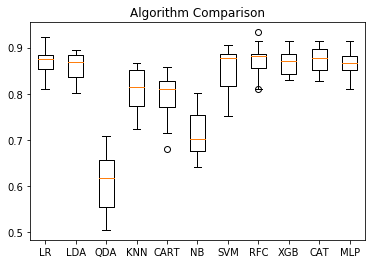

In [174]:
y = df["experimentalclass"]
X = df.drop("experimentalclass", axis=1)
results = select_model(X, y, seed)
results = [results[i].mean() for i in range(len(results))]
results.append("base")
results_to_plot.append(results)

Learning rate set to 0.010075
0:	learn: 0.6861217	total: 5.39ms	remaining: 5.39s
1:	learn: 0.6786137	total: 8.89ms	remaining: 4.43s
2:	learn: 0.6713243	total: 12.4ms	remaining: 4.13s
3:	learn: 0.6653835	total: 15.8ms	remaining: 3.94s
4:	learn: 0.6594080	total: 19.5ms	remaining: 3.88s
5:	learn: 0.6535037	total: 22.9ms	remaining: 3.79s
6:	learn: 0.6480607	total: 26.6ms	remaining: 3.77s
7:	learn: 0.6412731	total: 30.1ms	remaining: 3.73s
8:	learn: 0.6357433	total: 33.9ms	remaining: 3.73s
9:	learn: 0.6313888	total: 37.3ms	remaining: 3.69s
10:	learn: 0.6242730	total: 41.6ms	remaining: 3.74s
11:	learn: 0.6182727	total: 44.5ms	remaining: 3.66s
12:	learn: 0.6126391	total: 47.4ms	remaining: 3.6s
13:	learn: 0.6066519	total: 49.7ms	remaining: 3.5s
14:	learn: 0.6015619	total: 52.1ms	remaining: 3.42s
15:	learn: 0.5957689	total: 54.3ms	remaining: 3.34s
16:	learn: 0.5895960	total: 56.6ms	remaining: 3.27s
17:	learn: 0.5840484	total: 58.9ms	remaining: 3.21s
18:	learn: 0.5799883	total: 61.2ms	remaining: 

196:	learn: 0.2895614	total: 495ms	remaining: 2.02s
197:	learn: 0.2888803	total: 497ms	remaining: 2.01s
198:	learn: 0.2883273	total: 500ms	remaining: 2.01s
199:	learn: 0.2878037	total: 503ms	remaining: 2.01s
200:	learn: 0.2873542	total: 506ms	remaining: 2.01s
201:	learn: 0.2868935	total: 509ms	remaining: 2.01s
202:	learn: 0.2863281	total: 511ms	remaining: 2.01s
203:	learn: 0.2858227	total: 514ms	remaining: 2s
204:	learn: 0.2852635	total: 516ms	remaining: 2s
205:	learn: 0.2847328	total: 519ms	remaining: 2s
206:	learn: 0.2842590	total: 521ms	remaining: 2s
207:	learn: 0.2837225	total: 524ms	remaining: 1.99s
208:	learn: 0.2834538	total: 526ms	remaining: 1.99s
209:	learn: 0.2827060	total: 528ms	remaining: 1.99s
210:	learn: 0.2821334	total: 531ms	remaining: 1.98s
211:	learn: 0.2818197	total: 533ms	remaining: 1.98s
212:	learn: 0.2813575	total: 535ms	remaining: 1.98s
213:	learn: 0.2809093	total: 538ms	remaining: 1.98s
214:	learn: 0.2805440	total: 540ms	remaining: 1.97s
215:	learn: 0.2800959	to

388:	learn: 0.2222413	total: 990ms	remaining: 1.55s
389:	learn: 0.2220326	total: 993ms	remaining: 1.55s
390:	learn: 0.2216300	total: 996ms	remaining: 1.55s
391:	learn: 0.2214675	total: 998ms	remaining: 1.55s
392:	learn: 0.2211970	total: 1s	remaining: 1.55s
393:	learn: 0.2211639	total: 1s	remaining: 1.54s
394:	learn: 0.2209971	total: 1.01s	remaining: 1.54s
395:	learn: 0.2207526	total: 1.01s	remaining: 1.54s
396:	learn: 0.2204199	total: 1.01s	remaining: 1.54s
397:	learn: 0.2201463	total: 1.02s	remaining: 1.54s
398:	learn: 0.2198526	total: 1.02s	remaining: 1.53s
399:	learn: 0.2196566	total: 1.02s	remaining: 1.53s
400:	learn: 0.2193289	total: 1.03s	remaining: 1.53s
401:	learn: 0.2190186	total: 1.03s	remaining: 1.53s
402:	learn: 0.2189026	total: 1.03s	remaining: 1.53s
403:	learn: 0.2187948	total: 1.03s	remaining: 1.53s
404:	learn: 0.2185520	total: 1.04s	remaining: 1.52s
405:	learn: 0.2182954	total: 1.04s	remaining: 1.52s
406:	learn: 0.2180248	total: 1.04s	remaining: 1.52s
407:	learn: 0.2176

587:	learn: 0.1816574	total: 1.49s	remaining: 1.04s
588:	learn: 0.1815519	total: 1.5s	remaining: 1.04s
589:	learn: 0.1814473	total: 1.5s	remaining: 1.04s
590:	learn: 0.1813063	total: 1.5s	remaining: 1.04s
591:	learn: 0.1809494	total: 1.5s	remaining: 1.04s
592:	learn: 0.1807942	total: 1.51s	remaining: 1.03s
593:	learn: 0.1805125	total: 1.51s	remaining: 1.03s
594:	learn: 0.1803836	total: 1.51s	remaining: 1.03s
595:	learn: 0.1801745	total: 1.51s	remaining: 1.03s
596:	learn: 0.1800509	total: 1.52s	remaining: 1.02s
597:	learn: 0.1797600	total: 1.52s	remaining: 1.02s
598:	learn: 0.1795884	total: 1.52s	remaining: 1.02s
599:	learn: 0.1793645	total: 1.52s	remaining: 1.02s
600:	learn: 0.1791700	total: 1.53s	remaining: 1.01s
601:	learn: 0.1790335	total: 1.53s	remaining: 1.01s
602:	learn: 0.1788637	total: 1.53s	remaining: 1.01s
603:	learn: 0.1786381	total: 1.53s	remaining: 1.01s
604:	learn: 0.1784263	total: 1.54s	remaining: 1s
605:	learn: 0.1783709	total: 1.54s	remaining: 1s
606:	learn: 0.1782519	

792:	learn: 0.1469100	total: 2s	remaining: 522ms
793:	learn: 0.1466657	total: 2s	remaining: 520ms
794:	learn: 0.1466079	total: 2s	remaining: 517ms
795:	learn: 0.1463416	total: 2.01s	remaining: 515ms
796:	learn: 0.1460996	total: 2.01s	remaining: 512ms
797:	learn: 0.1459062	total: 2.01s	remaining: 510ms
798:	learn: 0.1456824	total: 2.02s	remaining: 507ms
799:	learn: 0.1455287	total: 2.02s	remaining: 505ms
800:	learn: 0.1453397	total: 2.02s	remaining: 502ms
801:	learn: 0.1451852	total: 2.02s	remaining: 500ms
802:	learn: 0.1450655	total: 2.03s	remaining: 497ms
803:	learn: 0.1448826	total: 2.03s	remaining: 495ms
804:	learn: 0.1448378	total: 2.03s	remaining: 492ms
805:	learn: 0.1446882	total: 2.03s	remaining: 490ms
806:	learn: 0.1446796	total: 2.04s	remaining: 487ms
807:	learn: 0.1445866	total: 2.04s	remaining: 484ms
808:	learn: 0.1444076	total: 2.04s	remaining: 482ms
809:	learn: 0.1442402	total: 2.04s	remaining: 479ms
810:	learn: 0.1440597	total: 2.04s	remaining: 477ms
811:	learn: 0.1440493

Learning rate set to 0.010075
0:	learn: 0.6857536	total: 4.63ms	remaining: 4.62s
1:	learn: 0.6783706	total: 7.3ms	remaining: 3.65s
2:	learn: 0.6706783	total: 9.94ms	remaining: 3.3s
3:	learn: 0.6636110	total: 12.9ms	remaining: 3.22s
4:	learn: 0.6566464	total: 15.4ms	remaining: 3.07s
5:	learn: 0.6499872	total: 17.8ms	remaining: 2.96s
6:	learn: 0.6434172	total: 20ms	remaining: 2.83s
7:	learn: 0.6369531	total: 22.6ms	remaining: 2.8s
8:	learn: 0.6299961	total: 24.9ms	remaining: 2.74s
9:	learn: 0.6239392	total: 27.2ms	remaining: 2.69s
10:	learn: 0.6180531	total: 29.8ms	remaining: 2.68s
11:	learn: 0.6124399	total: 32ms	remaining: 2.64s
12:	learn: 0.6071596	total: 34.4ms	remaining: 2.61s
13:	learn: 0.6011616	total: 36.9ms	remaining: 2.6s
14:	learn: 0.5965243	total: 39ms	remaining: 2.56s
15:	learn: 0.5913663	total: 41.6ms	remaining: 2.56s
16:	learn: 0.5862041	total: 43.9ms	remaining: 2.54s
17:	learn: 0.5808290	total: 46.3ms	remaining: 2.53s
18:	learn: 0.5765335	total: 49.5ms	remaining: 2.55s
19

167:	learn: 0.3080036	total: 502ms	remaining: 2.48s
168:	learn: 0.3072918	total: 506ms	remaining: 2.49s
169:	learn: 0.3067696	total: 509ms	remaining: 2.48s
170:	learn: 0.3060351	total: 512ms	remaining: 2.48s
171:	learn: 0.3055349	total: 514ms	remaining: 2.48s
172:	learn: 0.3048179	total: 518ms	remaining: 2.47s
173:	learn: 0.3041164	total: 521ms	remaining: 2.47s
174:	learn: 0.3036312	total: 524ms	remaining: 2.47s
175:	learn: 0.3027645	total: 526ms	remaining: 2.46s
176:	learn: 0.3021211	total: 528ms	remaining: 2.46s
177:	learn: 0.3015638	total: 531ms	remaining: 2.45s
178:	learn: 0.3008142	total: 535ms	remaining: 2.45s
179:	learn: 0.3002832	total: 537ms	remaining: 2.45s
180:	learn: 0.2997567	total: 541ms	remaining: 2.45s
181:	learn: 0.2989769	total: 544ms	remaining: 2.44s
182:	learn: 0.2985247	total: 546ms	remaining: 2.44s
183:	learn: 0.2979532	total: 550ms	remaining: 2.44s
184:	learn: 0.2974914	total: 553ms	remaining: 2.44s
185:	learn: 0.2970758	total: 556ms	remaining: 2.43s
186:	learn: 

346:	learn: 0.2317601	total: 999ms	remaining: 1.88s
347:	learn: 0.2314670	total: 1s	remaining: 1.88s
348:	learn: 0.2312901	total: 1s	remaining: 1.87s
349:	learn: 0.2309505	total: 1.01s	remaining: 1.87s
350:	learn: 0.2306896	total: 1.01s	remaining: 1.87s
351:	learn: 0.2303414	total: 1.01s	remaining: 1.86s
352:	learn: 0.2300582	total: 1.01s	remaining: 1.86s
353:	learn: 0.2297629	total: 1.02s	remaining: 1.86s
354:	learn: 0.2295037	total: 1.02s	remaining: 1.85s
355:	learn: 0.2292808	total: 1.02s	remaining: 1.85s
356:	learn: 0.2289603	total: 1.02s	remaining: 1.85s
357:	learn: 0.2287962	total: 1.03s	remaining: 1.84s
358:	learn: 0.2286570	total: 1.03s	remaining: 1.84s
359:	learn: 0.2284403	total: 1.03s	remaining: 1.83s
360:	learn: 0.2281196	total: 1.03s	remaining: 1.83s
361:	learn: 0.2278752	total: 1.04s	remaining: 1.83s
362:	learn: 0.2274882	total: 1.04s	remaining: 1.82s
363:	learn: 0.2270798	total: 1.04s	remaining: 1.82s
364:	learn: 0.2268700	total: 1.04s	remaining: 1.82s
365:	learn: 0.2266

531:	learn: 0.1905616	total: 1.5s	remaining: 1.32s
532:	learn: 0.1903877	total: 1.5s	remaining: 1.32s
533:	learn: 0.1902734	total: 1.5s	remaining: 1.31s
534:	learn: 0.1900940	total: 1.51s	remaining: 1.31s
535:	learn: 0.1898977	total: 1.51s	remaining: 1.31s
536:	learn: 0.1898102	total: 1.51s	remaining: 1.3s
537:	learn: 0.1896351	total: 1.52s	remaining: 1.3s
538:	learn: 0.1894449	total: 1.52s	remaining: 1.3s
539:	learn: 0.1892745	total: 1.52s	remaining: 1.3s
540:	learn: 0.1891599	total: 1.52s	remaining: 1.29s
541:	learn: 0.1890759	total: 1.53s	remaining: 1.29s
542:	learn: 0.1888679	total: 1.53s	remaining: 1.29s
543:	learn: 0.1885905	total: 1.53s	remaining: 1.29s
544:	learn: 0.1882904	total: 1.54s	remaining: 1.28s
545:	learn: 0.1880338	total: 1.54s	remaining: 1.28s
546:	learn: 0.1878966	total: 1.54s	remaining: 1.28s
547:	learn: 0.1877713	total: 1.55s	remaining: 1.27s
548:	learn: 0.1875706	total: 1.55s	remaining: 1.27s
549:	learn: 0.1874166	total: 1.55s	remaining: 1.27s
550:	learn: 0.18708

694:	learn: 0.1619416	total: 1.99s	remaining: 875ms
695:	learn: 0.1618114	total: 2s	remaining: 873ms
696:	learn: 0.1616520	total: 2s	remaining: 870ms
697:	learn: 0.1616413	total: 2s	remaining: 867ms
698:	learn: 0.1616268	total: 2.01s	remaining: 865ms
699:	learn: 0.1613896	total: 2.01s	remaining: 862ms
700:	learn: 0.1612484	total: 2.01s	remaining: 859ms
701:	learn: 0.1610906	total: 2.02s	remaining: 856ms
702:	learn: 0.1609321	total: 2.02s	remaining: 853ms
703:	learn: 0.1607431	total: 2.02s	remaining: 850ms
704:	learn: 0.1605778	total: 2.02s	remaining: 847ms
705:	learn: 0.1604276	total: 2.03s	remaining: 845ms
706:	learn: 0.1601942	total: 2.03s	remaining: 842ms
707:	learn: 0.1601368	total: 2.04s	remaining: 839ms
708:	learn: 0.1601261	total: 2.04s	remaining: 837ms
709:	learn: 0.1599692	total: 2.04s	remaining: 834ms
710:	learn: 0.1597332	total: 2.05s	remaining: 832ms
711:	learn: 0.1595591	total: 2.05s	remaining: 829ms
712:	learn: 0.1592936	total: 2.05s	remaining: 827ms
713:	learn: 0.1591643

887:	learn: 0.1325857	total: 2.49s	remaining: 315ms
888:	learn: 0.1323336	total: 2.5s	remaining: 312ms
889:	learn: 0.1320420	total: 2.5s	remaining: 309ms
890:	learn: 0.1319321	total: 2.5s	remaining: 306ms
891:	learn: 0.1317716	total: 2.5s	remaining: 303ms
892:	learn: 0.1316135	total: 2.51s	remaining: 301ms
893:	learn: 0.1315187	total: 2.51s	remaining: 298ms
894:	learn: 0.1312972	total: 2.51s	remaining: 295ms
895:	learn: 0.1311327	total: 2.52s	remaining: 292ms
896:	learn: 0.1310362	total: 2.52s	remaining: 289ms
897:	learn: 0.1308846	total: 2.52s	remaining: 286ms
898:	learn: 0.1306999	total: 2.52s	remaining: 283ms
899:	learn: 0.1305873	total: 2.52s	remaining: 281ms
900:	learn: 0.1304488	total: 2.53s	remaining: 278ms
901:	learn: 0.1303126	total: 2.53s	remaining: 275ms
902:	learn: 0.1301814	total: 2.53s	remaining: 272ms
903:	learn: 0.1301118	total: 2.54s	remaining: 269ms
904:	learn: 0.1298659	total: 2.54s	remaining: 266ms
905:	learn: 0.1296586	total: 2.54s	remaining: 264ms
906:	learn: 0.12

69:	learn: 0.4145428	total: 170ms	remaining: 2.26s
70:	learn: 0.4126205	total: 173ms	remaining: 2.26s
71:	learn: 0.4107997	total: 176ms	remaining: 2.27s
72:	learn: 0.4084859	total: 179ms	remaining: 2.27s
73:	learn: 0.4065814	total: 182ms	remaining: 2.28s
74:	learn: 0.4046859	total: 184ms	remaining: 2.27s
75:	learn: 0.4030469	total: 187ms	remaining: 2.27s
76:	learn: 0.4011202	total: 189ms	remaining: 2.26s
77:	learn: 0.3994303	total: 192ms	remaining: 2.26s
78:	learn: 0.3978375	total: 194ms	remaining: 2.26s
79:	learn: 0.3959394	total: 197ms	remaining: 2.27s
80:	learn: 0.3945961	total: 200ms	remaining: 2.27s
81:	learn: 0.3929836	total: 202ms	remaining: 2.26s
82:	learn: 0.3912593	total: 205ms	remaining: 2.26s
83:	learn: 0.3890165	total: 208ms	remaining: 2.26s
84:	learn: 0.3869651	total: 210ms	remaining: 2.26s
85:	learn: 0.3850686	total: 213ms	remaining: 2.26s
86:	learn: 0.3839123	total: 215ms	remaining: 2.26s
87:	learn: 0.3825329	total: 217ms	remaining: 2.25s
88:	learn: 0.3811853	total: 220

278:	learn: 0.2512071	total: 679ms	remaining: 1.75s
279:	learn: 0.2510689	total: 682ms	remaining: 1.75s
280:	learn: 0.2507381	total: 685ms	remaining: 1.75s
281:	learn: 0.2503953	total: 688ms	remaining: 1.75s
282:	learn: 0.2501793	total: 691ms	remaining: 1.75s
283:	learn: 0.2498003	total: 695ms	remaining: 1.75s
284:	learn: 0.2495345	total: 698ms	remaining: 1.75s
285:	learn: 0.2489653	total: 700ms	remaining: 1.75s
286:	learn: 0.2486456	total: 703ms	remaining: 1.75s
287:	learn: 0.2482799	total: 706ms	remaining: 1.75s
288:	learn: 0.2479636	total: 708ms	remaining: 1.74s
289:	learn: 0.2477796	total: 711ms	remaining: 1.74s
290:	learn: 0.2475402	total: 713ms	remaining: 1.74s
291:	learn: 0.2472209	total: 715ms	remaining: 1.73s
292:	learn: 0.2469075	total: 718ms	remaining: 1.73s
293:	learn: 0.2465705	total: 720ms	remaining: 1.73s
294:	learn: 0.2460700	total: 723ms	remaining: 1.73s
295:	learn: 0.2459158	total: 725ms	remaining: 1.72s
296:	learn: 0.2456408	total: 727ms	remaining: 1.72s
297:	learn: 

482:	learn: 0.1993889	total: 1.18s	remaining: 1.27s
483:	learn: 0.1991388	total: 1.19s	remaining: 1.26s
484:	learn: 0.1988879	total: 1.19s	remaining: 1.26s
485:	learn: 0.1987668	total: 1.19s	remaining: 1.26s
486:	learn: 0.1985812	total: 1.2s	remaining: 1.26s
487:	learn: 0.1983098	total: 1.2s	remaining: 1.26s
488:	learn: 0.1980863	total: 1.2s	remaining: 1.25s
489:	learn: 0.1978824	total: 1.2s	remaining: 1.25s
490:	learn: 0.1975656	total: 1.21s	remaining: 1.25s
491:	learn: 0.1974131	total: 1.21s	remaining: 1.25s
492:	learn: 0.1972377	total: 1.21s	remaining: 1.25s
493:	learn: 0.1969755	total: 1.21s	remaining: 1.24s
494:	learn: 0.1969588	total: 1.22s	remaining: 1.24s
495:	learn: 0.1968578	total: 1.22s	remaining: 1.24s
496:	learn: 0.1967749	total: 1.22s	remaining: 1.24s
497:	learn: 0.1966617	total: 1.22s	remaining: 1.23s
498:	learn: 0.1964883	total: 1.23s	remaining: 1.23s
499:	learn: 0.1964144	total: 1.23s	remaining: 1.23s
500:	learn: 0.1962793	total: 1.23s	remaining: 1.23s
501:	learn: 0.19

685:	learn: 0.1633496	total: 1.69s	remaining: 773ms
686:	learn: 0.1633271	total: 1.69s	remaining: 771ms
687:	learn: 0.1631389	total: 1.7s	remaining: 769ms
688:	learn: 0.1630151	total: 1.7s	remaining: 767ms
689:	learn: 0.1627868	total: 1.7s	remaining: 764ms
690:	learn: 0.1625635	total: 1.7s	remaining: 762ms
691:	learn: 0.1624407	total: 1.71s	remaining: 759ms
692:	learn: 0.1623734	total: 1.71s	remaining: 757ms
693:	learn: 0.1622847	total: 1.71s	remaining: 754ms
694:	learn: 0.1621398	total: 1.71s	remaining: 752ms
695:	learn: 0.1621025	total: 1.72s	remaining: 749ms
696:	learn: 0.1618854	total: 1.72s	remaining: 747ms
697:	learn: 0.1616664	total: 1.72s	remaining: 745ms
698:	learn: 0.1616384	total: 1.72s	remaining: 742ms
699:	learn: 0.1613236	total: 1.73s	remaining: 740ms
700:	learn: 0.1610507	total: 1.73s	remaining: 738ms
701:	learn: 0.1608878	total: 1.73s	remaining: 735ms
702:	learn: 0.1607782	total: 1.73s	remaining: 733ms
703:	learn: 0.1606309	total: 1.74s	remaining: 730ms
704:	learn: 0.16

887:	learn: 0.1323016	total: 2.19s	remaining: 276ms
888:	learn: 0.1321750	total: 2.19s	remaining: 274ms
889:	learn: 0.1321425	total: 2.2s	remaining: 272ms
890:	learn: 0.1320443	total: 2.2s	remaining: 269ms
891:	learn: 0.1317710	total: 2.2s	remaining: 267ms
892:	learn: 0.1316615	total: 2.21s	remaining: 264ms
893:	learn: 0.1315600	total: 2.21s	remaining: 262ms
894:	learn: 0.1312927	total: 2.21s	remaining: 260ms
895:	learn: 0.1311027	total: 2.21s	remaining: 257ms
896:	learn: 0.1309715	total: 2.22s	remaining: 255ms
897:	learn: 0.1308594	total: 2.22s	remaining: 252ms
898:	learn: 0.1307425	total: 2.22s	remaining: 250ms
899:	learn: 0.1306051	total: 2.22s	remaining: 247ms
900:	learn: 0.1305319	total: 2.23s	remaining: 245ms
901:	learn: 0.1304457	total: 2.23s	remaining: 242ms
902:	learn: 0.1303398	total: 2.23s	remaining: 240ms
903:	learn: 0.1301935	total: 2.23s	remaining: 237ms
904:	learn: 0.1301317	total: 2.24s	remaining: 235ms
905:	learn: 0.1299424	total: 2.24s	remaining: 232ms
906:	learn: 0.1

58:	learn: 0.4342422	total: 183ms	remaining: 2.92s
59:	learn: 0.4316874	total: 185ms	remaining: 2.9s
60:	learn: 0.4298063	total: 190ms	remaining: 2.92s
61:	learn: 0.4275743	total: 192ms	remaining: 2.91s
62:	learn: 0.4253578	total: 195ms	remaining: 2.9s
63:	learn: 0.4225077	total: 198ms	remaining: 2.9s
64:	learn: 0.4202626	total: 201ms	remaining: 2.9s
65:	learn: 0.4182976	total: 205ms	remaining: 2.91s
66:	learn: 0.4162687	total: 210ms	remaining: 2.92s
67:	learn: 0.4141410	total: 213ms	remaining: 2.92s
68:	learn: 0.4124371	total: 216ms	remaining: 2.91s
69:	learn: 0.4104001	total: 220ms	remaining: 2.92s
70:	learn: 0.4091746	total: 223ms	remaining: 2.92s
71:	learn: 0.4065497	total: 225ms	remaining: 2.9s
72:	learn: 0.4046959	total: 227ms	remaining: 2.89s
73:	learn: 0.4028108	total: 230ms	remaining: 2.88s
74:	learn: 0.4001765	total: 233ms	remaining: 2.87s
75:	learn: 0.3984624	total: 236ms	remaining: 2.87s
76:	learn: 0.3963245	total: 239ms	remaining: 2.86s
77:	learn: 0.3945096	total: 242ms	re

226:	learn: 0.2664742	total: 680ms	remaining: 2.31s
227:	learn: 0.2660853	total: 682ms	remaining: 2.31s
228:	learn: 0.2655561	total: 685ms	remaining: 2.31s
229:	learn: 0.2650884	total: 687ms	remaining: 2.3s
230:	learn: 0.2648131	total: 690ms	remaining: 2.29s
231:	learn: 0.2643404	total: 692ms	remaining: 2.29s
232:	learn: 0.2640598	total: 695ms	remaining: 2.29s
233:	learn: 0.2637678	total: 698ms	remaining: 2.28s
234:	learn: 0.2631117	total: 701ms	remaining: 2.28s
235:	learn: 0.2626492	total: 704ms	remaining: 2.28s
236:	learn: 0.2622246	total: 707ms	remaining: 2.27s
237:	learn: 0.2617937	total: 709ms	remaining: 2.27s
238:	learn: 0.2612534	total: 712ms	remaining: 2.27s
239:	learn: 0.2609326	total: 714ms	remaining: 2.26s
240:	learn: 0.2604748	total: 716ms	remaining: 2.26s
241:	learn: 0.2601022	total: 719ms	remaining: 2.25s
242:	learn: 0.2598541	total: 722ms	remaining: 2.25s
243:	learn: 0.2593298	total: 724ms	remaining: 2.24s
244:	learn: 0.2588269	total: 726ms	remaining: 2.24s
245:	learn: 0

427:	learn: 0.2048606	total: 1.18s	remaining: 1.58s
428:	learn: 0.2047057	total: 1.19s	remaining: 1.58s
429:	learn: 0.2045700	total: 1.19s	remaining: 1.58s
430:	learn: 0.2043732	total: 1.19s	remaining: 1.57s
431:	learn: 0.2042591	total: 1.2s	remaining: 1.57s
432:	learn: 0.2041682	total: 1.2s	remaining: 1.57s
433:	learn: 0.2040675	total: 1.2s	remaining: 1.56s
434:	learn: 0.2038879	total: 1.2s	remaining: 1.56s
435:	learn: 0.2035382	total: 1.21s	remaining: 1.56s
436:	learn: 0.2032784	total: 1.21s	remaining: 1.55s
437:	learn: 0.2031472	total: 1.21s	remaining: 1.55s
438:	learn: 0.2029364	total: 1.21s	remaining: 1.55s
439:	learn: 0.2027828	total: 1.22s	remaining: 1.55s
440:	learn: 0.2025773	total: 1.22s	remaining: 1.54s
441:	learn: 0.2023003	total: 1.22s	remaining: 1.54s
442:	learn: 0.2021381	total: 1.22s	remaining: 1.54s
443:	learn: 0.2017784	total: 1.22s	remaining: 1.53s
444:	learn: 0.2015187	total: 1.23s	remaining: 1.53s
445:	learn: 0.2012452	total: 1.23s	remaining: 1.53s
446:	learn: 0.20

632:	learn: 0.1669574	total: 1.69s	remaining: 979ms
633:	learn: 0.1667958	total: 1.69s	remaining: 976ms
634:	learn: 0.1666179	total: 1.69s	remaining: 974ms
635:	learn: 0.1665265	total: 1.7s	remaining: 972ms
636:	learn: 0.1664850	total: 1.7s	remaining: 969ms
637:	learn: 0.1663174	total: 1.7s	remaining: 967ms
638:	learn: 0.1661440	total: 1.71s	remaining: 964ms
639:	learn: 0.1660326	total: 1.71s	remaining: 961ms
640:	learn: 0.1658983	total: 1.71s	remaining: 959ms
641:	learn: 0.1656724	total: 1.71s	remaining: 956ms
642:	learn: 0.1654573	total: 1.72s	remaining: 953ms
643:	learn: 0.1652526	total: 1.72s	remaining: 950ms
644:	learn: 0.1650796	total: 1.72s	remaining: 948ms
645:	learn: 0.1647761	total: 1.72s	remaining: 945ms
646:	learn: 0.1646861	total: 1.73s	remaining: 942ms
647:	learn: 0.1644810	total: 1.73s	remaining: 939ms
648:	learn: 0.1642620	total: 1.73s	remaining: 936ms
649:	learn: 0.1640279	total: 1.73s	remaining: 933ms
650:	learn: 0.1638947	total: 1.74s	remaining: 931ms
651:	learn: 0.1

835:	learn: 0.1355390	total: 2.19s	remaining: 431ms
836:	learn: 0.1353842	total: 2.2s	remaining: 428ms
837:	learn: 0.1352024	total: 2.2s	remaining: 425ms
838:	learn: 0.1350707	total: 2.2s	remaining: 423ms
839:	learn: 0.1349625	total: 2.21s	remaining: 420ms
840:	learn: 0.1348347	total: 2.21s	remaining: 418ms
841:	learn: 0.1346698	total: 2.21s	remaining: 415ms
842:	learn: 0.1345181	total: 2.21s	remaining: 412ms
843:	learn: 0.1342404	total: 2.22s	remaining: 410ms
844:	learn: 0.1340282	total: 2.22s	remaining: 407ms
845:	learn: 0.1338188	total: 2.22s	remaining: 404ms
846:	learn: 0.1336972	total: 2.22s	remaining: 402ms
847:	learn: 0.1335861	total: 2.23s	remaining: 399ms
848:	learn: 0.1334291	total: 2.23s	remaining: 396ms
849:	learn: 0.1331872	total: 2.23s	remaining: 394ms
850:	learn: 0.1330631	total: 2.23s	remaining: 391ms
851:	learn: 0.1329026	total: 2.23s	remaining: 388ms
852:	learn: 0.1326789	total: 2.24s	remaining: 386ms
853:	learn: 0.1325289	total: 2.24s	remaining: 383ms
854:	learn: 0.1

24:	learn: 0.5578491	total: 61.9ms	remaining: 2.41s
25:	learn: 0.5530949	total: 64.6ms	remaining: 2.42s
26:	learn: 0.5482458	total: 67.4ms	remaining: 2.43s
27:	learn: 0.5441962	total: 70.1ms	remaining: 2.43s
28:	learn: 0.5394096	total: 73ms	remaining: 2.44s
29:	learn: 0.5352867	total: 76ms	remaining: 2.46s
30:	learn: 0.5319177	total: 78.4ms	remaining: 2.45s
31:	learn: 0.5280611	total: 80.8ms	remaining: 2.44s
32:	learn: 0.5238677	total: 83.3ms	remaining: 2.44s
33:	learn: 0.5199955	total: 85.7ms	remaining: 2.43s
34:	learn: 0.5165287	total: 88.8ms	remaining: 2.45s
35:	learn: 0.5129224	total: 91.2ms	remaining: 2.44s
36:	learn: 0.5090297	total: 94.3ms	remaining: 2.45s
37:	learn: 0.5052327	total: 97.2ms	remaining: 2.46s
38:	learn: 0.5015115	total: 99.8ms	remaining: 2.46s
39:	learn: 0.4979562	total: 102ms	remaining: 2.46s
40:	learn: 0.4951406	total: 105ms	remaining: 2.46s
41:	learn: 0.4924176	total: 107ms	remaining: 2.45s
42:	learn: 0.4892497	total: 110ms	remaining: 2.44s
43:	learn: 0.4863758

224:	learn: 0.2790418	total: 569ms	remaining: 1.96s
225:	learn: 0.2786116	total: 572ms	remaining: 1.96s
226:	learn: 0.2780055	total: 574ms	remaining: 1.96s
227:	learn: 0.2773265	total: 577ms	remaining: 1.95s
228:	learn: 0.2768649	total: 580ms	remaining: 1.95s
229:	learn: 0.2763372	total: 583ms	remaining: 1.95s
230:	learn: 0.2758848	total: 585ms	remaining: 1.95s
231:	learn: 0.2755546	total: 588ms	remaining: 1.95s
232:	learn: 0.2751699	total: 590ms	remaining: 1.94s
233:	learn: 0.2746943	total: 593ms	remaining: 1.94s
234:	learn: 0.2741458	total: 595ms	remaining: 1.94s
235:	learn: 0.2737409	total: 598ms	remaining: 1.94s
236:	learn: 0.2734272	total: 601ms	remaining: 1.93s
237:	learn: 0.2730896	total: 604ms	remaining: 1.93s
238:	learn: 0.2727018	total: 606ms	remaining: 1.93s
239:	learn: 0.2723198	total: 609ms	remaining: 1.93s
240:	learn: 0.2719140	total: 612ms	remaining: 1.93s
241:	learn: 0.2715453	total: 615ms	remaining: 1.93s
242:	learn: 0.2709816	total: 617ms	remaining: 1.92s
243:	learn: 

428:	learn: 0.2175384	total: 1.07s	remaining: 1.43s
429:	learn: 0.2173320	total: 1.08s	remaining: 1.43s
430:	learn: 0.2171021	total: 1.08s	remaining: 1.43s
431:	learn: 0.2168451	total: 1.08s	remaining: 1.42s
432:	learn: 0.2165726	total: 1.09s	remaining: 1.42s
433:	learn: 0.2163470	total: 1.09s	remaining: 1.42s
434:	learn: 0.2162155	total: 1.09s	remaining: 1.42s
435:	learn: 0.2158994	total: 1.09s	remaining: 1.42s
436:	learn: 0.2157690	total: 1.1s	remaining: 1.41s
437:	learn: 0.2155905	total: 1.1s	remaining: 1.41s
438:	learn: 0.2152245	total: 1.1s	remaining: 1.41s
439:	learn: 0.2150071	total: 1.1s	remaining: 1.41s
440:	learn: 0.2148448	total: 1.11s	remaining: 1.4s
441:	learn: 0.2148066	total: 1.11s	remaining: 1.4s
442:	learn: 0.2146323	total: 1.11s	remaining: 1.4s
443:	learn: 0.2144341	total: 1.11s	remaining: 1.4s
444:	learn: 0.2141829	total: 1.12s	remaining: 1.39s
445:	learn: 0.2138916	total: 1.12s	remaining: 1.39s
446:	learn: 0.2136022	total: 1.12s	remaining: 1.39s
447:	learn: 0.213421

633:	learn: 0.1784968	total: 1.58s	remaining: 915ms
634:	learn: 0.1782250	total: 1.59s	remaining: 913ms
635:	learn: 0.1780254	total: 1.59s	remaining: 910ms
636:	learn: 0.1779550	total: 1.59s	remaining: 908ms
637:	learn: 0.1777616	total: 1.6s	remaining: 906ms
638:	learn: 0.1776463	total: 1.6s	remaining: 903ms
639:	learn: 0.1774790	total: 1.6s	remaining: 901ms
640:	learn: 0.1773286	total: 1.6s	remaining: 899ms
641:	learn: 0.1769065	total: 1.61s	remaining: 896ms
642:	learn: 0.1767063	total: 1.61s	remaining: 894ms
643:	learn: 0.1765528	total: 1.61s	remaining: 891ms
644:	learn: 0.1763636	total: 1.61s	remaining: 888ms
645:	learn: 0.1760591	total: 1.62s	remaining: 886ms
646:	learn: 0.1758486	total: 1.62s	remaining: 883ms
647:	learn: 0.1756239	total: 1.62s	remaining: 881ms
648:	learn: 0.1754958	total: 1.62s	remaining: 878ms
649:	learn: 0.1752987	total: 1.63s	remaining: 876ms
650:	learn: 0.1752171	total: 1.63s	remaining: 873ms
651:	learn: 0.1750599	total: 1.63s	remaining: 871ms
652:	learn: 0.17

836:	learn: 0.1443956	total: 2.09s	remaining: 408ms
837:	learn: 0.1442482	total: 2.1s	remaining: 405ms
838:	learn: 0.1440140	total: 2.1s	remaining: 403ms
839:	learn: 0.1439257	total: 2.1s	remaining: 400ms
840:	learn: 0.1436625	total: 2.1s	remaining: 398ms
841:	learn: 0.1434544	total: 2.11s	remaining: 395ms
842:	learn: 0.1432710	total: 2.11s	remaining: 393ms
843:	learn: 0.1431339	total: 2.11s	remaining: 390ms
844:	learn: 0.1429922	total: 2.11s	remaining: 388ms
845:	learn: 0.1427649	total: 2.12s	remaining: 385ms
846:	learn: 0.1426916	total: 2.12s	remaining: 383ms
847:	learn: 0.1424523	total: 2.12s	remaining: 380ms
848:	learn: 0.1423075	total: 2.13s	remaining: 378ms
849:	learn: 0.1422931	total: 2.13s	remaining: 376ms
850:	learn: 0.1422099	total: 2.13s	remaining: 373ms
851:	learn: 0.1420495	total: 2.13s	remaining: 371ms
852:	learn: 0.1418536	total: 2.14s	remaining: 368ms
853:	learn: 0.1415538	total: 2.14s	remaining: 366ms
854:	learn: 0.1413924	total: 2.14s	remaining: 363ms
855:	learn: 0.14

15:	learn: 0.5921136	total: 46.5ms	remaining: 2.86s
16:	learn: 0.5867431	total: 48.9ms	remaining: 2.83s
17:	learn: 0.5808163	total: 51.3ms	remaining: 2.8s
18:	learn: 0.5759394	total: 53.8ms	remaining: 2.78s
19:	learn: 0.5709044	total: 56.4ms	remaining: 2.76s
20:	learn: 0.5654279	total: 59ms	remaining: 2.75s
21:	learn: 0.5607574	total: 61.2ms	remaining: 2.72s
22:	learn: 0.5567427	total: 63.5ms	remaining: 2.69s
23:	learn: 0.5525858	total: 65.1ms	remaining: 2.65s
24:	learn: 0.5478402	total: 67.4ms	remaining: 2.63s
25:	learn: 0.5434577	total: 69.7ms	remaining: 2.61s
26:	learn: 0.5392927	total: 72.8ms	remaining: 2.62s
27:	learn: 0.5350010	total: 75.1ms	remaining: 2.6s
28:	learn: 0.5301311	total: 77.3ms	remaining: 2.59s
29:	learn: 0.5262456	total: 79.7ms	remaining: 2.58s
30:	learn: 0.5230184	total: 82ms	remaining: 2.56s
31:	learn: 0.5192688	total: 84.3ms	remaining: 2.55s
32:	learn: 0.5168141	total: 86.8ms	remaining: 2.54s
33:	learn: 0.5134610	total: 89.2ms	remaining: 2.53s
34:	learn: 0.50968

219:	learn: 0.2726918	total: 553ms	remaining: 1.96s
220:	learn: 0.2722983	total: 556ms	remaining: 1.96s
221:	learn: 0.2720546	total: 559ms	remaining: 1.96s
222:	learn: 0.2715583	total: 562ms	remaining: 1.96s
223:	learn: 0.2710496	total: 564ms	remaining: 1.96s
224:	learn: 0.2705880	total: 568ms	remaining: 1.96s
225:	learn: 0.2700413	total: 570ms	remaining: 1.95s
226:	learn: 0.2694828	total: 573ms	remaining: 1.95s
227:	learn: 0.2692049	total: 575ms	remaining: 1.95s
228:	learn: 0.2687421	total: 578ms	remaining: 1.94s
229:	learn: 0.2684326	total: 580ms	remaining: 1.94s
230:	learn: 0.2680304	total: 583ms	remaining: 1.94s
231:	learn: 0.2675011	total: 585ms	remaining: 1.94s
232:	learn: 0.2672415	total: 588ms	remaining: 1.93s
233:	learn: 0.2668898	total: 590ms	remaining: 1.93s
234:	learn: 0.2663869	total: 593ms	remaining: 1.93s
235:	learn: 0.2658638	total: 595ms	remaining: 1.93s
236:	learn: 0.2655193	total: 598ms	remaining: 1.92s
237:	learn: 0.2651240	total: 600ms	remaining: 1.92s
238:	learn: 

421:	learn: 0.2074069	total: 1.06s	remaining: 1.45s
422:	learn: 0.2071938	total: 1.06s	remaining: 1.45s
423:	learn: 0.2070511	total: 1.06s	remaining: 1.45s
424:	learn: 0.2067525	total: 1.07s	remaining: 1.45s
425:	learn: 0.2065189	total: 1.07s	remaining: 1.44s
426:	learn: 0.2062851	total: 1.07s	remaining: 1.44s
427:	learn: 0.2059946	total: 1.08s	remaining: 1.44s
428:	learn: 0.2057946	total: 1.08s	remaining: 1.44s
429:	learn: 0.2055541	total: 1.08s	remaining: 1.43s
430:	learn: 0.2053708	total: 1.08s	remaining: 1.43s
431:	learn: 0.2051722	total: 1.09s	remaining: 1.43s
432:	learn: 0.2049501	total: 1.09s	remaining: 1.43s
433:	learn: 0.2046117	total: 1.09s	remaining: 1.42s
434:	learn: 0.2043774	total: 1.09s	remaining: 1.42s
435:	learn: 0.2042229	total: 1.1s	remaining: 1.42s
436:	learn: 0.2040933	total: 1.1s	remaining: 1.42s
437:	learn: 0.2036830	total: 1.1s	remaining: 1.41s
438:	learn: 0.2035265	total: 1.1s	remaining: 1.41s
439:	learn: 0.2032604	total: 1.11s	remaining: 1.41s
440:	learn: 0.20

609:	learn: 0.1696818	total: 1.56s	remaining: 1s
610:	learn: 0.1695396	total: 1.57s	remaining: 998ms
611:	learn: 0.1692416	total: 1.57s	remaining: 995ms
612:	learn: 0.1691034	total: 1.57s	remaining: 993ms
613:	learn: 0.1689468	total: 1.57s	remaining: 990ms
614:	learn: 0.1687103	total: 1.58s	remaining: 988ms
615:	learn: 0.1684696	total: 1.58s	remaining: 985ms
616:	learn: 0.1682726	total: 1.58s	remaining: 983ms
617:	learn: 0.1681178	total: 1.59s	remaining: 981ms
618:	learn: 0.1680485	total: 1.59s	remaining: 978ms
619:	learn: 0.1677418	total: 1.59s	remaining: 975ms
620:	learn: 0.1675481	total: 1.59s	remaining: 973ms
621:	learn: 0.1673903	total: 1.6s	remaining: 970ms
622:	learn: 0.1671271	total: 1.6s	remaining: 968ms
623:	learn: 0.1668970	total: 1.6s	remaining: 965ms
624:	learn: 0.1665699	total: 1.6s	remaining: 962ms
625:	learn: 0.1662450	total: 1.61s	remaining: 960ms
626:	learn: 0.1659905	total: 1.61s	remaining: 957ms
627:	learn: 0.1659219	total: 1.61s	remaining: 954ms
628:	learn: 0.16581

809:	learn: 0.1353552	total: 2.07s	remaining: 486ms
810:	learn: 0.1351925	total: 2.08s	remaining: 484ms
811:	learn: 0.1350896	total: 2.08s	remaining: 481ms
812:	learn: 0.1348871	total: 2.08s	remaining: 479ms
813:	learn: 0.1346748	total: 2.08s	remaining: 476ms
814:	learn: 0.1345722	total: 2.09s	remaining: 474ms
815:	learn: 0.1343401	total: 2.09s	remaining: 471ms
816:	learn: 0.1342303	total: 2.09s	remaining: 469ms
817:	learn: 0.1341269	total: 2.09s	remaining: 466ms
818:	learn: 0.1341021	total: 2.1s	remaining: 463ms
819:	learn: 0.1339987	total: 2.1s	remaining: 461ms
820:	learn: 0.1338300	total: 2.1s	remaining: 458ms
821:	learn: 0.1336149	total: 2.1s	remaining: 456ms
822:	learn: 0.1335376	total: 2.11s	remaining: 453ms
823:	learn: 0.1333531	total: 2.11s	remaining: 451ms
824:	learn: 0.1332162	total: 2.11s	remaining: 448ms
825:	learn: 0.1330980	total: 2.11s	remaining: 445ms
826:	learn: 0.1329710	total: 2.12s	remaining: 443ms
827:	learn: 0.1328236	total: 2.12s	remaining: 440ms
828:	learn: 0.13

Learning rate set to 0.010079
0:	learn: 0.6865672	total: 5.16ms	remaining: 5.15s
1:	learn: 0.6796836	total: 8.06ms	remaining: 4.02s
2:	learn: 0.6720169	total: 11.1ms	remaining: 3.67s
3:	learn: 0.6658840	total: 14.9ms	remaining: 3.71s
4:	learn: 0.6588784	total: 18ms	remaining: 3.59s
5:	learn: 0.6527575	total: 21.3ms	remaining: 3.53s
6:	learn: 0.6476140	total: 24.3ms	remaining: 3.45s
7:	learn: 0.6414303	total: 27.3ms	remaining: 3.38s
8:	learn: 0.6357032	total: 31.1ms	remaining: 3.42s
9:	learn: 0.6312753	total: 33.9ms	remaining: 3.36s
10:	learn: 0.6250898	total: 36.7ms	remaining: 3.3s
11:	learn: 0.6197843	total: 39.6ms	remaining: 3.26s
12:	learn: 0.6149882	total: 42.2ms	remaining: 3.2s
13:	learn: 0.6091927	total: 44.7ms	remaining: 3.15s
14:	learn: 0.6040696	total: 47ms	remaining: 3.08s
15:	learn: 0.5990253	total: 49.2ms	remaining: 3.03s
16:	learn: 0.5938762	total: 51.3ms	remaining: 2.96s
17:	learn: 0.5884418	total: 53.4ms	remaining: 2.92s
18:	learn: 0.5844425	total: 55.5ms	remaining: 2.87

197:	learn: 0.2940157	total: 507ms	remaining: 2.05s
198:	learn: 0.2933609	total: 510ms	remaining: 2.05s
199:	learn: 0.2929929	total: 513ms	remaining: 2.05s
200:	learn: 0.2926340	total: 515ms	remaining: 2.05s
201:	learn: 0.2921910	total: 518ms	remaining: 2.05s
202:	learn: 0.2917307	total: 521ms	remaining: 2.05s
203:	learn: 0.2914398	total: 524ms	remaining: 2.04s
204:	learn: 0.2908864	total: 527ms	remaining: 2.04s
205:	learn: 0.2902687	total: 529ms	remaining: 2.04s
206:	learn: 0.2899141	total: 532ms	remaining: 2.04s
207:	learn: 0.2892820	total: 534ms	remaining: 2.03s
208:	learn: 0.2889883	total: 537ms	remaining: 2.03s
209:	learn: 0.2885502	total: 539ms	remaining: 2.03s
210:	learn: 0.2879822	total: 542ms	remaining: 2.02s
211:	learn: 0.2875572	total: 544ms	remaining: 2.02s
212:	learn: 0.2870944	total: 547ms	remaining: 2.02s
213:	learn: 0.2867937	total: 549ms	remaining: 2.02s
214:	learn: 0.2864516	total: 551ms	remaining: 2.01s
215:	learn: 0.2860350	total: 554ms	remaining: 2.01s
216:	learn: 

388:	learn: 0.2295177	total: 1.01s	remaining: 1.59s
389:	learn: 0.2291930	total: 1.01s	remaining: 1.59s
390:	learn: 0.2289514	total: 1.02s	remaining: 1.58s
391:	learn: 0.2287138	total: 1.02s	remaining: 1.58s
392:	learn: 0.2284197	total: 1.02s	remaining: 1.58s
393:	learn: 0.2283282	total: 1.03s	remaining: 1.58s
394:	learn: 0.2279165	total: 1.03s	remaining: 1.57s
395:	learn: 0.2276085	total: 1.03s	remaining: 1.57s
396:	learn: 0.2273744	total: 1.03s	remaining: 1.57s
397:	learn: 0.2271885	total: 1.04s	remaining: 1.57s
398:	learn: 0.2269026	total: 1.04s	remaining: 1.56s
399:	learn: 0.2266874	total: 1.04s	remaining: 1.56s
400:	learn: 0.2264513	total: 1.04s	remaining: 1.56s
401:	learn: 0.2262697	total: 1.05s	remaining: 1.56s
402:	learn: 0.2260531	total: 1.05s	remaining: 1.55s
403:	learn: 0.2258978	total: 1.05s	remaining: 1.55s
404:	learn: 0.2256267	total: 1.05s	remaining: 1.55s
405:	learn: 0.2253507	total: 1.06s	remaining: 1.55s
406:	learn: 0.2251273	total: 1.06s	remaining: 1.54s
407:	learn: 

575:	learn: 0.1920996	total: 1.51s	remaining: 1.11s
576:	learn: 0.1919101	total: 1.51s	remaining: 1.11s
577:	learn: 0.1917782	total: 1.52s	remaining: 1.11s
578:	learn: 0.1916593	total: 1.52s	remaining: 1.1s
579:	learn: 0.1914438	total: 1.52s	remaining: 1.1s
580:	learn: 0.1911792	total: 1.52s	remaining: 1.1s
581:	learn: 0.1911232	total: 1.53s	remaining: 1.1s
582:	learn: 0.1909905	total: 1.53s	remaining: 1.09s
583:	learn: 0.1907151	total: 1.53s	remaining: 1.09s
584:	learn: 0.1906737	total: 1.54s	remaining: 1.09s
585:	learn: 0.1905410	total: 1.54s	remaining: 1.09s
586:	learn: 0.1904393	total: 1.54s	remaining: 1.08s
587:	learn: 0.1902202	total: 1.54s	remaining: 1.08s
588:	learn: 0.1900894	total: 1.55s	remaining: 1.08s
589:	learn: 0.1898948	total: 1.55s	remaining: 1.08s
590:	learn: 0.1897419	total: 1.55s	remaining: 1.07s
591:	learn: 0.1896128	total: 1.55s	remaining: 1.07s
592:	learn: 0.1894345	total: 1.56s	remaining: 1.07s
593:	learn: 0.1893589	total: 1.56s	remaining: 1.07s
594:	learn: 0.18

766:	learn: 0.1605062	total: 2.02s	remaining: 612ms
767:	learn: 0.1604406	total: 2.02s	remaining: 610ms
768:	learn: 0.1602535	total: 2.02s	remaining: 607ms
769:	learn: 0.1600888	total: 2.02s	remaining: 605ms
770:	learn: 0.1599077	total: 2.03s	remaining: 602ms
771:	learn: 0.1596821	total: 2.03s	remaining: 600ms
772:	learn: 0.1594558	total: 2.03s	remaining: 597ms
773:	learn: 0.1594108	total: 2.04s	remaining: 595ms
774:	learn: 0.1592676	total: 2.04s	remaining: 592ms
775:	learn: 0.1589770	total: 2.04s	remaining: 589ms
776:	learn: 0.1588080	total: 2.04s	remaining: 587ms
777:	learn: 0.1585924	total: 2.05s	remaining: 584ms
778:	learn: 0.1583830	total: 2.05s	remaining: 581ms
779:	learn: 0.1582007	total: 2.05s	remaining: 579ms
780:	learn: 0.1580357	total: 2.05s	remaining: 576ms
781:	learn: 0.1579236	total: 2.06s	remaining: 573ms
782:	learn: 0.1577557	total: 2.06s	remaining: 571ms
783:	learn: 0.1577331	total: 2.06s	remaining: 568ms
784:	learn: 0.1575549	total: 2.06s	remaining: 565ms
785:	learn: 

965:	learn: 0.1324788	total: 2.52s	remaining: 88.8ms
966:	learn: 0.1323155	total: 2.52s	remaining: 86.2ms
967:	learn: 0.1321965	total: 2.53s	remaining: 83.6ms
968:	learn: 0.1320157	total: 2.53s	remaining: 81ms
969:	learn: 0.1318072	total: 2.53s	remaining: 78.4ms
970:	learn: 0.1316664	total: 2.54s	remaining: 75.8ms
971:	learn: 0.1316008	total: 2.54s	remaining: 73.1ms
972:	learn: 0.1314835	total: 2.54s	remaining: 70.5ms
973:	learn: 0.1314140	total: 2.54s	remaining: 67.9ms
974:	learn: 0.1312581	total: 2.55s	remaining: 65.3ms
975:	learn: 0.1311208	total: 2.55s	remaining: 62.7ms
976:	learn: 0.1309600	total: 2.55s	remaining: 60.1ms
977:	learn: 0.1308467	total: 2.55s	remaining: 57.5ms
978:	learn: 0.1306747	total: 2.56s	remaining: 54.9ms
979:	learn: 0.1304369	total: 2.56s	remaining: 52.2ms
980:	learn: 0.1304262	total: 2.56s	remaining: 49.6ms
981:	learn: 0.1304077	total: 2.56s	remaining: 47ms
982:	learn: 0.1303090	total: 2.57s	remaining: 44.4ms
983:	learn: 0.1301741	total: 2.57s	remaining: 41.8

149:	learn: 0.3250385	total: 378ms	remaining: 2.14s
150:	learn: 0.3240937	total: 381ms	remaining: 2.14s
151:	learn: 0.3233649	total: 385ms	remaining: 2.15s
152:	learn: 0.3226731	total: 388ms	remaining: 2.15s
153:	learn: 0.3219781	total: 391ms	remaining: 2.15s
154:	learn: 0.3212092	total: 394ms	remaining: 2.15s
155:	learn: 0.3204476	total: 397ms	remaining: 2.15s
156:	learn: 0.3195230	total: 400ms	remaining: 2.15s
157:	learn: 0.3190012	total: 402ms	remaining: 2.14s
158:	learn: 0.3183526	total: 404ms	remaining: 2.14s
159:	learn: 0.3180209	total: 407ms	remaining: 2.14s
160:	learn: 0.3172996	total: 410ms	remaining: 2.13s
161:	learn: 0.3166815	total: 412ms	remaining: 2.13s
162:	learn: 0.3162200	total: 414ms	remaining: 2.13s
163:	learn: 0.3154248	total: 417ms	remaining: 2.12s
164:	learn: 0.3145875	total: 419ms	remaining: 2.12s
165:	learn: 0.3140488	total: 422ms	remaining: 2.12s
166:	learn: 0.3131802	total: 424ms	remaining: 2.12s
167:	learn: 0.3125265	total: 427ms	remaining: 2.11s
168:	learn: 

350:	learn: 0.2396223	total: 886ms	remaining: 1.64s
351:	learn: 0.2393974	total: 889ms	remaining: 1.64s
352:	learn: 0.2390708	total: 892ms	remaining: 1.63s
353:	learn: 0.2388682	total: 895ms	remaining: 1.63s
354:	learn: 0.2385070	total: 898ms	remaining: 1.63s
355:	learn: 0.2384656	total: 901ms	remaining: 1.63s
356:	learn: 0.2382833	total: 903ms	remaining: 1.63s
357:	learn: 0.2379541	total: 906ms	remaining: 1.62s
358:	learn: 0.2377346	total: 909ms	remaining: 1.62s
359:	learn: 0.2375768	total: 912ms	remaining: 1.62s
360:	learn: 0.2372333	total: 914ms	remaining: 1.62s
361:	learn: 0.2369672	total: 916ms	remaining: 1.61s
362:	learn: 0.2367829	total: 919ms	remaining: 1.61s
363:	learn: 0.2363489	total: 921ms	remaining: 1.61s
364:	learn: 0.2360007	total: 924ms	remaining: 1.61s
365:	learn: 0.2358966	total: 927ms	remaining: 1.6s
366:	learn: 0.2357372	total: 929ms	remaining: 1.6s
367:	learn: 0.2355206	total: 931ms	remaining: 1.6s
368:	learn: 0.2352986	total: 934ms	remaining: 1.6s
369:	learn: 0.23

545:	learn: 0.1947523	total: 1.39s	remaining: 1.15s
546:	learn: 0.1946423	total: 1.39s	remaining: 1.15s
547:	learn: 0.1944711	total: 1.39s	remaining: 1.15s
548:	learn: 0.1941088	total: 1.4s	remaining: 1.15s
549:	learn: 0.1939443	total: 1.4s	remaining: 1.14s
550:	learn: 0.1938502	total: 1.4s	remaining: 1.14s
551:	learn: 0.1935182	total: 1.4s	remaining: 1.14s
552:	learn: 0.1934127	total: 1.41s	remaining: 1.14s
553:	learn: 0.1931780	total: 1.41s	remaining: 1.14s
554:	learn: 0.1928777	total: 1.41s	remaining: 1.13s
555:	learn: 0.1926734	total: 1.42s	remaining: 1.13s
556:	learn: 0.1924728	total: 1.42s	remaining: 1.13s
557:	learn: 0.1923431	total: 1.42s	remaining: 1.13s
558:	learn: 0.1921261	total: 1.42s	remaining: 1.12s
559:	learn: 0.1918275	total: 1.43s	remaining: 1.12s
560:	learn: 0.1916789	total: 1.43s	remaining: 1.12s
561:	learn: 0.1915214	total: 1.43s	remaining: 1.11s
562:	learn: 0.1914854	total: 1.43s	remaining: 1.11s
563:	learn: 0.1912640	total: 1.44s	remaining: 1.11s
564:	learn: 0.19

746:	learn: 0.1581364	total: 1.89s	remaining: 642ms
747:	learn: 0.1579675	total: 1.9s	remaining: 639ms
748:	learn: 0.1577937	total: 1.9s	remaining: 637ms
749:	learn: 0.1575806	total: 1.9s	remaining: 634ms
750:	learn: 0.1575023	total: 1.91s	remaining: 632ms
751:	learn: 0.1574871	total: 1.91s	remaining: 630ms
752:	learn: 0.1573504	total: 1.91s	remaining: 627ms
753:	learn: 0.1570703	total: 1.91s	remaining: 625ms
754:	learn: 0.1568911	total: 1.92s	remaining: 622ms
755:	learn: 0.1566852	total: 1.92s	remaining: 619ms
756:	learn: 0.1565708	total: 1.92s	remaining: 617ms
757:	learn: 0.1564268	total: 1.92s	remaining: 614ms
758:	learn: 0.1562249	total: 1.93s	remaining: 612ms
759:	learn: 0.1561771	total: 1.93s	remaining: 609ms
760:	learn: 0.1560576	total: 1.93s	remaining: 607ms
761:	learn: 0.1558937	total: 1.93s	remaining: 604ms
762:	learn: 0.1557522	total: 1.94s	remaining: 601ms
763:	learn: 0.1556062	total: 1.94s	remaining: 599ms
764:	learn: 0.1554097	total: 1.94s	remaining: 596ms
765:	learn: 0.1

947:	learn: 0.1284992	total: 2.4s	remaining: 132ms
948:	learn: 0.1283087	total: 2.4s	remaining: 129ms
949:	learn: 0.1281959	total: 2.41s	remaining: 127ms
950:	learn: 0.1281835	total: 2.41s	remaining: 124ms
951:	learn: 0.1280814	total: 2.41s	remaining: 122ms
952:	learn: 0.1279375	total: 2.42s	remaining: 119ms
953:	learn: 0.1278117	total: 2.42s	remaining: 117ms
954:	learn: 0.1276614	total: 2.42s	remaining: 114ms
955:	learn: 0.1274563	total: 2.42s	remaining: 112ms
956:	learn: 0.1272937	total: 2.43s	remaining: 109ms
957:	learn: 0.1270738	total: 2.43s	remaining: 107ms
958:	learn: 0.1269862	total: 2.43s	remaining: 104ms
959:	learn: 0.1267269	total: 2.44s	remaining: 101ms
960:	learn: 0.1265866	total: 2.44s	remaining: 98.9ms
961:	learn: 0.1263352	total: 2.44s	remaining: 96.4ms
962:	learn: 0.1262388	total: 2.44s	remaining: 93.8ms
963:	learn: 0.1261951	total: 2.44s	remaining: 91.3ms
964:	learn: 0.1260435	total: 2.45s	remaining: 88.8ms
965:	learn: 0.1259544	total: 2.45s	remaining: 86.2ms
966:	lea

134:	learn: 0.3298416	total: 339ms	remaining: 2.17s
135:	learn: 0.3290108	total: 342ms	remaining: 2.17s
136:	learn: 0.3282609	total: 345ms	remaining: 2.17s
137:	learn: 0.3270931	total: 348ms	remaining: 2.17s
138:	learn: 0.3262626	total: 351ms	remaining: 2.17s
139:	learn: 0.3252318	total: 354ms	remaining: 2.17s
140:	learn: 0.3245547	total: 356ms	remaining: 2.17s
141:	learn: 0.3237197	total: 360ms	remaining: 2.17s
142:	learn: 0.3229871	total: 362ms	remaining: 2.17s
143:	learn: 0.3221090	total: 364ms	remaining: 2.17s
144:	learn: 0.3214290	total: 367ms	remaining: 2.16s
145:	learn: 0.3207909	total: 369ms	remaining: 2.16s
146:	learn: 0.3200076	total: 372ms	remaining: 2.16s
147:	learn: 0.3193964	total: 375ms	remaining: 2.16s
148:	learn: 0.3185204	total: 377ms	remaining: 2.15s
149:	learn: 0.3178630	total: 380ms	remaining: 2.15s
150:	learn: 0.3170022	total: 383ms	remaining: 2.15s
151:	learn: 0.3160117	total: 386ms	remaining: 2.15s
152:	learn: 0.3150496	total: 389ms	remaining: 2.15s
153:	learn: 

331:	learn: 0.2363040	total: 845ms	remaining: 1.7s
332:	learn: 0.2361038	total: 848ms	remaining: 1.7s
333:	learn: 0.2358954	total: 851ms	remaining: 1.7s
334:	learn: 0.2354857	total: 854ms	remaining: 1.69s
335:	learn: 0.2350489	total: 857ms	remaining: 1.69s
336:	learn: 0.2346894	total: 860ms	remaining: 1.69s
337:	learn: 0.2345694	total: 863ms	remaining: 1.69s
338:	learn: 0.2342989	total: 866ms	remaining: 1.69s
339:	learn: 0.2340835	total: 868ms	remaining: 1.68s
340:	learn: 0.2338187	total: 871ms	remaining: 1.68s
341:	learn: 0.2336610	total: 873ms	remaining: 1.68s
342:	learn: 0.2334957	total: 876ms	remaining: 1.68s
343:	learn: 0.2332128	total: 878ms	remaining: 1.67s
344:	learn: 0.2330515	total: 880ms	remaining: 1.67s
345:	learn: 0.2327261	total: 883ms	remaining: 1.67s
346:	learn: 0.2324084	total: 885ms	remaining: 1.67s
347:	learn: 0.2322842	total: 887ms	remaining: 1.66s
348:	learn: 0.2319587	total: 890ms	remaining: 1.66s
349:	learn: 0.2318312	total: 892ms	remaining: 1.66s
350:	learn: 0.2

531:	learn: 0.1912329	total: 1.35s	remaining: 1.19s
532:	learn: 0.1910681	total: 1.35s	remaining: 1.19s
533:	learn: 0.1909139	total: 1.36s	remaining: 1.18s
534:	learn: 0.1907551	total: 1.36s	remaining: 1.18s
535:	learn: 0.1906516	total: 1.36s	remaining: 1.18s
536:	learn: 0.1904715	total: 1.37s	remaining: 1.18s
537:	learn: 0.1902659	total: 1.37s	remaining: 1.18s
538:	learn: 0.1899891	total: 1.37s	remaining: 1.18s
539:	learn: 0.1898019	total: 1.38s	remaining: 1.17s
540:	learn: 0.1895991	total: 1.38s	remaining: 1.17s
541:	learn: 0.1893259	total: 1.38s	remaining: 1.17s
542:	learn: 0.1892411	total: 1.39s	remaining: 1.17s
543:	learn: 0.1890900	total: 1.39s	remaining: 1.16s
544:	learn: 0.1888891	total: 1.39s	remaining: 1.16s
545:	learn: 0.1887196	total: 1.39s	remaining: 1.16s
546:	learn: 0.1884393	total: 1.4s	remaining: 1.16s
547:	learn: 0.1881890	total: 1.4s	remaining: 1.15s
548:	learn: 0.1880163	total: 1.4s	remaining: 1.15s
549:	learn: 0.1878442	total: 1.4s	remaining: 1.15s
550:	learn: 0.18

727:	learn: 0.1559846	total: 1.86s	remaining: 694ms
728:	learn: 0.1557536	total: 1.86s	remaining: 691ms
729:	learn: 0.1554625	total: 1.86s	remaining: 689ms
730:	learn: 0.1551890	total: 1.86s	remaining: 686ms
731:	learn: 0.1550487	total: 1.87s	remaining: 684ms
732:	learn: 0.1548391	total: 1.87s	remaining: 682ms
733:	learn: 0.1546075	total: 1.87s	remaining: 679ms
734:	learn: 0.1545978	total: 1.88s	remaining: 677ms
735:	learn: 0.1543564	total: 1.88s	remaining: 674ms
736:	learn: 0.1542649	total: 1.88s	remaining: 672ms
737:	learn: 0.1540257	total: 1.88s	remaining: 669ms
738:	learn: 0.1538783	total: 1.89s	remaining: 666ms
739:	learn: 0.1537625	total: 1.89s	remaining: 664ms
740:	learn: 0.1535815	total: 1.89s	remaining: 662ms
741:	learn: 0.1533555	total: 1.9s	remaining: 659ms
742:	learn: 0.1531750	total: 1.9s	remaining: 656ms
743:	learn: 0.1530462	total: 1.9s	remaining: 654ms
744:	learn: 0.1528603	total: 1.9s	remaining: 651ms
745:	learn: 0.1527702	total: 1.9s	remaining: 649ms
746:	learn: 0.152

917:	learn: 0.1277200	total: 2.36s	remaining: 211ms
918:	learn: 0.1276080	total: 2.36s	remaining: 208ms
919:	learn: 0.1274640	total: 2.37s	remaining: 206ms
920:	learn: 0.1274267	total: 2.37s	remaining: 203ms
921:	learn: 0.1272943	total: 2.37s	remaining: 201ms
922:	learn: 0.1271301	total: 2.38s	remaining: 198ms
923:	learn: 0.1269480	total: 2.38s	remaining: 196ms
924:	learn: 0.1267477	total: 2.38s	remaining: 193ms
925:	learn: 0.1265944	total: 2.38s	remaining: 190ms
926:	learn: 0.1265309	total: 2.39s	remaining: 188ms
927:	learn: 0.1263594	total: 2.39s	remaining: 185ms
928:	learn: 0.1262181	total: 2.39s	remaining: 183ms
929:	learn: 0.1260901	total: 2.39s	remaining: 180ms
930:	learn: 0.1258691	total: 2.4s	remaining: 178ms
931:	learn: 0.1256885	total: 2.4s	remaining: 175ms
932:	learn: 0.1256614	total: 2.4s	remaining: 172ms
933:	learn: 0.1254649	total: 2.4s	remaining: 170ms
934:	learn: 0.1253636	total: 2.41s	remaining: 167ms
935:	learn: 0.1251536	total: 2.41s	remaining: 165ms
936:	learn: 0.12

88:	learn: 0.3895088	total: 232ms	remaining: 2.37s
89:	learn: 0.3879195	total: 235ms	remaining: 2.37s
90:	learn: 0.3863111	total: 238ms	remaining: 2.37s
91:	learn: 0.3844672	total: 241ms	remaining: 2.37s
92:	learn: 0.3831999	total: 243ms	remaining: 2.37s
93:	learn: 0.3817206	total: 247ms	remaining: 2.38s
94:	learn: 0.3803708	total: 251ms	remaining: 2.39s
95:	learn: 0.3792378	total: 253ms	remaining: 2.39s
96:	learn: 0.3776112	total: 257ms	remaining: 2.39s
97:	learn: 0.3765069	total: 260ms	remaining: 2.4s
98:	learn: 0.3752904	total: 263ms	remaining: 2.4s
99:	learn: 0.3741894	total: 266ms	remaining: 2.39s
100:	learn: 0.3726897	total: 268ms	remaining: 2.39s
101:	learn: 0.3716197	total: 271ms	remaining: 2.39s
102:	learn: 0.3702291	total: 274ms	remaining: 2.38s
103:	learn: 0.3690137	total: 276ms	remaining: 2.38s
104:	learn: 0.3678000	total: 279ms	remaining: 2.38s
105:	learn: 0.3665647	total: 281ms	remaining: 2.37s
106:	learn: 0.3655067	total: 284ms	remaining: 2.37s
107:	learn: 0.3639013	tota

282:	learn: 0.2583679	total: 737ms	remaining: 1.87s
283:	learn: 0.2579421	total: 740ms	remaining: 1.86s
284:	learn: 0.2575902	total: 743ms	remaining: 1.86s
285:	learn: 0.2573199	total: 746ms	remaining: 1.86s
286:	learn: 0.2567891	total: 750ms	remaining: 1.86s
287:	learn: 0.2564477	total: 753ms	remaining: 1.86s
288:	learn: 0.2561687	total: 756ms	remaining: 1.86s
289:	learn: 0.2558549	total: 758ms	remaining: 1.86s
290:	learn: 0.2554779	total: 761ms	remaining: 1.85s
291:	learn: 0.2552007	total: 764ms	remaining: 1.85s
292:	learn: 0.2548885	total: 766ms	remaining: 1.85s
293:	learn: 0.2546189	total: 769ms	remaining: 1.85s
294:	learn: 0.2544079	total: 772ms	remaining: 1.84s
295:	learn: 0.2541128	total: 774ms	remaining: 1.84s
296:	learn: 0.2537732	total: 777ms	remaining: 1.84s
297:	learn: 0.2535516	total: 780ms	remaining: 1.84s
298:	learn: 0.2532648	total: 783ms	remaining: 1.84s
299:	learn: 0.2529069	total: 786ms	remaining: 1.83s
300:	learn: 0.2524566	total: 788ms	remaining: 1.83s
301:	learn: 

445:	learn: 0.2132639	total: 1.23s	remaining: 1.53s
446:	learn: 0.2131443	total: 1.24s	remaining: 1.53s
447:	learn: 0.2128651	total: 1.24s	remaining: 1.53s
448:	learn: 0.2126948	total: 1.24s	remaining: 1.52s
449:	learn: 0.2124977	total: 1.25s	remaining: 1.52s
450:	learn: 0.2123105	total: 1.25s	remaining: 1.52s
451:	learn: 0.2121055	total: 1.25s	remaining: 1.52s
452:	learn: 0.2118836	total: 1.26s	remaining: 1.52s
453:	learn: 0.2115907	total: 1.26s	remaining: 1.51s
454:	learn: 0.2115233	total: 1.26s	remaining: 1.51s
455:	learn: 0.2113206	total: 1.26s	remaining: 1.51s
456:	learn: 0.2110634	total: 1.27s	remaining: 1.51s
457:	learn: 0.2108271	total: 1.27s	remaining: 1.5s
458:	learn: 0.2106741	total: 1.27s	remaining: 1.5s
459:	learn: 0.2104333	total: 1.28s	remaining: 1.5s
460:	learn: 0.2101539	total: 1.28s	remaining: 1.5s
461:	learn: 0.2100024	total: 1.28s	remaining: 1.5s
462:	learn: 0.2098465	total: 1.29s	remaining: 1.49s
463:	learn: 0.2097796	total: 1.29s	remaining: 1.49s
464:	learn: 0.209

607:	learn: 0.1814648	total: 1.73s	remaining: 1.12s
608:	learn: 0.1813508	total: 1.74s	remaining: 1.11s
609:	learn: 0.1811464	total: 1.74s	remaining: 1.11s
610:	learn: 0.1810638	total: 1.74s	remaining: 1.11s
611:	learn: 0.1808944	total: 1.75s	remaining: 1.11s
612:	learn: 0.1806708	total: 1.75s	remaining: 1.1s
613:	learn: 0.1805164	total: 1.75s	remaining: 1.1s
614:	learn: 0.1804427	total: 1.75s	remaining: 1.1s
615:	learn: 0.1801461	total: 1.76s	remaining: 1.09s
616:	learn: 0.1800628	total: 1.76s	remaining: 1.09s
617:	learn: 0.1799199	total: 1.76s	remaining: 1.09s
618:	learn: 0.1798708	total: 1.77s	remaining: 1.09s
619:	learn: 0.1796402	total: 1.77s	remaining: 1.08s
620:	learn: 0.1796238	total: 1.77s	remaining: 1.08s
621:	learn: 0.1794441	total: 1.77s	remaining: 1.08s
622:	learn: 0.1792132	total: 1.78s	remaining: 1.08s
623:	learn: 0.1791016	total: 1.78s	remaining: 1.07s
624:	learn: 0.1789607	total: 1.78s	remaining: 1.07s
625:	learn: 0.1787160	total: 1.79s	remaining: 1.07s
626:	learn: 0.1

784:	learn: 0.1515078	total: 2.23s	remaining: 611ms
785:	learn: 0.1513821	total: 2.23s	remaining: 609ms
786:	learn: 0.1511751	total: 2.24s	remaining: 606ms
787:	learn: 0.1509958	total: 2.24s	remaining: 603ms
788:	learn: 0.1508504	total: 2.25s	remaining: 601ms
789:	learn: 0.1507334	total: 2.25s	remaining: 598ms
790:	learn: 0.1503851	total: 2.25s	remaining: 595ms
791:	learn: 0.1502624	total: 2.25s	remaining: 592ms
792:	learn: 0.1500133	total: 2.26s	remaining: 590ms
793:	learn: 0.1499712	total: 2.26s	remaining: 587ms
794:	learn: 0.1498259	total: 2.27s	remaining: 584ms
795:	learn: 0.1497081	total: 2.27s	remaining: 582ms
796:	learn: 0.1495631	total: 2.27s	remaining: 579ms
797:	learn: 0.1494092	total: 2.27s	remaining: 576ms
798:	learn: 0.1491467	total: 2.28s	remaining: 573ms
799:	learn: 0.1489968	total: 2.28s	remaining: 571ms
800:	learn: 0.1489530	total: 2.29s	remaining: 568ms
801:	learn: 0.1488493	total: 2.29s	remaining: 565ms
802:	learn: 0.1486584	total: 2.29s	remaining: 562ms
803:	learn: 

988:	learn: 0.1232978	total: 2.89s	remaining: 32.2ms
989:	learn: 0.1232232	total: 2.9s	remaining: 29.3ms
990:	learn: 0.1231147	total: 2.9s	remaining: 26.3ms
991:	learn: 0.1229711	total: 2.9s	remaining: 23.4ms
992:	learn: 0.1228205	total: 2.91s	remaining: 20.5ms
993:	learn: 0.1227597	total: 2.91s	remaining: 17.6ms
994:	learn: 0.1225971	total: 2.91s	remaining: 14.6ms
995:	learn: 0.1225014	total: 2.92s	remaining: 11.7ms
996:	learn: 0.1224133	total: 2.92s	remaining: 8.78ms
997:	learn: 0.1221863	total: 2.92s	remaining: 5.85ms
998:	learn: 0.1220206	total: 2.92s	remaining: 2.92ms
999:	learn: 0.1218488	total: 2.92s	remaining: 0us
LR: 0.838841 (0.031612)
LDA: 0.859766 (0.030858)
QDA: 0.620737 (0.064493)
KNN: 0.858787 (0.027256)
CART: 0.797215 (0.048515)
NB: 0.693792 (0.059683)
SVM: 0.781932 (0.028624)
RFC: 0.873989 (0.030718)
XGB: 0.869263 (0.027420)
CAT: 0.874933 (0.026886)
MLP: 0.872983 (0.027210)


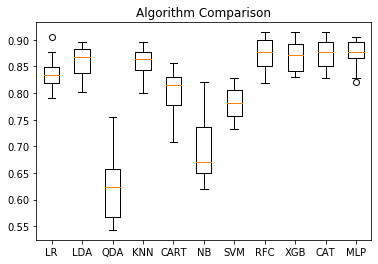

In [175]:
scaler = MinMaxScaler()
X_minimized = scaler.fit_transform(X)
results = select_model(X_minimized, y, seed)
results = [results[i].mean() for i in range(len(results))]
results.append("Min")
results_to_plot.append(results)


Learning rate set to 0.010075
0:	learn: 0.6861217	total: 5.85ms	remaining: 5.84s
1:	learn: 0.6786137	total: 9.73ms	remaining: 4.86s
2:	learn: 0.6713243	total: 13.4ms	remaining: 4.47s
3:	learn: 0.6653835	total: 17.1ms	remaining: 4.26s
4:	learn: 0.6594080	total: 20.9ms	remaining: 4.16s
5:	learn: 0.6535037	total: 24.8ms	remaining: 4.1s
6:	learn: 0.6480607	total: 29.2ms	remaining: 4.14s
7:	learn: 0.6412731	total: 32.9ms	remaining: 4.08s
8:	learn: 0.6357433	total: 36.7ms	remaining: 4.04s
9:	learn: 0.6313888	total: 40.4ms	remaining: 4s
10:	learn: 0.6242730	total: 44.2ms	remaining: 3.98s
11:	learn: 0.6182727	total: 47.2ms	remaining: 3.89s
12:	learn: 0.6126391	total: 50.5ms	remaining: 3.83s
13:	learn: 0.6066519	total: 53.3ms	remaining: 3.76s
14:	learn: 0.6015619	total: 56.1ms	remaining: 3.68s
15:	learn: 0.5957689	total: 58.8ms	remaining: 3.62s
16:	learn: 0.5895960	total: 61.2ms	remaining: 3.54s
17:	learn: 0.5840484	total: 63.5ms	remaining: 3.46s
18:	learn: 0.5799883	total: 66.8ms	remaining: 3.

170:	learn: 0.3045917	total: 493ms	remaining: 2.39s
171:	learn: 0.3040338	total: 496ms	remaining: 2.39s
172:	learn: 0.3033221	total: 500ms	remaining: 2.39s
173:	learn: 0.3026159	total: 503ms	remaining: 2.39s
174:	learn: 0.3020315	total: 506ms	remaining: 2.39s
175:	learn: 0.3015109	total: 510ms	remaining: 2.39s
176:	learn: 0.3010702	total: 514ms	remaining: 2.39s
177:	learn: 0.3006426	total: 517ms	remaining: 2.39s
178:	learn: 0.3000003	total: 520ms	remaining: 2.38s
179:	learn: 0.2993362	total: 522ms	remaining: 2.38s
180:	learn: 0.2988130	total: 526ms	remaining: 2.38s
181:	learn: 0.2980420	total: 529ms	remaining: 2.38s
182:	learn: 0.2974167	total: 532ms	remaining: 2.37s
183:	learn: 0.2970077	total: 534ms	remaining: 2.37s
184:	learn: 0.2963412	total: 537ms	remaining: 2.36s
185:	learn: 0.2957832	total: 540ms	remaining: 2.36s
186:	learn: 0.2951261	total: 543ms	remaining: 2.36s
187:	learn: 0.2946104	total: 545ms	remaining: 2.35s
188:	learn: 0.2942434	total: 548ms	remaining: 2.35s
189:	learn: 

357:	learn: 0.2311662	total: 995ms	remaining: 1.78s
358:	learn: 0.2308965	total: 997ms	remaining: 1.78s
359:	learn: 0.2305877	total: 1s	remaining: 1.78s
360:	learn: 0.2303678	total: 1s	remaining: 1.78s
361:	learn: 0.2300348	total: 1.01s	remaining: 1.77s
362:	learn: 0.2297201	total: 1.01s	remaining: 1.77s
363:	learn: 0.2293307	total: 1.01s	remaining: 1.77s
364:	learn: 0.2291356	total: 1.02s	remaining: 1.77s
365:	learn: 0.2288102	total: 1.02s	remaining: 1.77s
366:	learn: 0.2285448	total: 1.02s	remaining: 1.76s
367:	learn: 0.2281965	total: 1.03s	remaining: 1.76s
368:	learn: 0.2277862	total: 1.03s	remaining: 1.76s
369:	learn: 0.2275525	total: 1.03s	remaining: 1.76s
370:	learn: 0.2271928	total: 1.03s	remaining: 1.75s
371:	learn: 0.2269436	total: 1.04s	remaining: 1.75s
372:	learn: 0.2267738	total: 1.04s	remaining: 1.75s
373:	learn: 0.2264085	total: 1.04s	remaining: 1.74s
374:	learn: 0.2261901	total: 1.04s	remaining: 1.74s
375:	learn: 0.2260363	total: 1.05s	remaining: 1.74s
376:	learn: 0.2258

554:	learn: 0.1881351	total: 1.5s	remaining: 1.2s
555:	learn: 0.1878338	total: 1.5s	remaining: 1.2s
556:	learn: 0.1877648	total: 1.5s	remaining: 1.2s
557:	learn: 0.1875101	total: 1.51s	remaining: 1.19s
558:	learn: 0.1872112	total: 1.51s	remaining: 1.19s
559:	learn: 0.1870773	total: 1.51s	remaining: 1.19s
560:	learn: 0.1869363	total: 1.52s	remaining: 1.19s
561:	learn: 0.1867026	total: 1.52s	remaining: 1.18s
562:	learn: 0.1864803	total: 1.52s	remaining: 1.18s
563:	learn: 0.1863980	total: 1.52s	remaining: 1.18s
564:	learn: 0.1862282	total: 1.53s	remaining: 1.18s
565:	learn: 0.1859365	total: 1.53s	remaining: 1.17s
566:	learn: 0.1858955	total: 1.53s	remaining: 1.17s
567:	learn: 0.1855345	total: 1.53s	remaining: 1.17s
568:	learn: 0.1853198	total: 1.54s	remaining: 1.16s
569:	learn: 0.1850482	total: 1.54s	remaining: 1.16s
570:	learn: 0.1847473	total: 1.54s	remaining: 1.16s
571:	learn: 0.1843422	total: 1.54s	remaining: 1.16s
572:	learn: 0.1841170	total: 1.55s	remaining: 1.15s
573:	learn: 0.1839

752:	learn: 0.1534035	total: 2s	remaining: 657ms
753:	learn: 0.1532677	total: 2s	remaining: 654ms
754:	learn: 0.1529985	total: 2.01s	remaining: 651ms
755:	learn: 0.1529068	total: 2.01s	remaining: 649ms
756:	learn: 0.1527703	total: 2.01s	remaining: 646ms
757:	learn: 0.1525971	total: 2.02s	remaining: 644ms
758:	learn: 0.1524417	total: 2.02s	remaining: 641ms
759:	learn: 0.1523464	total: 2.02s	remaining: 638ms
760:	learn: 0.1522026	total: 2.02s	remaining: 636ms
761:	learn: 0.1521786	total: 2.03s	remaining: 633ms
762:	learn: 0.1520059	total: 2.03s	remaining: 630ms
763:	learn: 0.1518317	total: 2.03s	remaining: 628ms
764:	learn: 0.1516980	total: 2.03s	remaining: 625ms
765:	learn: 0.1515500	total: 2.04s	remaining: 622ms
766:	learn: 0.1513836	total: 2.04s	remaining: 619ms
767:	learn: 0.1512941	total: 2.04s	remaining: 617ms
768:	learn: 0.1511217	total: 2.04s	remaining: 614ms
769:	learn: 0.1509268	total: 2.05s	remaining: 611ms
770:	learn: 0.1508006	total: 2.05s	remaining: 608ms
771:	learn: 0.1505

956:	learn: 0.1239064	total: 2.51s	remaining: 113ms
957:	learn: 0.1237921	total: 2.51s	remaining: 110ms
958:	learn: 0.1236552	total: 2.51s	remaining: 107ms
959:	learn: 0.1235964	total: 2.52s	remaining: 105ms
960:	learn: 0.1234693	total: 2.52s	remaining: 102ms
961:	learn: 0.1233354	total: 2.52s	remaining: 99.7ms
962:	learn: 0.1232922	total: 2.52s	remaining: 97ms
963:	learn: 0.1231973	total: 2.53s	remaining: 94.4ms
964:	learn: 0.1230263	total: 2.53s	remaining: 91.8ms
965:	learn: 0.1229102	total: 2.53s	remaining: 89.1ms
966:	learn: 0.1228567	total: 2.53s	remaining: 86.5ms
967:	learn: 0.1227670	total: 2.54s	remaining: 83.9ms
968:	learn: 0.1226775	total: 2.54s	remaining: 81.3ms
969:	learn: 0.1226019	total: 2.54s	remaining: 78.6ms
970:	learn: 0.1223982	total: 2.54s	remaining: 76ms
971:	learn: 0.1223257	total: 2.55s	remaining: 73.4ms
972:	learn: 0.1222606	total: 2.55s	remaining: 70.8ms
973:	learn: 0.1220499	total: 2.55s	remaining: 68.1ms
974:	learn: 0.1218316	total: 2.56s	remaining: 65.5ms
97

136:	learn: 0.3295174	total: 344ms	remaining: 2.16s
137:	learn: 0.3287138	total: 347ms	remaining: 2.16s
138:	learn: 0.3280453	total: 349ms	remaining: 2.16s
139:	learn: 0.3273306	total: 352ms	remaining: 2.16s
140:	learn: 0.3266486	total: 355ms	remaining: 2.16s
141:	learn: 0.3258747	total: 358ms	remaining: 2.16s
142:	learn: 0.3253211	total: 360ms	remaining: 2.16s
143:	learn: 0.3242969	total: 363ms	remaining: 2.16s
144:	learn: 0.3236306	total: 365ms	remaining: 2.15s
145:	learn: 0.3230111	total: 368ms	remaining: 2.15s
146:	learn: 0.3224150	total: 371ms	remaining: 2.15s
147:	learn: 0.3218583	total: 373ms	remaining: 2.15s
148:	learn: 0.3210492	total: 376ms	remaining: 2.15s
149:	learn: 0.3204361	total: 379ms	remaining: 2.15s
150:	learn: 0.3196862	total: 382ms	remaining: 2.15s
151:	learn: 0.3188672	total: 384ms	remaining: 2.14s
152:	learn: 0.3180032	total: 387ms	remaining: 2.14s
153:	learn: 0.3175912	total: 390ms	remaining: 2.14s
154:	learn: 0.3167872	total: 392ms	remaining: 2.14s
155:	learn: 

336:	learn: 0.2351478	total: 848ms	remaining: 1.67s
337:	learn: 0.2348718	total: 851ms	remaining: 1.67s
338:	learn: 0.2346061	total: 854ms	remaining: 1.66s
339:	learn: 0.2343107	total: 857ms	remaining: 1.66s
340:	learn: 0.2337553	total: 860ms	remaining: 1.66s
341:	learn: 0.2334660	total: 863ms	remaining: 1.66s
342:	learn: 0.2332200	total: 866ms	remaining: 1.66s
343:	learn: 0.2328525	total: 868ms	remaining: 1.66s
344:	learn: 0.2325248	total: 871ms	remaining: 1.65s
345:	learn: 0.2322973	total: 874ms	remaining: 1.65s
346:	learn: 0.2317601	total: 876ms	remaining: 1.65s
347:	learn: 0.2314670	total: 878ms	remaining: 1.65s
348:	learn: 0.2312901	total: 881ms	remaining: 1.64s
349:	learn: 0.2309505	total: 883ms	remaining: 1.64s
350:	learn: 0.2306896	total: 886ms	remaining: 1.64s
351:	learn: 0.2303414	total: 888ms	remaining: 1.64s
352:	learn: 0.2300582	total: 891ms	remaining: 1.63s
353:	learn: 0.2297629	total: 893ms	remaining: 1.63s
354:	learn: 0.2295037	total: 896ms	remaining: 1.63s
355:	learn: 

538:	learn: 0.1894449	total: 1.35s	remaining: 1.16s
539:	learn: 0.1892745	total: 1.36s	remaining: 1.16s
540:	learn: 0.1891599	total: 1.36s	remaining: 1.15s
541:	learn: 0.1890759	total: 1.36s	remaining: 1.15s
542:	learn: 0.1888679	total: 1.37s	remaining: 1.15s
543:	learn: 0.1885905	total: 1.37s	remaining: 1.15s
544:	learn: 0.1882904	total: 1.37s	remaining: 1.15s
545:	learn: 0.1880338	total: 1.38s	remaining: 1.14s
546:	learn: 0.1878966	total: 1.38s	remaining: 1.14s
547:	learn: 0.1877713	total: 1.38s	remaining: 1.14s
548:	learn: 0.1875706	total: 1.39s	remaining: 1.14s
549:	learn: 0.1874166	total: 1.39s	remaining: 1.14s
550:	learn: 0.1870853	total: 1.39s	remaining: 1.13s
551:	learn: 0.1868132	total: 1.39s	remaining: 1.13s
552:	learn: 0.1866395	total: 1.4s	remaining: 1.13s
553:	learn: 0.1864225	total: 1.4s	remaining: 1.13s
554:	learn: 0.1862554	total: 1.4s	remaining: 1.12s
555:	learn: 0.1860167	total: 1.4s	remaining: 1.12s
556:	learn: 0.1857785	total: 1.41s	remaining: 1.12s
557:	learn: 0.18

739:	learn: 0.1549818	total: 1.86s	remaining: 653ms
740:	learn: 0.1549091	total: 1.86s	remaining: 651ms
741:	learn: 0.1548659	total: 1.86s	remaining: 649ms
742:	learn: 0.1547509	total: 1.87s	remaining: 646ms
743:	learn: 0.1546023	total: 1.87s	remaining: 644ms
744:	learn: 0.1543327	total: 1.87s	remaining: 642ms
745:	learn: 0.1542699	total: 1.88s	remaining: 639ms
746:	learn: 0.1540190	total: 1.88s	remaining: 636ms
747:	learn: 0.1538802	total: 1.88s	remaining: 634ms
748:	learn: 0.1536039	total: 1.88s	remaining: 631ms
749:	learn: 0.1535816	total: 1.89s	remaining: 629ms
750:	learn: 0.1534385	total: 1.89s	remaining: 626ms
751:	learn: 0.1532305	total: 1.89s	remaining: 624ms
752:	learn: 0.1530654	total: 1.89s	remaining: 621ms
753:	learn: 0.1528733	total: 1.9s	remaining: 619ms
754:	learn: 0.1527784	total: 1.9s	remaining: 616ms
755:	learn: 0.1526768	total: 1.9s	remaining: 614ms
756:	learn: 0.1526624	total: 1.9s	remaining: 611ms
757:	learn: 0.1524574	total: 1.91s	remaining: 609ms
758:	learn: 0.15

938:	learn: 0.1248280	total: 2.37s	remaining: 154ms
939:	learn: 0.1247833	total: 2.37s	remaining: 151ms
940:	learn: 0.1247328	total: 2.37s	remaining: 149ms
941:	learn: 0.1247186	total: 2.38s	remaining: 146ms
942:	learn: 0.1245048	total: 2.38s	remaining: 144ms
943:	learn: 0.1243497	total: 2.38s	remaining: 141ms
944:	learn: 0.1241962	total: 2.38s	remaining: 139ms
945:	learn: 0.1240735	total: 2.39s	remaining: 136ms
946:	learn: 0.1239358	total: 2.39s	remaining: 134ms
947:	learn: 0.1238186	total: 2.39s	remaining: 131ms
948:	learn: 0.1235701	total: 2.39s	remaining: 129ms
949:	learn: 0.1234714	total: 2.4s	remaining: 126ms
950:	learn: 0.1232975	total: 2.4s	remaining: 124ms
951:	learn: 0.1232075	total: 2.4s	remaining: 121ms
952:	learn: 0.1230063	total: 2.41s	remaining: 119ms
953:	learn: 0.1228600	total: 2.41s	remaining: 116ms
954:	learn: 0.1227382	total: 2.41s	remaining: 114ms
955:	learn: 0.1224892	total: 2.41s	remaining: 111ms
956:	learn: 0.1224735	total: 2.42s	remaining: 109ms
957:	learn: 0.1

134:	learn: 0.3278649	total: 333ms	remaining: 2.13s
135:	learn: 0.3270598	total: 336ms	remaining: 2.13s
136:	learn: 0.3260772	total: 339ms	remaining: 2.13s
137:	learn: 0.3250311	total: 342ms	remaining: 2.14s
138:	learn: 0.3244726	total: 345ms	remaining: 2.14s
139:	learn: 0.3237081	total: 348ms	remaining: 2.14s
140:	learn: 0.3229868	total: 351ms	remaining: 2.13s
141:	learn: 0.3222158	total: 353ms	remaining: 2.13s
142:	learn: 0.3214195	total: 356ms	remaining: 2.13s
143:	learn: 0.3206416	total: 359ms	remaining: 2.13s
144:	learn: 0.3200004	total: 361ms	remaining: 2.13s
145:	learn: 0.3191961	total: 363ms	remaining: 2.13s
146:	learn: 0.3184659	total: 366ms	remaining: 2.12s
147:	learn: 0.3178545	total: 368ms	remaining: 2.12s
148:	learn: 0.3171348	total: 371ms	remaining: 2.12s
149:	learn: 0.3164190	total: 373ms	remaining: 2.12s
150:	learn: 0.3156602	total: 376ms	remaining: 2.11s
151:	learn: 0.3146905	total: 378ms	remaining: 2.11s
152:	learn: 0.3139835	total: 381ms	remaining: 2.11s
153:	learn: 

336:	learn: 0.2332870	total: 838ms	remaining: 1.65s
337:	learn: 0.2330726	total: 841ms	remaining: 1.65s
338:	learn: 0.2329690	total: 844ms	remaining: 1.65s
339:	learn: 0.2326290	total: 847ms	remaining: 1.64s
340:	learn: 0.2321311	total: 849ms	remaining: 1.64s
341:	learn: 0.2319360	total: 853ms	remaining: 1.64s
342:	learn: 0.2316221	total: 855ms	remaining: 1.64s
343:	learn: 0.2314277	total: 858ms	remaining: 1.64s
344:	learn: 0.2310998	total: 860ms	remaining: 1.63s
345:	learn: 0.2308650	total: 862ms	remaining: 1.63s
346:	learn: 0.2306815	total: 866ms	remaining: 1.63s
347:	learn: 0.2304384	total: 868ms	remaining: 1.63s
348:	learn: 0.2301727	total: 870ms	remaining: 1.62s
349:	learn: 0.2299703	total: 873ms	remaining: 1.62s
350:	learn: 0.2296225	total: 875ms	remaining: 1.62s
351:	learn: 0.2292566	total: 878ms	remaining: 1.61s
352:	learn: 0.2289805	total: 880ms	remaining: 1.61s
353:	learn: 0.2288022	total: 883ms	remaining: 1.61s
354:	learn: 0.2284948	total: 885ms	remaining: 1.61s
355:	learn: 

541:	learn: 0.1891637	total: 1.35s	remaining: 1.14s
542:	learn: 0.1888966	total: 1.35s	remaining: 1.14s
543:	learn: 0.1887171	total: 1.35s	remaining: 1.13s
544:	learn: 0.1885334	total: 1.35s	remaining: 1.13s
545:	learn: 0.1883155	total: 1.36s	remaining: 1.13s
546:	learn: 0.1881781	total: 1.36s	remaining: 1.13s
547:	learn: 0.1878512	total: 1.36s	remaining: 1.12s
548:	learn: 0.1876122	total: 1.37s	remaining: 1.12s
549:	learn: 0.1875726	total: 1.37s	remaining: 1.12s
550:	learn: 0.1873298	total: 1.37s	remaining: 1.12s
551:	learn: 0.1870473	total: 1.37s	remaining: 1.11s
552:	learn: 0.1869465	total: 1.38s	remaining: 1.11s
553:	learn: 0.1865916	total: 1.38s	remaining: 1.11s
554:	learn: 0.1863100	total: 1.38s	remaining: 1.11s
555:	learn: 0.1861840	total: 1.38s	remaining: 1.1s
556:	learn: 0.1859707	total: 1.39s	remaining: 1.1s
557:	learn: 0.1857249	total: 1.39s	remaining: 1.1s
558:	learn: 0.1856008	total: 1.39s	remaining: 1.1s
559:	learn: 0.1854649	total: 1.39s	remaining: 1.09s
560:	learn: 0.18

738:	learn: 0.1545591	total: 1.85s	remaining: 654ms
739:	learn: 0.1543134	total: 1.85s	remaining: 652ms
740:	learn: 0.1542005	total: 1.86s	remaining: 650ms
741:	learn: 0.1539755	total: 1.86s	remaining: 647ms
742:	learn: 0.1537227	total: 1.86s	remaining: 645ms
743:	learn: 0.1534691	total: 1.87s	remaining: 643ms
744:	learn: 0.1532795	total: 1.87s	remaining: 641ms
745:	learn: 0.1531784	total: 1.87s	remaining: 638ms
746:	learn: 0.1529868	total: 1.88s	remaining: 636ms
747:	learn: 0.1529584	total: 1.88s	remaining: 634ms
748:	learn: 0.1527938	total: 1.88s	remaining: 631ms
749:	learn: 0.1525449	total: 1.89s	remaining: 629ms
750:	learn: 0.1523190	total: 1.89s	remaining: 626ms
751:	learn: 0.1521844	total: 1.89s	remaining: 624ms
752:	learn: 0.1519045	total: 1.9s	remaining: 622ms
753:	learn: 0.1517108	total: 1.9s	remaining: 619ms
754:	learn: 0.1515400	total: 1.9s	remaining: 617ms
755:	learn: 0.1513739	total: 1.9s	remaining: 615ms
756:	learn: 0.1512294	total: 1.91s	remaining: 612ms
757:	learn: 0.15

929:	learn: 0.1262583	total: 2.36s	remaining: 178ms
930:	learn: 0.1261505	total: 2.36s	remaining: 175ms
931:	learn: 0.1259089	total: 2.37s	remaining: 173ms
932:	learn: 0.1258979	total: 2.37s	remaining: 170ms
933:	learn: 0.1257859	total: 2.37s	remaining: 168ms
934:	learn: 0.1257142	total: 2.37s	remaining: 165ms
935:	learn: 0.1255486	total: 2.38s	remaining: 162ms
936:	learn: 0.1254980	total: 2.38s	remaining: 160ms
937:	learn: 0.1253596	total: 2.38s	remaining: 157ms
938:	learn: 0.1252038	total: 2.38s	remaining: 155ms
939:	learn: 0.1250802	total: 2.39s	remaining: 152ms
940:	learn: 0.1250641	total: 2.39s	remaining: 150ms
941:	learn: 0.1249604	total: 2.39s	remaining: 147ms
942:	learn: 0.1248253	total: 2.4s	remaining: 145ms
943:	learn: 0.1246989	total: 2.4s	remaining: 142ms
944:	learn: 0.1244199	total: 2.4s	remaining: 140ms
945:	learn: 0.1242453	total: 2.4s	remaining: 137ms
946:	learn: 0.1241703	total: 2.41s	remaining: 135ms
947:	learn: 0.1240956	total: 2.41s	remaining: 132ms
948:	learn: 0.12

114:	learn: 0.3419031	total: 289ms	remaining: 2.22s
115:	learn: 0.3403592	total: 291ms	remaining: 2.22s
116:	learn: 0.3392595	total: 294ms	remaining: 2.22s
117:	learn: 0.3383660	total: 297ms	remaining: 2.22s
118:	learn: 0.3370940	total: 300ms	remaining: 2.22s
119:	learn: 0.3361469	total: 303ms	remaining: 2.22s
120:	learn: 0.3350340	total: 305ms	remaining: 2.22s
121:	learn: 0.3340203	total: 308ms	remaining: 2.21s
122:	learn: 0.3329802	total: 310ms	remaining: 2.21s
123:	learn: 0.3316774	total: 313ms	remaining: 2.21s
124:	learn: 0.3306436	total: 316ms	remaining: 2.21s
125:	learn: 0.3298789	total: 318ms	remaining: 2.21s
126:	learn: 0.3291100	total: 321ms	remaining: 2.2s
127:	learn: 0.3278426	total: 323ms	remaining: 2.2s
128:	learn: 0.3270493	total: 325ms	remaining: 2.2s
129:	learn: 0.3261349	total: 328ms	remaining: 2.19s
130:	learn: 0.3255873	total: 331ms	remaining: 2.19s
131:	learn: 0.3246287	total: 333ms	remaining: 2.19s
132:	learn: 0.3235219	total: 335ms	remaining: 2.19s
133:	learn: 0.3

312:	learn: 0.2344572	total: 794ms	remaining: 1.74s
313:	learn: 0.2339126	total: 797ms	remaining: 1.74s
314:	learn: 0.2336172	total: 800ms	remaining: 1.74s
315:	learn: 0.2333860	total: 803ms	remaining: 1.74s
316:	learn: 0.2332141	total: 805ms	remaining: 1.74s
317:	learn: 0.2328354	total: 809ms	remaining: 1.73s
318:	learn: 0.2324539	total: 811ms	remaining: 1.73s
319:	learn: 0.2321642	total: 813ms	remaining: 1.73s
320:	learn: 0.2318216	total: 816ms	remaining: 1.73s
321:	learn: 0.2314423	total: 818ms	remaining: 1.72s
322:	learn: 0.2313015	total: 821ms	remaining: 1.72s
323:	learn: 0.2310832	total: 824ms	remaining: 1.72s
324:	learn: 0.2307407	total: 826ms	remaining: 1.72s
325:	learn: 0.2304941	total: 829ms	remaining: 1.71s
326:	learn: 0.2301905	total: 831ms	remaining: 1.71s
327:	learn: 0.2298842	total: 834ms	remaining: 1.71s
328:	learn: 0.2296238	total: 836ms	remaining: 1.71s
329:	learn: 0.2294096	total: 839ms	remaining: 1.7s
330:	learn: 0.2291164	total: 841ms	remaining: 1.7s
331:	learn: 0.

514:	learn: 0.1876162	total: 1.3s	remaining: 1.22s
515:	learn: 0.1874597	total: 1.3s	remaining: 1.22s
516:	learn: 0.1873797	total: 1.3s	remaining: 1.22s
517:	learn: 0.1872163	total: 1.3s	remaining: 1.21s
518:	learn: 0.1870817	total: 1.31s	remaining: 1.21s
519:	learn: 0.1869425	total: 1.31s	remaining: 1.21s
520:	learn: 0.1868378	total: 1.31s	remaining: 1.21s
521:	learn: 0.1866491	total: 1.32s	remaining: 1.21s
522:	learn: 0.1864197	total: 1.32s	remaining: 1.2s
523:	learn: 0.1862591	total: 1.32s	remaining: 1.2s
524:	learn: 0.1859721	total: 1.32s	remaining: 1.2s
525:	learn: 0.1857304	total: 1.33s	remaining: 1.2s
526:	learn: 0.1855837	total: 1.33s	remaining: 1.19s
527:	learn: 0.1854989	total: 1.33s	remaining: 1.19s
528:	learn: 0.1852305	total: 1.33s	remaining: 1.19s
529:	learn: 0.1850524	total: 1.34s	remaining: 1.19s
530:	learn: 0.1848949	total: 1.34s	remaining: 1.18s
531:	learn: 0.1847033	total: 1.34s	remaining: 1.18s
532:	learn: 0.1845519	total: 1.34s	remaining: 1.18s
533:	learn: 0.184460

717:	learn: 0.1528210	total: 1.8s	remaining: 709ms
718:	learn: 0.1527904	total: 1.81s	remaining: 706ms
719:	learn: 0.1527025	total: 1.81s	remaining: 704ms
720:	learn: 0.1525447	total: 1.81s	remaining: 702ms
721:	learn: 0.1523640	total: 1.82s	remaining: 699ms
722:	learn: 0.1522704	total: 1.82s	remaining: 697ms
723:	learn: 0.1520663	total: 1.82s	remaining: 696ms
724:	learn: 0.1518701	total: 1.83s	remaining: 694ms
725:	learn: 0.1517256	total: 1.83s	remaining: 693ms
726:	learn: 0.1515489	total: 1.84s	remaining: 691ms
727:	learn: 0.1513599	total: 1.84s	remaining: 688ms
728:	learn: 0.1511990	total: 1.84s	remaining: 686ms
729:	learn: 0.1509432	total: 1.85s	remaining: 683ms
730:	learn: 0.1508026	total: 1.85s	remaining: 681ms
731:	learn: 0.1505897	total: 1.85s	remaining: 678ms
732:	learn: 0.1503377	total: 1.86s	remaining: 676ms
733:	learn: 0.1502496	total: 1.86s	remaining: 674ms
734:	learn: 0.1498616	total: 1.86s	remaining: 672ms
735:	learn: 0.1496462	total: 1.86s	remaining: 669ms
736:	learn: 0

913:	learn: 0.1246376	total: 2.31s	remaining: 217ms
914:	learn: 0.1245657	total: 2.31s	remaining: 215ms
915:	learn: 0.1243674	total: 2.31s	remaining: 212ms
916:	learn: 0.1243375	total: 2.31s	remaining: 210ms
917:	learn: 0.1242277	total: 2.32s	remaining: 207ms
918:	learn: 0.1241577	total: 2.32s	remaining: 205ms
919:	learn: 0.1239856	total: 2.32s	remaining: 202ms
920:	learn: 0.1238978	total: 2.33s	remaining: 200ms
921:	learn: 0.1236578	total: 2.33s	remaining: 197ms
922:	learn: 0.1235436	total: 2.33s	remaining: 195ms
923:	learn: 0.1235387	total: 2.33s	remaining: 192ms
924:	learn: 0.1234620	total: 2.33s	remaining: 189ms
925:	learn: 0.1233001	total: 2.34s	remaining: 187ms
926:	learn: 0.1231706	total: 2.34s	remaining: 184ms
927:	learn: 0.1230916	total: 2.34s	remaining: 182ms
928:	learn: 0.1229445	total: 2.35s	remaining: 179ms
929:	learn: 0.1227744	total: 2.35s	remaining: 177ms
930:	learn: 0.1226803	total: 2.35s	remaining: 174ms
931:	learn: 0.1226073	total: 2.35s	remaining: 172ms
932:	learn: 

98:	learn: 0.3770668	total: 249ms	remaining: 2.27s
99:	learn: 0.3752223	total: 252ms	remaining: 2.27s
100:	learn: 0.3739255	total: 255ms	remaining: 2.27s
101:	learn: 0.3725679	total: 258ms	remaining: 2.27s
102:	learn: 0.3713304	total: 261ms	remaining: 2.27s
103:	learn: 0.3702577	total: 265ms	remaining: 2.28s
104:	learn: 0.3690783	total: 267ms	remaining: 2.28s
105:	learn: 0.3680977	total: 270ms	remaining: 2.27s
106:	learn: 0.3668912	total: 272ms	remaining: 2.27s
107:	learn: 0.3655840	total: 275ms	remaining: 2.27s
108:	learn: 0.3642896	total: 277ms	remaining: 2.27s
109:	learn: 0.3629765	total: 280ms	remaining: 2.26s
110:	learn: 0.3619208	total: 282ms	remaining: 2.26s
111:	learn: 0.3606681	total: 285ms	remaining: 2.26s
112:	learn: 0.3594393	total: 287ms	remaining: 2.25s
113:	learn: 0.3584707	total: 290ms	remaining: 2.25s
114:	learn: 0.3576784	total: 292ms	remaining: 2.25s
115:	learn: 0.3567183	total: 295ms	remaining: 2.25s
116:	learn: 0.3554327	total: 298ms	remaining: 2.25s
117:	learn: 0.

298:	learn: 0.2506658	total: 754ms	remaining: 1.77s
299:	learn: 0.2503440	total: 757ms	remaining: 1.77s
300:	learn: 0.2499757	total: 760ms	remaining: 1.76s
301:	learn: 0.2497527	total: 763ms	remaining: 1.76s
302:	learn: 0.2493660	total: 766ms	remaining: 1.76s
303:	learn: 0.2488867	total: 768ms	remaining: 1.76s
304:	learn: 0.2487486	total: 772ms	remaining: 1.76s
305:	learn: 0.2485581	total: 774ms	remaining: 1.75s
306:	learn: 0.2482340	total: 776ms	remaining: 1.75s
307:	learn: 0.2477573	total: 779ms	remaining: 1.75s
308:	learn: 0.2473189	total: 781ms	remaining: 1.75s
309:	learn: 0.2469307	total: 784ms	remaining: 1.74s
310:	learn: 0.2466756	total: 787ms	remaining: 1.74s
311:	learn: 0.2464776	total: 789ms	remaining: 1.74s
312:	learn: 0.2460277	total: 791ms	remaining: 1.74s
313:	learn: 0.2458723	total: 794ms	remaining: 1.73s
314:	learn: 0.2455596	total: 796ms	remaining: 1.73s
315:	learn: 0.2452662	total: 799ms	remaining: 1.73s
316:	learn: 0.2449951	total: 801ms	remaining: 1.73s
317:	learn: 

499:	learn: 0.2028664	total: 1.26s	remaining: 1.26s
500:	learn: 0.2027326	total: 1.26s	remaining: 1.26s
501:	learn: 0.2025822	total: 1.26s	remaining: 1.25s
502:	learn: 0.2024205	total: 1.27s	remaining: 1.25s
503:	learn: 0.2022215	total: 1.27s	remaining: 1.25s
504:	learn: 0.2019097	total: 1.27s	remaining: 1.25s
505:	learn: 0.2018060	total: 1.28s	remaining: 1.25s
506:	learn: 0.2017527	total: 1.28s	remaining: 1.24s
507:	learn: 0.2017387	total: 1.28s	remaining: 1.24s
508:	learn: 0.2015144	total: 1.28s	remaining: 1.24s
509:	learn: 0.2013822	total: 1.29s	remaining: 1.24s
510:	learn: 0.2013094	total: 1.29s	remaining: 1.23s
511:	learn: 0.2009890	total: 1.29s	remaining: 1.23s
512:	learn: 0.2008245	total: 1.29s	remaining: 1.23s
513:	learn: 0.2006432	total: 1.3s	remaining: 1.23s
514:	learn: 0.2002595	total: 1.3s	remaining: 1.22s
515:	learn: 0.2000538	total: 1.3s	remaining: 1.22s
516:	learn: 0.1998230	total: 1.3s	remaining: 1.22s
517:	learn: 0.1997183	total: 1.31s	remaining: 1.22s
518:	learn: 0.19

700:	learn: 0.1664040	total: 1.76s	remaining: 753ms
701:	learn: 0.1662114	total: 1.77s	remaining: 750ms
702:	learn: 0.1659969	total: 1.77s	remaining: 748ms
703:	learn: 0.1658461	total: 1.77s	remaining: 746ms
704:	learn: 0.1656327	total: 1.78s	remaining: 743ms
705:	learn: 0.1655640	total: 1.78s	remaining: 741ms
706:	learn: 0.1653754	total: 1.78s	remaining: 739ms
707:	learn: 0.1652748	total: 1.78s	remaining: 736ms
708:	learn: 0.1650380	total: 1.79s	remaining: 734ms
709:	learn: 0.1646148	total: 1.79s	remaining: 731ms
710:	learn: 0.1644252	total: 1.79s	remaining: 729ms
711:	learn: 0.1642308	total: 1.79s	remaining: 726ms
712:	learn: 0.1640920	total: 1.8s	remaining: 724ms
713:	learn: 0.1639886	total: 1.8s	remaining: 721ms
714:	learn: 0.1638527	total: 1.8s	remaining: 718ms
715:	learn: 0.1637412	total: 1.8s	remaining: 716ms
716:	learn: 0.1636953	total: 1.81s	remaining: 713ms
717:	learn: 0.1634994	total: 1.81s	remaining: 711ms
718:	learn: 0.1634113	total: 1.81s	remaining: 708ms
719:	learn: 0.16

904:	learn: 0.1348128	total: 2.27s	remaining: 238ms
905:	learn: 0.1346374	total: 2.27s	remaining: 236ms
906:	learn: 0.1344781	total: 2.28s	remaining: 233ms
907:	learn: 0.1343046	total: 2.28s	remaining: 231ms
908:	learn: 0.1342478	total: 2.28s	remaining: 229ms
909:	learn: 0.1341364	total: 2.29s	remaining: 226ms
910:	learn: 0.1340322	total: 2.29s	remaining: 224ms
911:	learn: 0.1340192	total: 2.29s	remaining: 221ms
912:	learn: 0.1339857	total: 2.29s	remaining: 219ms
913:	learn: 0.1339410	total: 2.3s	remaining: 216ms
914:	learn: 0.1337122	total: 2.3s	remaining: 214ms
915:	learn: 0.1335593	total: 2.3s	remaining: 211ms
916:	learn: 0.1334115	total: 2.3s	remaining: 209ms
917:	learn: 0.1333722	total: 2.31s	remaining: 206ms
918:	learn: 0.1331176	total: 2.31s	remaining: 204ms
919:	learn: 0.1329628	total: 2.31s	remaining: 201ms
920:	learn: 0.1328505	total: 2.31s	remaining: 199ms
921:	learn: 0.1325956	total: 2.32s	remaining: 196ms
922:	learn: 0.1323323	total: 2.32s	remaining: 193ms
923:	learn: 0.13

83:	learn: 0.3863313	total: 219ms	remaining: 2.38s
84:	learn: 0.3850050	total: 222ms	remaining: 2.39s
85:	learn: 0.3831854	total: 225ms	remaining: 2.39s
86:	learn: 0.3818376	total: 227ms	remaining: 2.39s
87:	learn: 0.3803281	total: 231ms	remaining: 2.39s
88:	learn: 0.3783375	total: 233ms	remaining: 2.38s
89:	learn: 0.3771318	total: 236ms	remaining: 2.38s
90:	learn: 0.3758141	total: 238ms	remaining: 2.38s
91:	learn: 0.3745121	total: 240ms	remaining: 2.37s
92:	learn: 0.3732090	total: 243ms	remaining: 2.37s
93:	learn: 0.3715829	total: 245ms	remaining: 2.36s
94:	learn: 0.3702684	total: 248ms	remaining: 2.36s
95:	learn: 0.3689349	total: 250ms	remaining: 2.35s
96:	learn: 0.3672890	total: 253ms	remaining: 2.35s
97:	learn: 0.3660582	total: 255ms	remaining: 2.35s
98:	learn: 0.3646669	total: 257ms	remaining: 2.34s
99:	learn: 0.3635927	total: 260ms	remaining: 2.34s
100:	learn: 0.3622828	total: 262ms	remaining: 2.33s
101:	learn: 0.3605119	total: 265ms	remaining: 2.33s
102:	learn: 0.3594134	total: 

285:	learn: 0.2464720	total: 721ms	remaining: 1.8s
286:	learn: 0.2462389	total: 724ms	remaining: 1.8s
287:	learn: 0.2459398	total: 727ms	remaining: 1.8s
288:	learn: 0.2455004	total: 729ms	remaining: 1.79s
289:	learn: 0.2451627	total: 732ms	remaining: 1.79s
290:	learn: 0.2447354	total: 735ms	remaining: 1.79s
291:	learn: 0.2442089	total: 738ms	remaining: 1.79s
292:	learn: 0.2439783	total: 741ms	remaining: 1.79s
293:	learn: 0.2436102	total: 743ms	remaining: 1.78s
294:	learn: 0.2433535	total: 747ms	remaining: 1.78s
295:	learn: 0.2429475	total: 749ms	remaining: 1.78s
296:	learn: 0.2427542	total: 752ms	remaining: 1.78s
297:	learn: 0.2423073	total: 754ms	remaining: 1.78s
298:	learn: 0.2420028	total: 757ms	remaining: 1.77s
299:	learn: 0.2414844	total: 759ms	remaining: 1.77s
300:	learn: 0.2410692	total: 761ms	remaining: 1.77s
301:	learn: 0.2407212	total: 764ms	remaining: 1.76s
302:	learn: 0.2404106	total: 767ms	remaining: 1.76s
303:	learn: 0.2401406	total: 769ms	remaining: 1.76s
304:	learn: 0.2

488:	learn: 0.1932375	total: 1.23s	remaining: 1.28s
489:	learn: 0.1930794	total: 1.23s	remaining: 1.28s
490:	learn: 0.1927534	total: 1.23s	remaining: 1.28s
491:	learn: 0.1926435	total: 1.24s	remaining: 1.27s
492:	learn: 0.1925363	total: 1.24s	remaining: 1.27s
493:	learn: 0.1924705	total: 1.24s	remaining: 1.27s
494:	learn: 0.1921955	total: 1.24s	remaining: 1.27s
495:	learn: 0.1919298	total: 1.25s	remaining: 1.27s
496:	learn: 0.1917202	total: 1.25s	remaining: 1.26s
497:	learn: 0.1915395	total: 1.25s	remaining: 1.26s
498:	learn: 0.1914159	total: 1.25s	remaining: 1.26s
499:	learn: 0.1912606	total: 1.26s	remaining: 1.26s
500:	learn: 0.1910539	total: 1.26s	remaining: 1.25s
501:	learn: 0.1908705	total: 1.26s	remaining: 1.25s
502:	learn: 0.1907091	total: 1.26s	remaining: 1.25s
503:	learn: 0.1905781	total: 1.27s	remaining: 1.25s
504:	learn: 0.1904102	total: 1.27s	remaining: 1.24s
505:	learn: 0.1902118	total: 1.27s	remaining: 1.24s
506:	learn: 0.1900328	total: 1.27s	remaining: 1.24s
507:	learn: 

692:	learn: 0.1557553	total: 1.74s	remaining: 769ms
693:	learn: 0.1556049	total: 1.74s	remaining: 766ms
694:	learn: 0.1554387	total: 1.74s	remaining: 764ms
695:	learn: 0.1552735	total: 1.74s	remaining: 762ms
696:	learn: 0.1551937	total: 1.75s	remaining: 759ms
697:	learn: 0.1550637	total: 1.75s	remaining: 757ms
698:	learn: 0.1549180	total: 1.75s	remaining: 755ms
699:	learn: 0.1547873	total: 1.75s	remaining: 752ms
700:	learn: 0.1547134	total: 1.76s	remaining: 750ms
701:	learn: 0.1544799	total: 1.76s	remaining: 748ms
702:	learn: 0.1541722	total: 1.76s	remaining: 745ms
703:	learn: 0.1539118	total: 1.77s	remaining: 743ms
704:	learn: 0.1537739	total: 1.77s	remaining: 740ms
705:	learn: 0.1536617	total: 1.77s	remaining: 738ms
706:	learn: 0.1534321	total: 1.77s	remaining: 735ms
707:	learn: 0.1533172	total: 1.78s	remaining: 733ms
708:	learn: 0.1530722	total: 1.78s	remaining: 730ms
709:	learn: 0.1529139	total: 1.78s	remaining: 728ms
710:	learn: 0.1527065	total: 1.78s	remaining: 725ms
711:	learn: 

893:	learn: 0.1227469	total: 2.24s	remaining: 266ms
894:	learn: 0.1225696	total: 2.24s	remaining: 263ms
895:	learn: 0.1225091	total: 2.25s	remaining: 261ms
896:	learn: 0.1224376	total: 2.25s	remaining: 258ms
897:	learn: 0.1222940	total: 2.25s	remaining: 256ms
898:	learn: 0.1222595	total: 2.25s	remaining: 253ms
899:	learn: 0.1222291	total: 2.26s	remaining: 251ms
900:	learn: 0.1220942	total: 2.26s	remaining: 248ms
901:	learn: 0.1218366	total: 2.26s	remaining: 246ms
902:	learn: 0.1216942	total: 2.26s	remaining: 243ms
903:	learn: 0.1215210	total: 2.27s	remaining: 241ms
904:	learn: 0.1213270	total: 2.27s	remaining: 238ms
905:	learn: 0.1212265	total: 2.27s	remaining: 236ms
906:	learn: 0.1211457	total: 2.27s	remaining: 233ms
907:	learn: 0.1210774	total: 2.28s	remaining: 231ms
908:	learn: 0.1210314	total: 2.28s	remaining: 228ms
909:	learn: 0.1209017	total: 2.28s	remaining: 226ms
910:	learn: 0.1207324	total: 2.29s	remaining: 223ms
911:	learn: 0.1206251	total: 2.29s	remaining: 221ms
912:	learn: 

78:	learn: 0.4018349	total: 198ms	remaining: 2.31s
79:	learn: 0.4002199	total: 201ms	remaining: 2.31s
80:	learn: 0.3986542	total: 203ms	remaining: 2.31s
81:	learn: 0.3971254	total: 207ms	remaining: 2.31s
82:	learn: 0.3956593	total: 210ms	remaining: 2.31s
83:	learn: 0.3938310	total: 212ms	remaining: 2.31s
84:	learn: 0.3923748	total: 216ms	remaining: 2.32s
85:	learn: 0.3909358	total: 218ms	remaining: 2.32s
86:	learn: 0.3895468	total: 220ms	remaining: 2.31s
87:	learn: 0.3878245	total: 223ms	remaining: 2.31s
88:	learn: 0.3859864	total: 227ms	remaining: 2.32s
89:	learn: 0.3846136	total: 230ms	remaining: 2.32s
90:	learn: 0.3834281	total: 233ms	remaining: 2.33s
91:	learn: 0.3824277	total: 236ms	remaining: 2.33s
92:	learn: 0.3808637	total: 239ms	remaining: 2.33s
93:	learn: 0.3793191	total: 242ms	remaining: 2.33s
94:	learn: 0.3781459	total: 245ms	remaining: 2.33s
95:	learn: 0.3769847	total: 247ms	remaining: 2.33s
96:	learn: 0.3754920	total: 250ms	remaining: 2.32s
97:	learn: 0.3744585	total: 252

267:	learn: 0.2646140	total: 698ms	remaining: 1.91s
268:	learn: 0.2643527	total: 701ms	remaining: 1.91s
269:	learn: 0.2640004	total: 704ms	remaining: 1.9s
270:	learn: 0.2635014	total: 710ms	remaining: 1.91s
271:	learn: 0.2633118	total: 713ms	remaining: 1.91s
272:	learn: 0.2630852	total: 716ms	remaining: 1.91s
273:	learn: 0.2626887	total: 719ms	remaining: 1.91s
274:	learn: 0.2624630	total: 722ms	remaining: 1.9s
275:	learn: 0.2620854	total: 725ms	remaining: 1.9s
276:	learn: 0.2617638	total: 728ms	remaining: 1.9s
277:	learn: 0.2614752	total: 731ms	remaining: 1.9s
278:	learn: 0.2610919	total: 734ms	remaining: 1.9s
279:	learn: 0.2607862	total: 736ms	remaining: 1.89s
280:	learn: 0.2604809	total: 739ms	remaining: 1.89s
281:	learn: 0.2597762	total: 742ms	remaining: 1.89s
282:	learn: 0.2594125	total: 745ms	remaining: 1.89s
283:	learn: 0.2592119	total: 747ms	remaining: 1.88s
284:	learn: 0.2589154	total: 750ms	remaining: 1.88s
285:	learn: 0.2587465	total: 753ms	remaining: 1.88s
286:	learn: 0.2584

457:	learn: 0.2134478	total: 1.2s	remaining: 1.43s
458:	learn: 0.2131716	total: 1.21s	remaining: 1.42s
459:	learn: 0.2129941	total: 1.21s	remaining: 1.42s
460:	learn: 0.2128641	total: 1.21s	remaining: 1.42s
461:	learn: 0.2126730	total: 1.22s	remaining: 1.42s
462:	learn: 0.2124213	total: 1.22s	remaining: 1.41s
463:	learn: 0.2123270	total: 1.22s	remaining: 1.41s
464:	learn: 0.2122005	total: 1.22s	remaining: 1.41s
465:	learn: 0.2119938	total: 1.23s	remaining: 1.41s
466:	learn: 0.2118602	total: 1.23s	remaining: 1.4s
467:	learn: 0.2116007	total: 1.23s	remaining: 1.4s
468:	learn: 0.2114390	total: 1.23s	remaining: 1.4s
469:	learn: 0.2110885	total: 1.24s	remaining: 1.39s
470:	learn: 0.2109594	total: 1.24s	remaining: 1.39s
471:	learn: 0.2107583	total: 1.24s	remaining: 1.39s
472:	learn: 0.2107122	total: 1.24s	remaining: 1.39s
473:	learn: 0.2104896	total: 1.25s	remaining: 1.38s
474:	learn: 0.2103658	total: 1.25s	remaining: 1.38s
475:	learn: 0.2102314	total: 1.25s	remaining: 1.38s
476:	learn: 0.21

658:	learn: 0.1784077	total: 1.71s	remaining: 885ms
659:	learn: 0.1782354	total: 1.71s	remaining: 882ms
660:	learn: 0.1781093	total: 1.72s	remaining: 880ms
661:	learn: 0.1779157	total: 1.72s	remaining: 877ms
662:	learn: 0.1776998	total: 1.72s	remaining: 875ms
663:	learn: 0.1775660	total: 1.72s	remaining: 873ms
664:	learn: 0.1773664	total: 1.73s	remaining: 870ms
665:	learn: 0.1771441	total: 1.73s	remaining: 867ms
666:	learn: 0.1769104	total: 1.73s	remaining: 865ms
667:	learn: 0.1767794	total: 1.74s	remaining: 862ms
668:	learn: 0.1765179	total: 1.74s	remaining: 860ms
669:	learn: 0.1763324	total: 1.74s	remaining: 857ms
670:	learn: 0.1761348	total: 1.74s	remaining: 854ms
671:	learn: 0.1759557	total: 1.74s	remaining: 852ms
672:	learn: 0.1758453	total: 1.75s	remaining: 849ms
673:	learn: 0.1756916	total: 1.75s	remaining: 847ms
674:	learn: 0.1754600	total: 1.75s	remaining: 844ms
675:	learn: 0.1752708	total: 1.76s	remaining: 842ms
676:	learn: 0.1751148	total: 1.76s	remaining: 839ms
677:	learn: 

859:	learn: 0.1471281	total: 2.21s	remaining: 361ms
860:	learn: 0.1470170	total: 2.22s	remaining: 358ms
861:	learn: 0.1469232	total: 2.22s	remaining: 356ms
862:	learn: 0.1467773	total: 2.22s	remaining: 353ms
863:	learn: 0.1466997	total: 2.23s	remaining: 350ms
864:	learn: 0.1466196	total: 2.23s	remaining: 348ms
865:	learn: 0.1465117	total: 2.23s	remaining: 346ms
866:	learn: 0.1464395	total: 2.23s	remaining: 343ms
867:	learn: 0.1463952	total: 2.24s	remaining: 340ms
868:	learn: 0.1462262	total: 2.24s	remaining: 338ms
869:	learn: 0.1460846	total: 2.24s	remaining: 335ms
870:	learn: 0.1458890	total: 2.25s	remaining: 333ms
871:	learn: 0.1458585	total: 2.25s	remaining: 330ms
872:	learn: 0.1457122	total: 2.25s	remaining: 327ms
873:	learn: 0.1456502	total: 2.25s	remaining: 325ms
874:	learn: 0.1455701	total: 2.25s	remaining: 322ms
875:	learn: 0.1454661	total: 2.26s	remaining: 320ms
876:	learn: 0.1453513	total: 2.26s	remaining: 317ms
877:	learn: 0.1451915	total: 2.26s	remaining: 314ms
878:	learn: 

39:	learn: 0.4963348	total: 102ms	remaining: 2.44s
40:	learn: 0.4934954	total: 105ms	remaining: 2.45s
41:	learn: 0.4896023	total: 107ms	remaining: 2.45s
42:	learn: 0.4861716	total: 110ms	remaining: 2.45s
43:	learn: 0.4834170	total: 113ms	remaining: 2.45s
44:	learn: 0.4805282	total: 116ms	remaining: 2.45s
45:	learn: 0.4778400	total: 118ms	remaining: 2.45s
46:	learn: 0.4751101	total: 121ms	remaining: 2.45s
47:	learn: 0.4725931	total: 123ms	remaining: 2.44s
48:	learn: 0.4700800	total: 126ms	remaining: 2.44s
49:	learn: 0.4678130	total: 128ms	remaining: 2.43s
50:	learn: 0.4657712	total: 130ms	remaining: 2.42s
51:	learn: 0.4631061	total: 133ms	remaining: 2.43s
52:	learn: 0.4604331	total: 136ms	remaining: 2.42s
53:	learn: 0.4577941	total: 138ms	remaining: 2.42s
54:	learn: 0.4553435	total: 140ms	remaining: 2.41s
55:	learn: 0.4524776	total: 143ms	remaining: 2.41s
56:	learn: 0.4499976	total: 145ms	remaining: 2.4s
57:	learn: 0.4474324	total: 148ms	remaining: 2.41s
58:	learn: 0.4449996	total: 151m

241:	learn: 0.2755745	total: 606ms	remaining: 1.9s
242:	learn: 0.2752838	total: 609ms	remaining: 1.9s
243:	learn: 0.2750361	total: 612ms	remaining: 1.89s
244:	learn: 0.2746019	total: 614ms	remaining: 1.89s
245:	learn: 0.2739562	total: 617ms	remaining: 1.89s
246:	learn: 0.2736007	total: 621ms	remaining: 1.89s
247:	learn: 0.2732515	total: 623ms	remaining: 1.89s
248:	learn: 0.2728334	total: 626ms	remaining: 1.89s
249:	learn: 0.2724432	total: 628ms	remaining: 1.89s
250:	learn: 0.2719323	total: 631ms	remaining: 1.88s
251:	learn: 0.2715170	total: 633ms	remaining: 1.88s
252:	learn: 0.2712144	total: 636ms	remaining: 1.88s
253:	learn: 0.2708209	total: 638ms	remaining: 1.87s
254:	learn: 0.2704697	total: 641ms	remaining: 1.87s
255:	learn: 0.2701287	total: 643ms	remaining: 1.87s
256:	learn: 0.2698381	total: 646ms	remaining: 1.87s
257:	learn: 0.2694737	total: 648ms	remaining: 1.86s
258:	learn: 0.2690937	total: 650ms	remaining: 1.86s
259:	learn: 0.2687354	total: 653ms	remaining: 1.86s
260:	learn: 0.

442:	learn: 0.2167972	total: 1.11s	remaining: 1.4s
443:	learn: 0.2164949	total: 1.12s	remaining: 1.4s
444:	learn: 0.2164062	total: 1.12s	remaining: 1.4s
445:	learn: 0.2162852	total: 1.12s	remaining: 1.4s
446:	learn: 0.2162263	total: 1.13s	remaining: 1.39s
447:	learn: 0.2159913	total: 1.13s	remaining: 1.39s
448:	learn: 0.2157281	total: 1.13s	remaining: 1.39s
449:	learn: 0.2154784	total: 1.14s	remaining: 1.39s
450:	learn: 0.2151676	total: 1.14s	remaining: 1.39s
451:	learn: 0.2150243	total: 1.14s	remaining: 1.38s
452:	learn: 0.2147600	total: 1.14s	remaining: 1.38s
453:	learn: 0.2142986	total: 1.15s	remaining: 1.38s
454:	learn: 0.2140012	total: 1.15s	remaining: 1.38s
455:	learn: 0.2137808	total: 1.15s	remaining: 1.37s
456:	learn: 0.2135319	total: 1.15s	remaining: 1.37s
457:	learn: 0.2132369	total: 1.16s	remaining: 1.37s
458:	learn: 0.2130671	total: 1.16s	remaining: 1.37s
459:	learn: 0.2127429	total: 1.16s	remaining: 1.36s
460:	learn: 0.2125511	total: 1.17s	remaining: 1.36s
461:	learn: 0.21

641:	learn: 0.1763717	total: 1.62s	remaining: 902ms
642:	learn: 0.1763522	total: 1.62s	remaining: 899ms
643:	learn: 0.1762420	total: 1.62s	remaining: 897ms
644:	learn: 0.1760925	total: 1.63s	remaining: 894ms
645:	learn: 0.1759027	total: 1.63s	remaining: 892ms
646:	learn: 0.1757008	total: 1.63s	remaining: 890ms
647:	learn: 0.1754993	total: 1.63s	remaining: 888ms
648:	learn: 0.1754454	total: 1.64s	remaining: 885ms
649:	learn: 0.1753039	total: 1.64s	remaining: 883ms
650:	learn: 0.1751217	total: 1.64s	remaining: 881ms
651:	learn: 0.1750702	total: 1.65s	remaining: 879ms
652:	learn: 0.1750231	total: 1.65s	remaining: 877ms
653:	learn: 0.1747463	total: 1.65s	remaining: 875ms
654:	learn: 0.1745196	total: 1.66s	remaining: 873ms
655:	learn: 0.1741902	total: 1.66s	remaining: 871ms
656:	learn: 0.1740258	total: 1.66s	remaining: 868ms
657:	learn: 0.1738353	total: 1.67s	remaining: 866ms
658:	learn: 0.1736947	total: 1.67s	remaining: 863ms
659:	learn: 0.1734405	total: 1.67s	remaining: 861ms
660:	learn: 

840:	learn: 0.1431124	total: 2.12s	remaining: 401ms
841:	learn: 0.1430144	total: 2.12s	remaining: 398ms
842:	learn: 0.1428822	total: 2.12s	remaining: 396ms
843:	learn: 0.1428033	total: 2.13s	remaining: 393ms
844:	learn: 0.1426851	total: 2.13s	remaining: 391ms
845:	learn: 0.1426532	total: 2.13s	remaining: 388ms
846:	learn: 0.1424293	total: 2.13s	remaining: 386ms
847:	learn: 0.1423692	total: 2.14s	remaining: 383ms
848:	learn: 0.1422406	total: 2.14s	remaining: 381ms
849:	learn: 0.1422230	total: 2.14s	remaining: 378ms
850:	learn: 0.1420839	total: 2.15s	remaining: 376ms
851:	learn: 0.1419021	total: 2.15s	remaining: 373ms
852:	learn: 0.1417873	total: 2.15s	remaining: 371ms
853:	learn: 0.1416495	total: 2.15s	remaining: 368ms
854:	learn: 0.1414612	total: 2.15s	remaining: 366ms
855:	learn: 0.1414367	total: 2.16s	remaining: 363ms
856:	learn: 0.1411912	total: 2.16s	remaining: 360ms
857:	learn: 0.1409773	total: 2.16s	remaining: 358ms
858:	learn: 0.1408015	total: 2.17s	remaining: 355ms
859:	learn: 

23:	learn: 0.5522859	total: 58ms	remaining: 2.36s
24:	learn: 0.5475770	total: 61.3ms	remaining: 2.39s
25:	learn: 0.5428537	total: 64.2ms	remaining: 2.4s
26:	learn: 0.5378664	total: 67ms	remaining: 2.42s
27:	learn: 0.5334359	total: 70.2ms	remaining: 2.44s
28:	learn: 0.5290234	total: 73.2ms	remaining: 2.45s
29:	learn: 0.5242467	total: 76ms	remaining: 2.46s
30:	learn: 0.5209105	total: 78.4ms	remaining: 2.45s
31:	learn: 0.5160176	total: 81ms	remaining: 2.45s
32:	learn: 0.5122978	total: 83.7ms	remaining: 2.45s
33:	learn: 0.5085336	total: 86.1ms	remaining: 2.44s
34:	learn: 0.5048031	total: 88.7ms	remaining: 2.44s
35:	learn: 0.5017024	total: 91.7ms	remaining: 2.46s
36:	learn: 0.4982524	total: 94.1ms	remaining: 2.45s
37:	learn: 0.4955438	total: 96.7ms	remaining: 2.45s
38:	learn: 0.4920541	total: 99.5ms	remaining: 2.45s
39:	learn: 0.4885062	total: 102ms	remaining: 2.45s
40:	learn: 0.4858712	total: 105ms	remaining: 2.45s
41:	learn: 0.4828769	total: 107ms	remaining: 2.44s
42:	learn: 0.4802040	tot

220:	learn: 0.2749174	total: 565ms	remaining: 1.99s
221:	learn: 0.2744455	total: 568ms	remaining: 1.99s
222:	learn: 0.2740391	total: 571ms	remaining: 1.99s
223:	learn: 0.2736527	total: 574ms	remaining: 1.99s
224:	learn: 0.2729919	total: 577ms	remaining: 1.99s
225:	learn: 0.2725184	total: 580ms	remaining: 1.99s
226:	learn: 0.2719243	total: 583ms	remaining: 1.98s
227:	learn: 0.2713872	total: 585ms	remaining: 1.98s
228:	learn: 0.2708483	total: 588ms	remaining: 1.98s
229:	learn: 0.2703800	total: 590ms	remaining: 1.98s
230:	learn: 0.2700413	total: 593ms	remaining: 1.97s
231:	learn: 0.2697939	total: 595ms	remaining: 1.97s
232:	learn: 0.2694310	total: 598ms	remaining: 1.97s
233:	learn: 0.2691546	total: 600ms	remaining: 1.97s
234:	learn: 0.2687572	total: 603ms	remaining: 1.96s
235:	learn: 0.2682766	total: 605ms	remaining: 1.96s
236:	learn: 0.2677404	total: 608ms	remaining: 1.96s
237:	learn: 0.2674128	total: 610ms	remaining: 1.95s
238:	learn: 0.2669652	total: 613ms	remaining: 1.95s
239:	learn: 

422:	learn: 0.2145675	total: 1.07s	remaining: 1.46s
423:	learn: 0.2144053	total: 1.08s	remaining: 1.46s
424:	learn: 0.2141935	total: 1.08s	remaining: 1.46s
425:	learn: 0.2139594	total: 1.08s	remaining: 1.46s
426:	learn: 0.2137113	total: 1.08s	remaining: 1.46s
427:	learn: 0.2135342	total: 1.09s	remaining: 1.45s
428:	learn: 0.2133863	total: 1.09s	remaining: 1.45s
429:	learn: 0.2130203	total: 1.09s	remaining: 1.45s
430:	learn: 0.2127010	total: 1.1s	remaining: 1.45s
431:	learn: 0.2122952	total: 1.1s	remaining: 1.44s
432:	learn: 0.2121068	total: 1.1s	remaining: 1.44s
433:	learn: 0.2118825	total: 1.1s	remaining: 1.44s
434:	learn: 0.2117041	total: 1.11s	remaining: 1.44s
435:	learn: 0.2114460	total: 1.11s	remaining: 1.43s
436:	learn: 0.2113979	total: 1.11s	remaining: 1.43s
437:	learn: 0.2111860	total: 1.11s	remaining: 1.43s
438:	learn: 0.2109807	total: 1.12s	remaining: 1.43s
439:	learn: 0.2105474	total: 1.12s	remaining: 1.42s
440:	learn: 0.2103323	total: 1.12s	remaining: 1.42s
441:	learn: 0.20

623:	learn: 0.1735826	total: 1.58s	remaining: 951ms
624:	learn: 0.1734413	total: 1.58s	remaining: 949ms
625:	learn: 0.1732499	total: 1.58s	remaining: 946ms
626:	learn: 0.1731097	total: 1.59s	remaining: 944ms
627:	learn: 0.1729188	total: 1.59s	remaining: 941ms
628:	learn: 0.1727484	total: 1.59s	remaining: 939ms
629:	learn: 0.1726409	total: 1.59s	remaining: 937ms
630:	learn: 0.1725162	total: 1.6s	remaining: 934ms
631:	learn: 0.1722475	total: 1.6s	remaining: 932ms
632:	learn: 0.1720338	total: 1.6s	remaining: 929ms
633:	learn: 0.1717538	total: 1.6s	remaining: 926ms
634:	learn: 0.1715959	total: 1.61s	remaining: 924ms
635:	learn: 0.1714145	total: 1.61s	remaining: 921ms
636:	learn: 0.1712233	total: 1.61s	remaining: 919ms
637:	learn: 0.1709079	total: 1.61s	remaining: 916ms
638:	learn: 0.1706611	total: 1.62s	remaining: 913ms
639:	learn: 0.1704504	total: 1.62s	remaining: 911ms
640:	learn: 0.1703584	total: 1.62s	remaining: 908ms
641:	learn: 0.1702260	total: 1.62s	remaining: 906ms
642:	learn: 0.16

828:	learn: 0.1398667	total: 2.08s	remaining: 430ms
829:	learn: 0.1396658	total: 2.09s	remaining: 428ms
830:	learn: 0.1395455	total: 2.09s	remaining: 425ms
831:	learn: 0.1394494	total: 2.09s	remaining: 423ms
832:	learn: 0.1394051	total: 2.1s	remaining: 421ms
833:	learn: 0.1392217	total: 2.1s	remaining: 418ms
834:	learn: 0.1390245	total: 2.1s	remaining: 416ms
835:	learn: 0.1387815	total: 2.11s	remaining: 413ms
836:	learn: 0.1385809	total: 2.11s	remaining: 411ms
837:	learn: 0.1385231	total: 2.11s	remaining: 408ms
838:	learn: 0.1383500	total: 2.12s	remaining: 406ms
839:	learn: 0.1382192	total: 2.12s	remaining: 403ms
840:	learn: 0.1382045	total: 2.12s	remaining: 401ms
841:	learn: 0.1380703	total: 2.12s	remaining: 398ms
842:	learn: 0.1379440	total: 2.13s	remaining: 396ms
843:	learn: 0.1378547	total: 2.13s	remaining: 393ms
844:	learn: 0.1376493	total: 2.13s	remaining: 391ms
845:	learn: 0.1375309	total: 2.13s	remaining: 388ms
846:	learn: 0.1373710	total: 2.13s	remaining: 386ms
847:	learn: 0.1

14:	learn: 0.5971171	total: 34.4ms	remaining: 2.26s
15:	learn: 0.5922385	total: 37ms	remaining: 2.28s
16:	learn: 0.5870794	total: 40ms	remaining: 2.31s
17:	learn: 0.5818846	total: 43.1ms	remaining: 2.35s
18:	learn: 0.5766228	total: 46.1ms	remaining: 2.38s
19:	learn: 0.5727232	total: 49.7ms	remaining: 2.44s
20:	learn: 0.5682021	total: 52.3ms	remaining: 2.44s
21:	learn: 0.5635514	total: 55.3ms	remaining: 2.46s
22:	learn: 0.5589242	total: 57.7ms	remaining: 2.45s
23:	learn: 0.5544531	total: 60.5ms	remaining: 2.46s
24:	learn: 0.5503144	total: 63.2ms	remaining: 2.46s
25:	learn: 0.5460551	total: 65.8ms	remaining: 2.46s
26:	learn: 0.5419522	total: 68.6ms	remaining: 2.47s
27:	learn: 0.5374617	total: 71.1ms	remaining: 2.47s
28:	learn: 0.5344409	total: 73.5ms	remaining: 2.46s
29:	learn: 0.5301612	total: 76ms	remaining: 2.46s
30:	learn: 0.5264505	total: 78.4ms	remaining: 2.45s
31:	learn: 0.5219136	total: 80.9ms	remaining: 2.44s
32:	learn: 0.5182751	total: 83.6ms	remaining: 2.45s
33:	learn: 0.51482

212:	learn: 0.2861304	total: 539ms	remaining: 1.99s
213:	learn: 0.2855396	total: 541ms	remaining: 1.99s
214:	learn: 0.2850713	total: 544ms	remaining: 1.99s
215:	learn: 0.2846896	total: 547ms	remaining: 1.99s
216:	learn: 0.2841789	total: 550ms	remaining: 1.98s
217:	learn: 0.2837334	total: 553ms	remaining: 1.98s
218:	learn: 0.2832271	total: 556ms	remaining: 1.98s
219:	learn: 0.2827460	total: 558ms	remaining: 1.98s
220:	learn: 0.2822394	total: 561ms	remaining: 1.98s
221:	learn: 0.2817660	total: 564ms	remaining: 1.97s
222:	learn: 0.2813190	total: 566ms	remaining: 1.97s
223:	learn: 0.2810460	total: 569ms	remaining: 1.97s
224:	learn: 0.2805390	total: 572ms	remaining: 1.97s
225:	learn: 0.2802102	total: 575ms	remaining: 1.97s
226:	learn: 0.2796348	total: 578ms	remaining: 1.97s
227:	learn: 0.2791227	total: 581ms	remaining: 1.97s
228:	learn: 0.2784935	total: 583ms	remaining: 1.96s
229:	learn: 0.2781150	total: 586ms	remaining: 1.96s
230:	learn: 0.2777957	total: 588ms	remaining: 1.96s
231:	learn: 

415:	learn: 0.2203766	total: 1.04s	remaining: 1.46s
416:	learn: 0.2202235	total: 1.04s	remaining: 1.46s
417:	learn: 0.2198528	total: 1.05s	remaining: 1.46s
418:	learn: 0.2195435	total: 1.05s	remaining: 1.46s
419:	learn: 0.2193120	total: 1.05s	remaining: 1.46s
420:	learn: 0.2190947	total: 1.06s	remaining: 1.46s
421:	learn: 0.2187644	total: 1.06s	remaining: 1.45s
422:	learn: 0.2184367	total: 1.06s	remaining: 1.45s
423:	learn: 0.2181706	total: 1.06s	remaining: 1.45s
424:	learn: 0.2179625	total: 1.07s	remaining: 1.44s
425:	learn: 0.2177323	total: 1.07s	remaining: 1.44s
426:	learn: 0.2174580	total: 1.07s	remaining: 1.44s
427:	learn: 0.2171215	total: 1.07s	remaining: 1.44s
428:	learn: 0.2168434	total: 1.08s	remaining: 1.43s
429:	learn: 0.2166497	total: 1.08s	remaining: 1.43s
430:	learn: 0.2164109	total: 1.08s	remaining: 1.43s
431:	learn: 0.2161495	total: 1.08s	remaining: 1.43s
432:	learn: 0.2159788	total: 1.09s	remaining: 1.42s
433:	learn: 0.2159253	total: 1.09s	remaining: 1.42s
434:	learn: 

614:	learn: 0.1804427	total: 1.55s	remaining: 968ms
615:	learn: 0.1801461	total: 1.55s	remaining: 966ms
616:	learn: 0.1800628	total: 1.55s	remaining: 964ms
617:	learn: 0.1799199	total: 1.55s	remaining: 961ms
618:	learn: 0.1798708	total: 1.56s	remaining: 959ms
619:	learn: 0.1796402	total: 1.56s	remaining: 957ms
620:	learn: 0.1796238	total: 1.56s	remaining: 954ms
621:	learn: 0.1794441	total: 1.57s	remaining: 952ms
622:	learn: 0.1792132	total: 1.57s	remaining: 949ms
623:	learn: 0.1791016	total: 1.57s	remaining: 947ms
624:	learn: 0.1789607	total: 1.57s	remaining: 944ms
625:	learn: 0.1787160	total: 1.58s	remaining: 942ms
626:	learn: 0.1786754	total: 1.58s	remaining: 939ms
627:	learn: 0.1784431	total: 1.58s	remaining: 937ms
628:	learn: 0.1783450	total: 1.58s	remaining: 934ms
629:	learn: 0.1781308	total: 1.59s	remaining: 932ms
630:	learn: 0.1778044	total: 1.59s	remaining: 929ms
631:	learn: 0.1775939	total: 1.59s	remaining: 926ms
632:	learn: 0.1772975	total: 1.59s	remaining: 924ms
633:	learn: 

815:	learn: 0.1465626	total: 2.05s	remaining: 463ms
816:	learn: 0.1464430	total: 2.06s	remaining: 461ms
817:	learn: 0.1463025	total: 2.06s	remaining: 458ms
818:	learn: 0.1460933	total: 2.06s	remaining: 456ms
819:	learn: 0.1459305	total: 2.06s	remaining: 453ms
820:	learn: 0.1457475	total: 2.07s	remaining: 451ms
821:	learn: 0.1457278	total: 2.07s	remaining: 449ms
822:	learn: 0.1455505	total: 2.08s	remaining: 446ms
823:	learn: 0.1453950	total: 2.08s	remaining: 444ms
824:	learn: 0.1451779	total: 2.08s	remaining: 442ms
825:	learn: 0.1450777	total: 2.08s	remaining: 439ms
826:	learn: 0.1449110	total: 2.09s	remaining: 437ms
827:	learn: 0.1448029	total: 2.09s	remaining: 434ms
828:	learn: 0.1446575	total: 2.09s	remaining: 432ms
829:	learn: 0.1445155	total: 2.1s	remaining: 430ms
830:	learn: 0.1443567	total: 2.1s	remaining: 427ms
831:	learn: 0.1442289	total: 2.1s	remaining: 425ms
832:	learn: 0.1439920	total: 2.11s	remaining: 422ms
833:	learn: 0.1438332	total: 2.11s	remaining: 420ms
834:	learn: 0.1

LR: 0.879677 (0.027262)
LDA: 0.859766 (0.030858)
QDA: 0.605553 (0.061766)
KNN: 0.855013 (0.034928)
CART: 0.799119 (0.051684)
NB: 0.677673 (0.059569)
SVM: 0.876819 (0.035871)
RFC: 0.867350 (0.029161)
XGB: 0.869263 (0.027420)
CAT: 0.874933 (0.026886)
MLP: 0.883450 (0.025310)


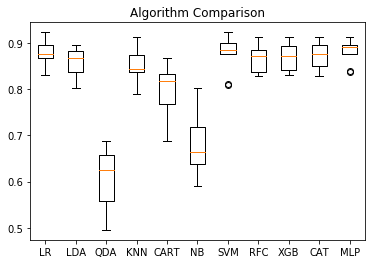

In [176]:
scaler = StandardScaler()
X_standardized = scaler.fit_transform(X)
results = select_model(X_standardized, y, seed)
results = [results[i].mean() for i in range(len(results))]
results.append("Stand")
results_to_plot.append(results)

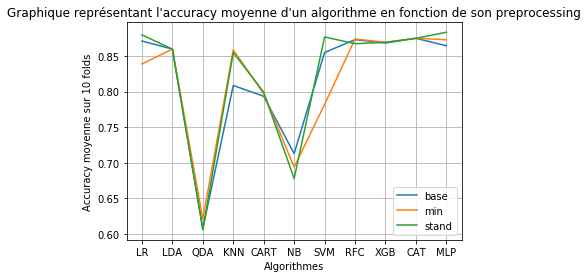

In [218]:
cols_names = ["LR", "LDA", "QDA", "KNN", "CART", "NB", "SVM", "RFC", "XGB", "CAT", "MLP", "name"]
results_to_plot = pd.DataFrame(results_to_plot, columns = cols_names)
to_plot = results_to_plot.set_index("name").T
to_plot = to_plot.reset_index()
to_plot.columns = ["algo", "base", "min", "stand"]
ax = to_plot.plot(xticks = to_plot.index, grid = True)
ax.set_xticklabels(to_plot.algo)
plt.xlabel("Algorithmes")
plt.ylabel("Accuracy moyenne sur 10 folds")
plt.title("Graphique représentant l'accuracy moyenne d'un algorithme en fonction de son preprocessing")
plt.show()

On remarque que l'on a de bons résultats lorsqu'on applique une standardisation. Pour la suite nous allons nous focaliser sur 3 algorithmes qui sont LR, SVM et MLP.

### Optimisation de modèles

In [283]:
y = df["experimentalclass"]
X = df.drop("experimentalclass", axis=1)

nb_features = X.shape[1]
scaler = StandardScaler()

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = seed)

In [226]:
def search_KBest(nb_featues, model, X, y, scaler):
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = seed)
    results = []
    for i in range(1, nb_features+1):
        selector = SelectKBest(score_func=f_classif, k=i).fit(X_train, y_train)
        cols = selector.get_support(indices=True)
        X_train_selected = X_train.iloc[:, cols]
        X_train_selected_scaled = scaler.fit_transform(X_train_selected)
        model.fit(X_train_selected_scaled, y_train)
        X_test_selected = X_test.iloc[:, cols]
        X_test_selected_scaled = scaler.transform(X_test_selected)
        y_pred = model.predict(X_test_selected_scaled)
        acc = accuracy_score(y_test, y_pred)
        results.append([i, acc])
    results = pd.DataFrame(results, columns = ["K_features", "Accuracy"])
    return results

In [242]:
def select_KBest(k, X_train, y_train):
    
    selector = SelectKBest(score_func=f_classif, k=k).fit(X_train, y_train)
    cols = selector.get_support(indices=True)
    return cols

In [275]:
def get_cm(model, y_test, y_pred):
    
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True)
    plt.xlabel("Prédictions")
    plt.ylabel("Originals")
    plt.title(f"Modèle {model}\nAccuracy:{accuracy_score(y_test, y_pred):.3f}")
    plt.show()

#### Modèle 1 (LR)

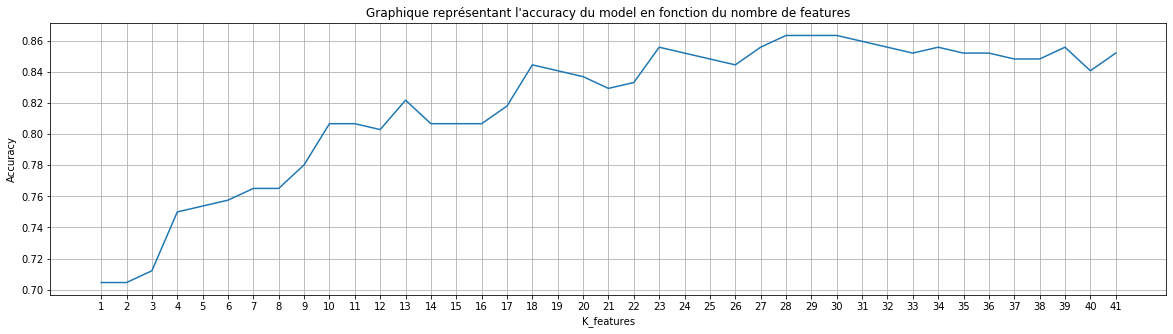

In [230]:
# Feature selection
model = LogisticRegression(solver="lbfgs", multi_class="auto")
scaler = StandardScaler()
results = search_KBest(nb_features, model, X, y, scaler)
ax = results.plot(x = "K_features", 
                  y = "Accuracy", 
                  grid = True, 
                  xticks=results.K_features, 
                  figsize=(20, 5))
ax.get_legend().remove()
plt.xlabel("K_features")
plt.ylabel("Accuracy")
plt.title("Graphique représentant l'accuracy du model en fonction du nombre de features")
plt.show()

On va prendre les 28 features pour la suite.

In [291]:
# GridSearchCV

scaler = StandardScaler()
cols = select_KBest(28, X_train, y_train)
X_train_selected = X_train.iloc[:, cols]
X_test_selected = X_test.iloc[:, cols]
X_train_selected_scaled = scaler.fit_transform(X_train_selected)
X_test_selected_scaled = scaler.transform(X_test_selected)

model = LogisticRegression()
parameters = {
    "penalty": ("l1", "L2", "elasticnet"),
    "C": [1, 10],
    "solver": ("newton-cg", "lbfgs", "liblinear")
}

clf1 = GridSearchCV(model, parameters)
clf1.fit(X_train_selected_scaled, y_train)
y_pred1 = clf1.predict(X_test_selected_scaled)

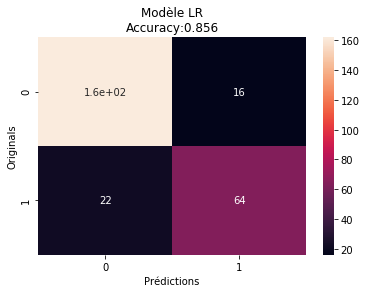

In [292]:
# Confusion matrix
get_cm("LR", y_test, y_pred1)

#### Modèle 2 (SVM)

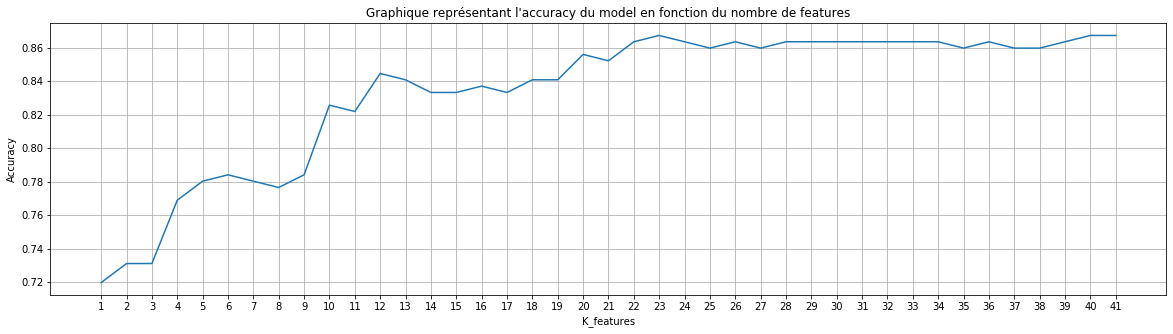

In [231]:
model = SVC(gamma="auto")
scaler = StandardScaler()
results = search_KBest(nb_features, model, X, y, scaler)
ax = results.plot(x = "K_features", 
                  y = "Accuracy", 
                  grid = True, 
                  xticks=results.K_features, 
                  figsize=(20, 5))
ax.get_legend().remove()
plt.xlabel("K_features")
plt.ylabel("Accuracy")
plt.title("Graphique représentant l'accuracy du model en fonction du nombre de features")
plt.show()

On va prendre les 23 features pour la suite.

In [293]:
# GridSearchCV

scaler = StandardScaler()
cols = select_KBest(23, X_train, y_train)
X_train_selected = X_train.iloc[:, cols]
X_test_selected = X_test.iloc[:, cols]
X_train_selected_scaled = scaler.fit_transform(X_train_selected)
X_test_selected_scaled = scaler.transform(X_test_selected)

model = SVC(gamma="auto")
parameters = {
    "C": [1, 10, 50],
    "kernel": ("linear", "poly", "rbf", "sigmoid"),
    "gamma": ("scale", "auto"),
    "decision_function_shape": ("ovo", "ovr")
}

clf2 = GridSearchCV(model, parameters)
clf2.fit(X_train_selected_scaled, y_train)
y_pred2 = clf2.predict(X_test_selected_scaled)

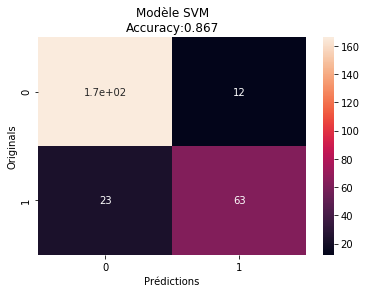

In [294]:
# Confusion matrix
get_cm("SVM", y_test, y_pred2)

#### Modèle 3 (MLP)

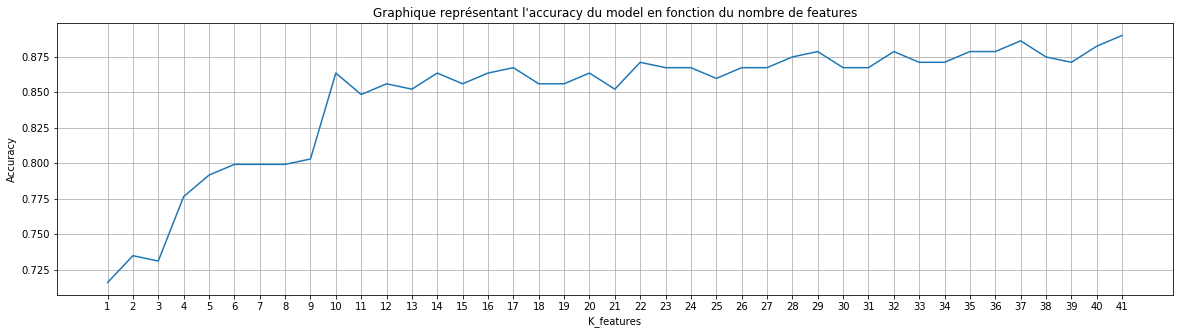

In [232]:
model = MLPClassifier()
scaler = StandardScaler()
results = search_KBest(nb_features, model, X, y, scaler)
ax = results.plot(x = "K_features", 
                  y = "Accuracy", 
                  grid = True, 
                  xticks=results.K_features, 
                  figsize=(20, 5))
ax.get_legend().remove()
plt.xlabel("K_features")
plt.ylabel("Accuracy")
plt.title("Graphique représentant l'accuracy du model en fonction du nombre de features")
plt.show()

On remarque qu'il n'y a pas besoin de faire une feature selection avec cette algorithme.

In [287]:
# GridSearchCV

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model = MLPClassifier()
parameters = {
    "hidden_layer_sizes": [25, 50,100],
    "activation": ("identity", "logistic", "tanh", "relu"),
    "solver": ("lbfgs", "sgd", "adam"),
    "learning_rate": ("constant", "invscaling","adaptive")
}

clf3 = GridSearchCV(model, parameters)
clf3.fit(X_train_selected_scaled, y_train)
y_pred3 = clf3.predict(X_test_selected_scaled)

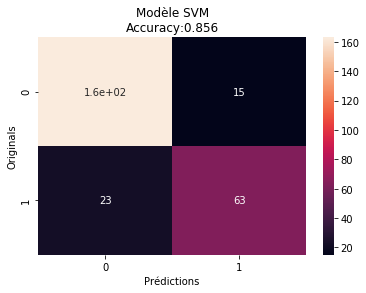

In [288]:
# Confusion matrix
get_cm("SVM", y_test, y_pred3)

On remarque que l'on obtient le meilleur résultat avec l'algorithme SVM. On récupère donc le modèle avec les hyper-paramètres optimisés, pour entraîner un modèle final sur l'ensemble du dataset.

### Modèle final

In [303]:
scaler = StandardScaler()
cols = select_KBest(23, X, y)
X_selected = X.iloc[:, cols]
X_selected_scaled = scaler.fit_transform(X_selected)
model = clf2.get_params()["estimator"]
model.fit(X_selected_scaled, y)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

### Exportation

In [331]:
pickle.dump(model, open('final_model.pickle', 'wb'))
pickle.dump(scaler, open("scaler.pickle", "wb"))